In [158]:
import numpy as np
import pandas as pd
import datetime
import matplotlib 
from matplotlib import pyplot as plt
import gc
import multiprocessing as mp
from multiprocessing import Process, Queue
queue = Queue()
import random
from matplotlib.pyplot import figure
import math

In [61]:
gc.collect()

15

In [2]:
def read_df(file_title,house_nb):
    try:
        df=pd.read_table(file_title, sep="," )
        df.columns = ["time","consumption"]
        try:
            df['time'] = pd.to_datetime(df['time'],unit='s')
        except:
            df['time'] = pd.to_datetime(df['time'])
        df.index= df.time
        df = df.sort_index()
        df.reset_index(drop=True, inplace=True)
        return (df,house_nb)
    except:
        return(None)

In [3]:
def find_Activations (df,house_nb,minimum_durations,threshold=20):
  On_consumption=[]
  a = False
  min_duration=minimum_durations[house_nb]
  for index in df.index[0:]:
    if ((df.consumption[index]>=threshold) and (a==False)):
      a=True
      start=index
    elif ((df.consumption[index] < threshold ) and (a==True)):
      a=False 
      end=index-1
      if ((end-start)>=min_duration):
       On_consumption.append((start,end))
  return ((On_consumption,house_nb))

In [3]:
pool = mp.Pool(processes = 3)
result=pool.starmap(read_df,(("Refit_Resampled/fridge_freezer/house_"+str(i+1)+".csv",i+1) for i in range(21)))

In [4]:
Refit_fridge_freezers={}
for i in range(len(result)):
    if result[i]!=None:
        Refit_fridge_freezers[result[i][1]]=result[i][0]

In [9]:
min_durations_fridge_freezers={2:9,3:5,4:4,5:3,9:10,10:3,11:5,12:13,15:3,16:3,17:15,18:7,19:5,21:13}
for key in min_durations_fridge_freezers.keys():
    min_durations_fridge_freezers[key]=min_durations_fridge_freezers[key]*6

In [13]:
pool = mp.Pool(processes = 3)
result=pool.starmap(find_Activations,((Refit_fridge_freezers[i],i,min_durations_fridge_freezers) for i in Refit_fridge_freezers.keys()))

In [14]:
Refit_fridge_freezer_activations={}
for i in range(len(result)):
    Refit_fridge_freezer_activations[result[i][1]]=result[i][0]

In [15]:
Refit_fridge_freezer_activations.keys()

dict_keys([2, 3, 4, 5, 9, 10, 11, 12, 15, 16, 17, 18, 19, 21])

In [7]:
def add_margin(activation_list,df_length,margin=1):
  on_consumptions=[]
  for activation_tuple in activation_list:
    if ((activation_tuple[0]-margin)>=0):
      start=activation_tuple[0]-margin
    else:
      start=0
    if ((activation_tuple[1]+margin)<=df_length):
      end=activation_tuple[1]+margin
    else:
      end=df_length
    on_consumptions.append((start,end))
  return(on_consumptions)

In [8]:
Refit_fridge_freezer_activations_margin={}
for key in Refit_fridge_freezer_activations.keys():
    Refit_fridge_freezer_activations_margin[key]=add_margin(Refit_fridge_freezer_activations[key],len(Refit_fridge_freezers[key].index),2)

In [9]:
print(Refit_fridge_freezer_activations_margin[2][1])
print(Refit_fridge_freezer_activations[2][1])

(410, 557)
(412, 555)


In [10]:
Refit_fridge_freezer_activations=Refit_fridge_freezer_activations_margin

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


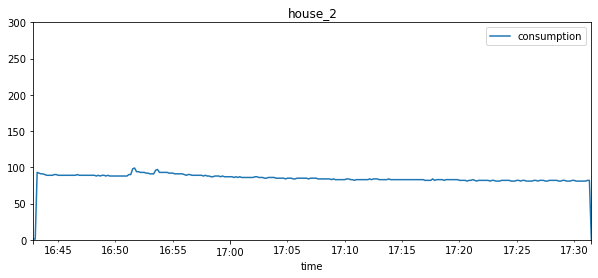

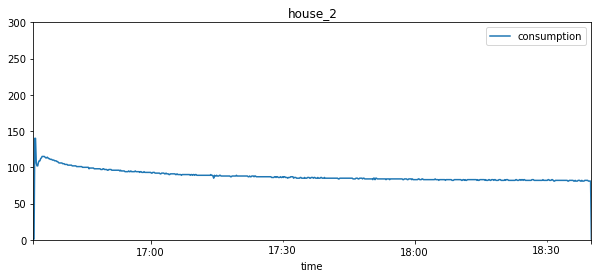

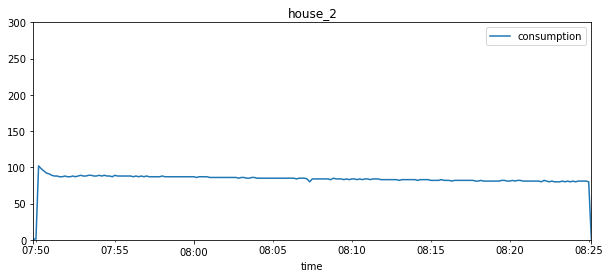

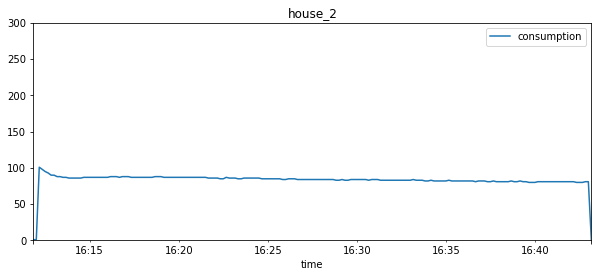

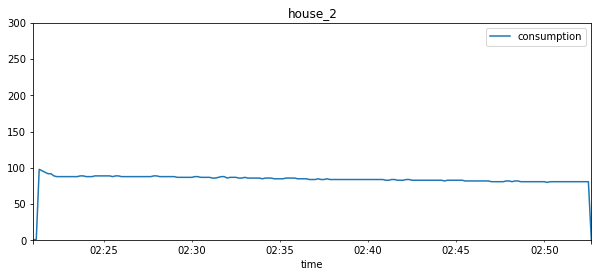

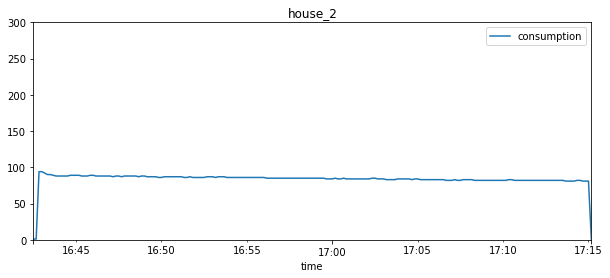

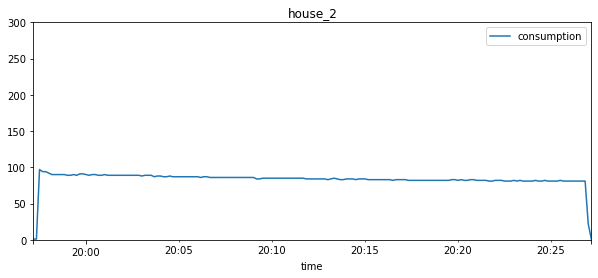

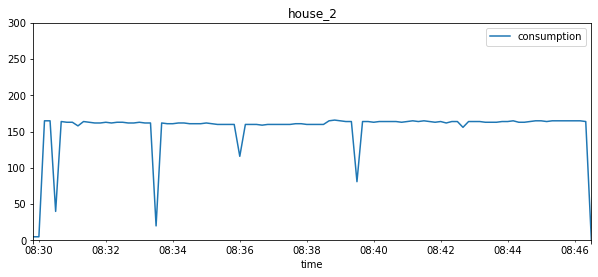

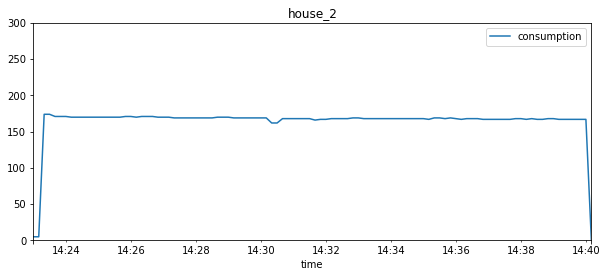

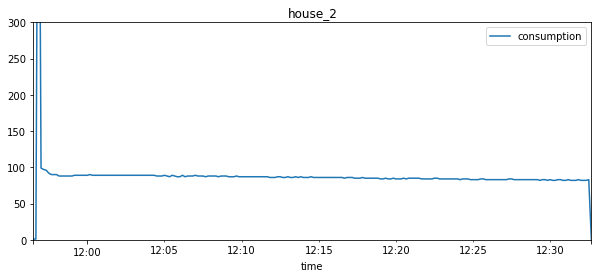

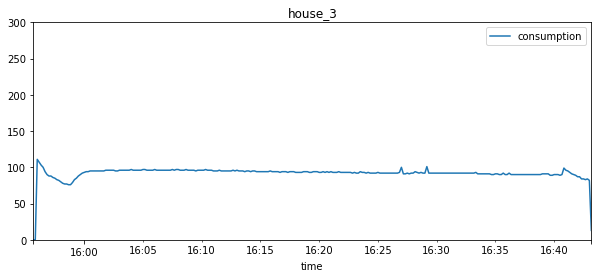

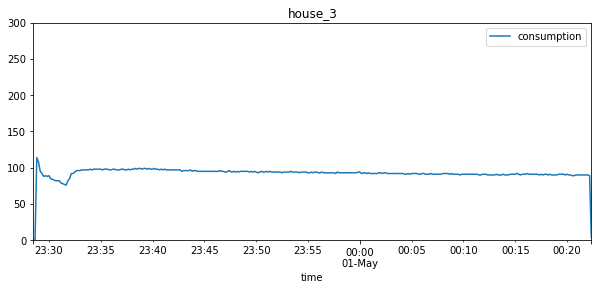

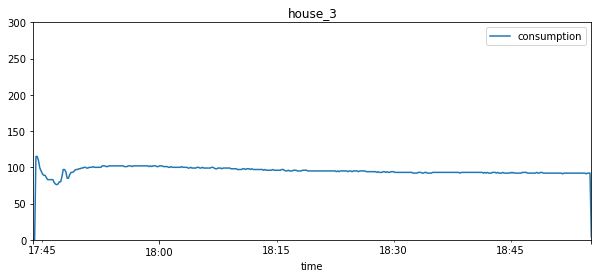

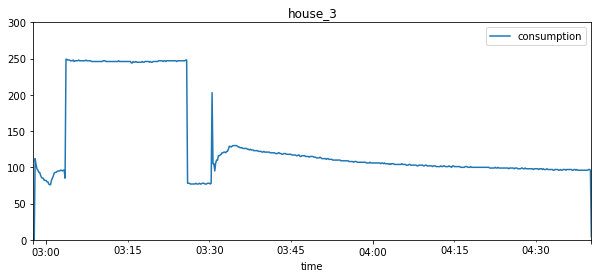

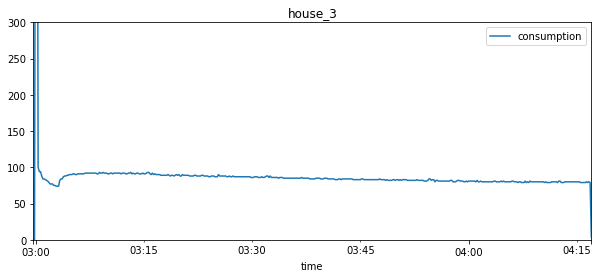

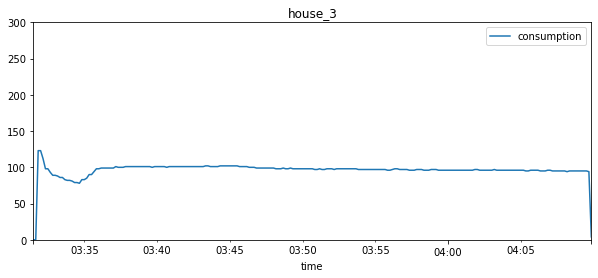

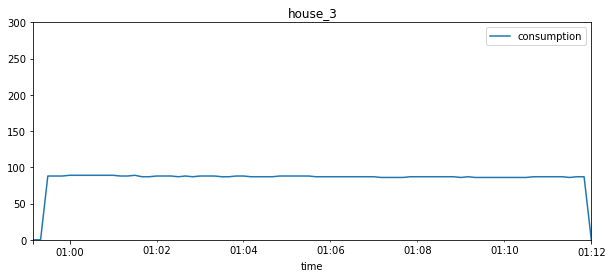

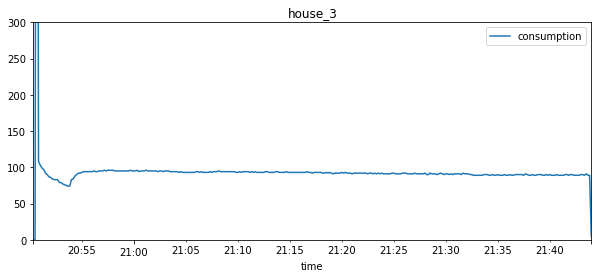

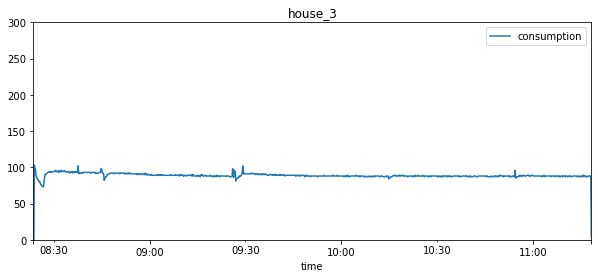

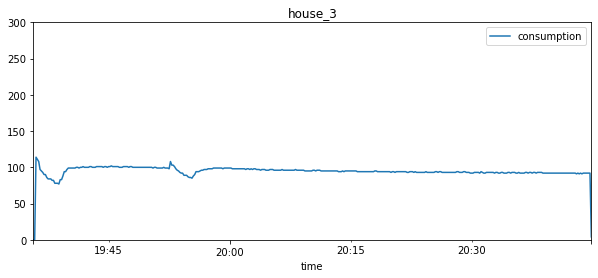

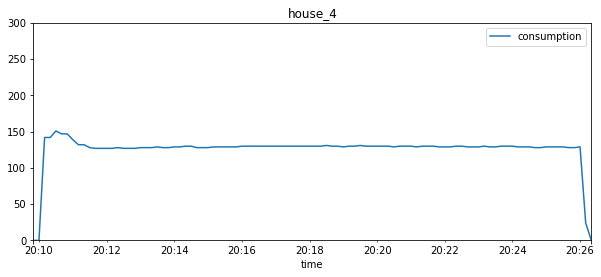

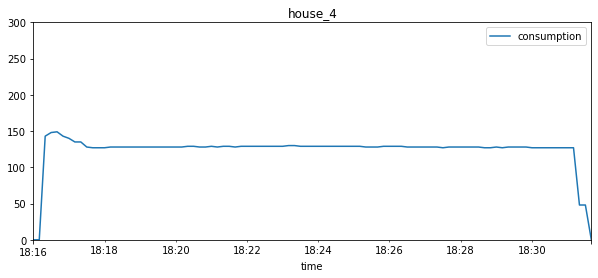

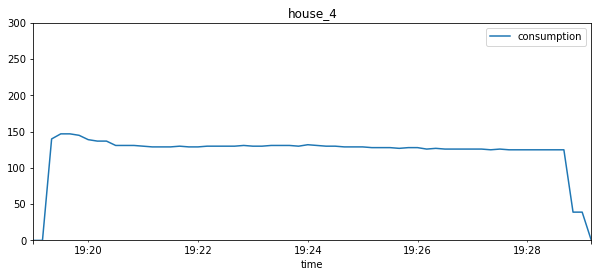

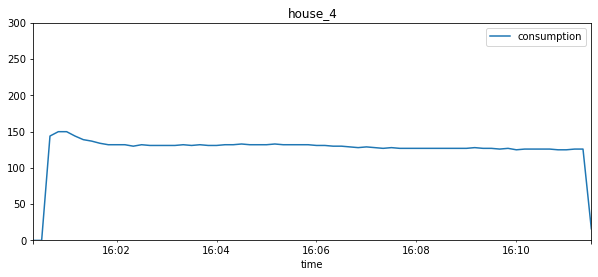

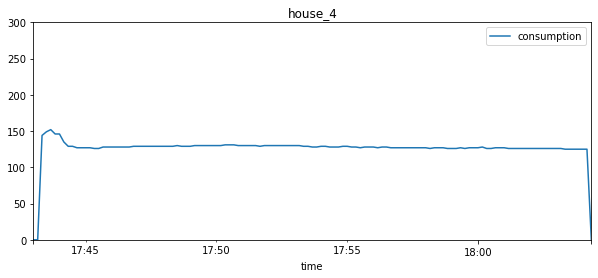

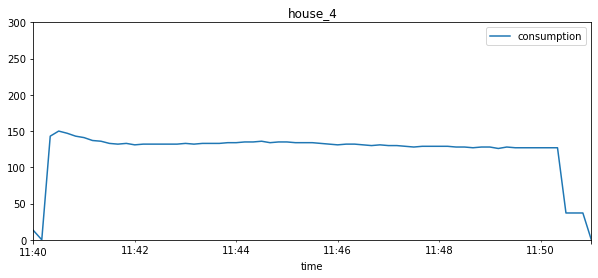

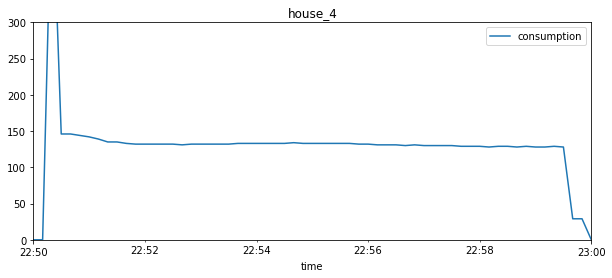

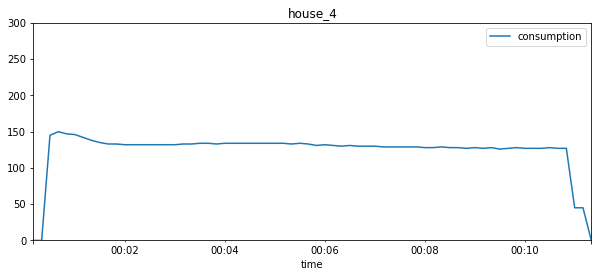

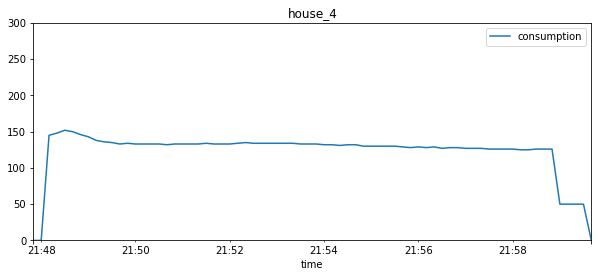

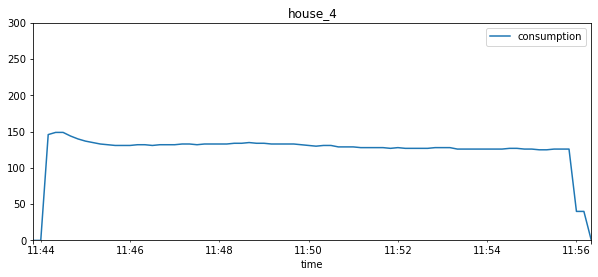

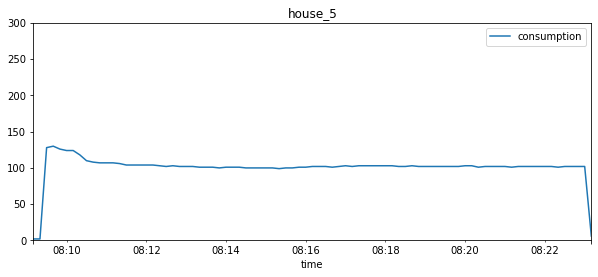

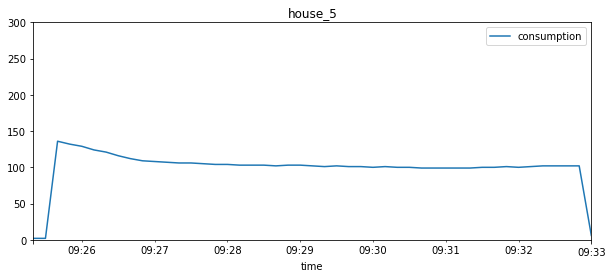

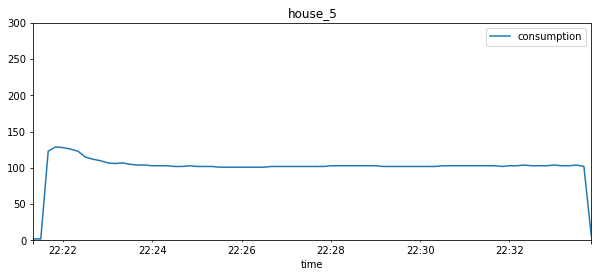

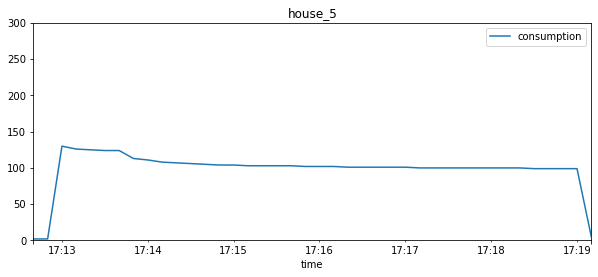

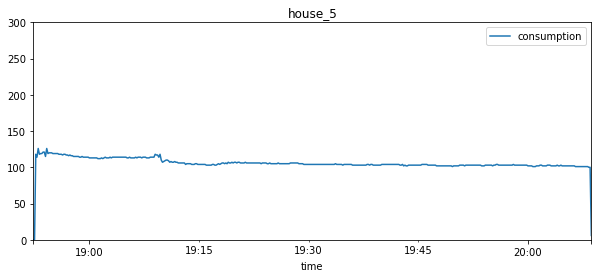

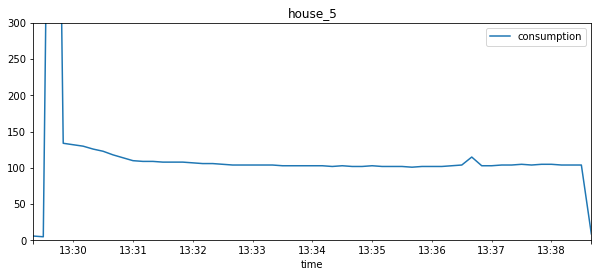

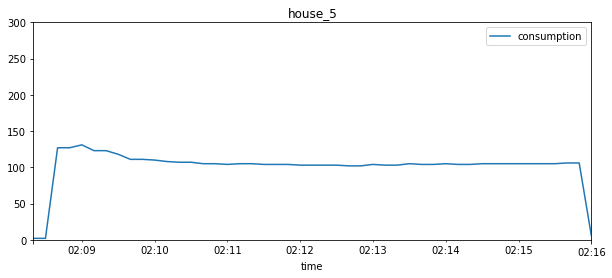

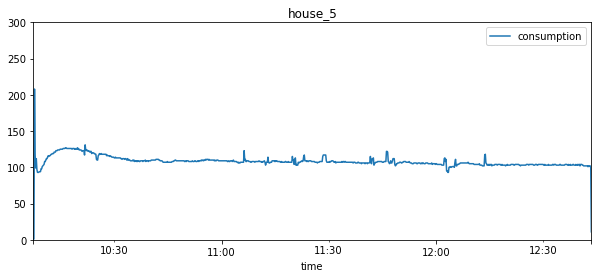

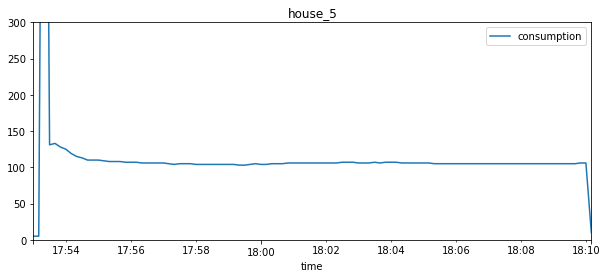

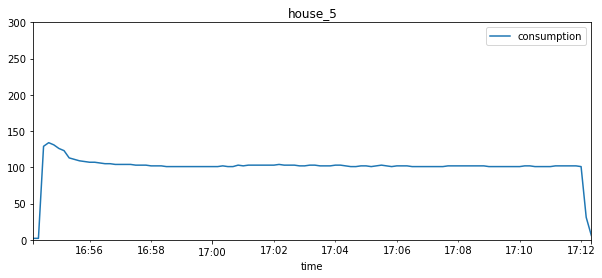

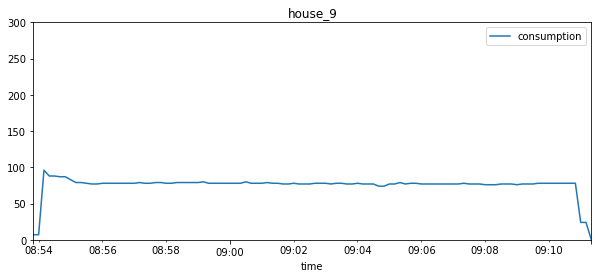

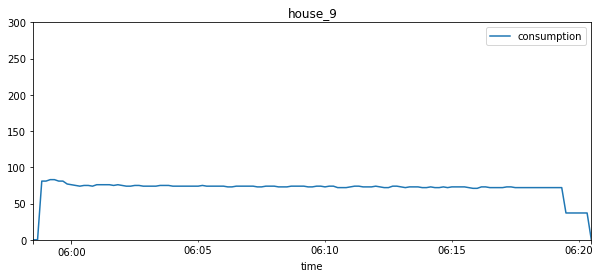

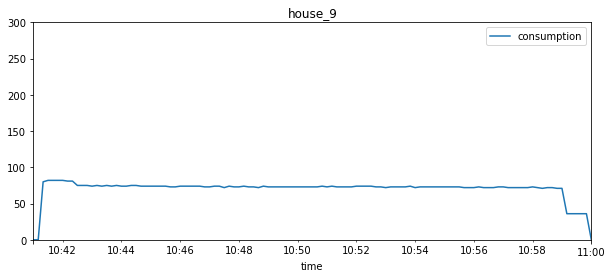

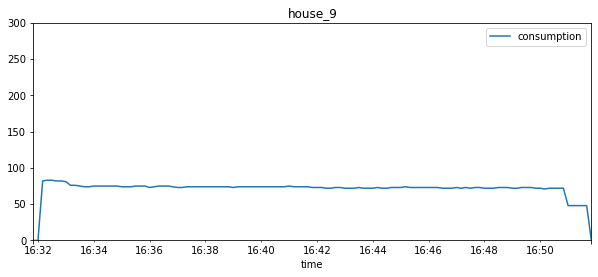

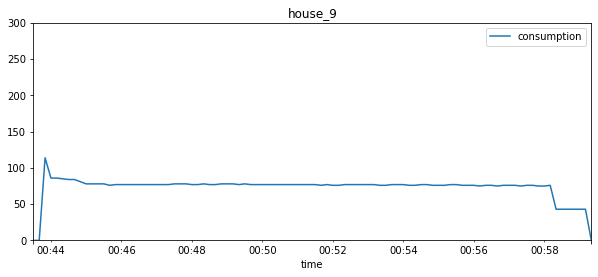

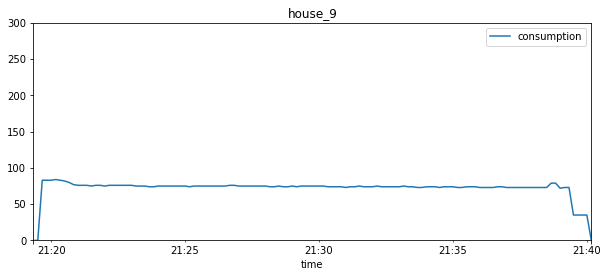

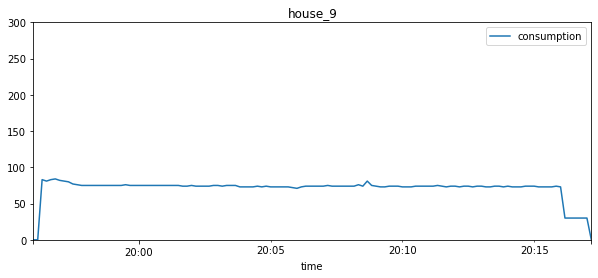

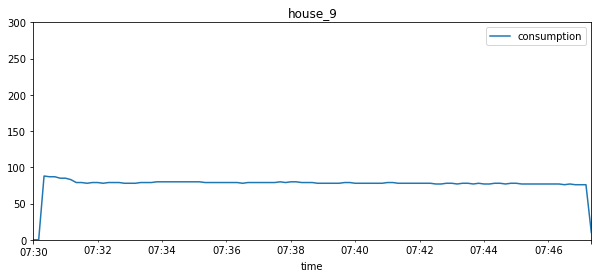

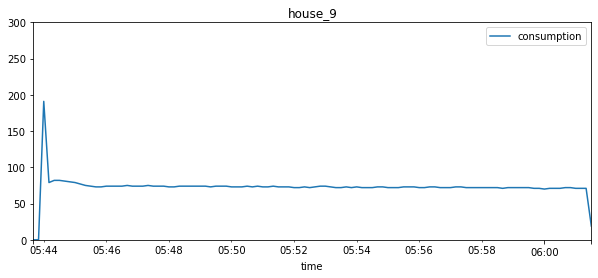

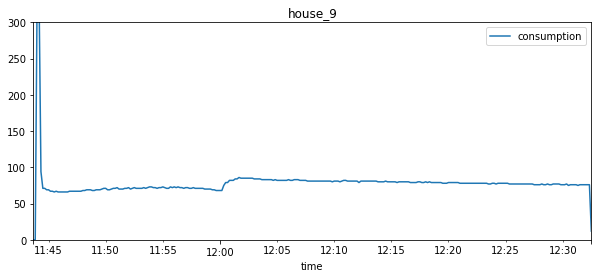

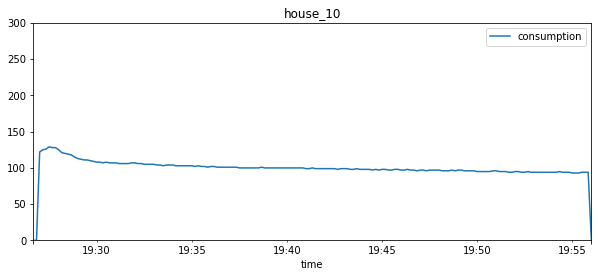

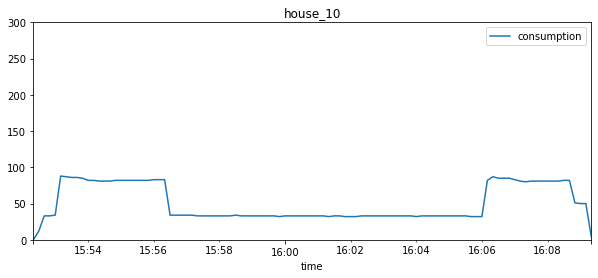

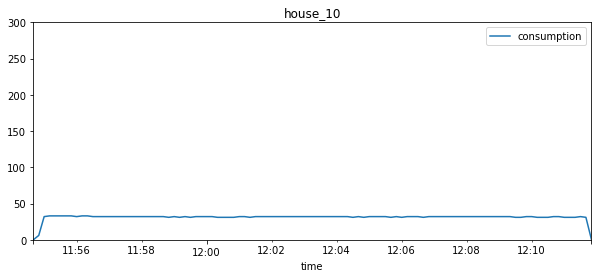

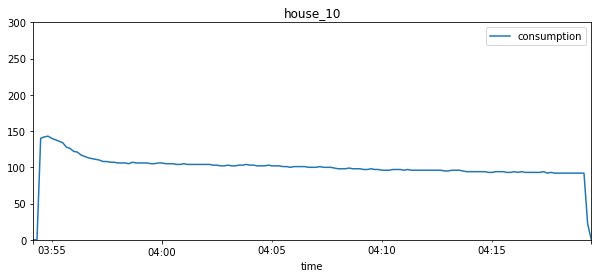

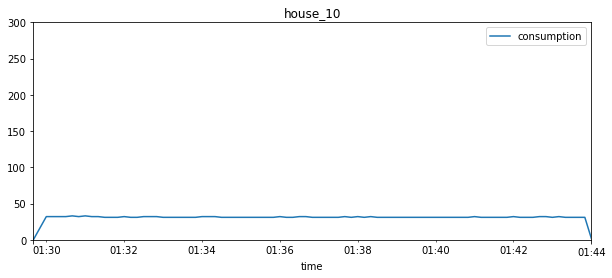

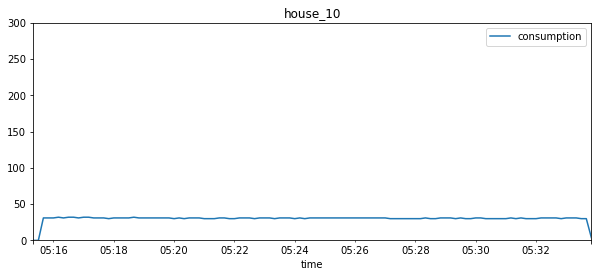

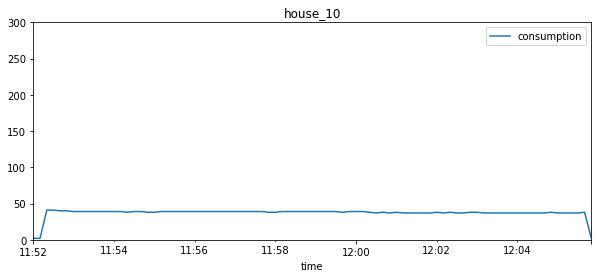

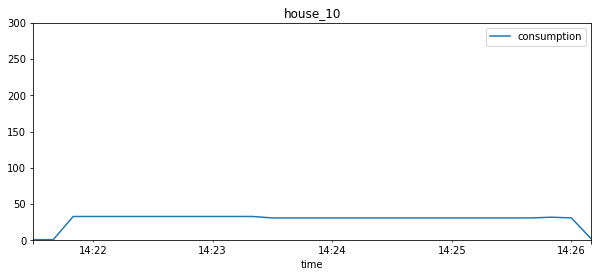

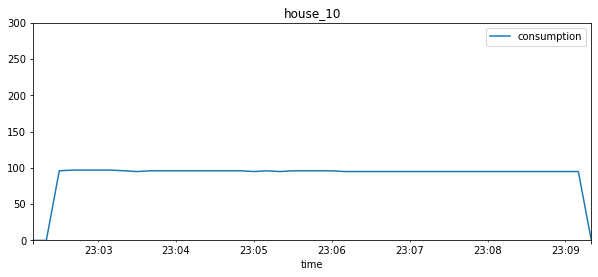

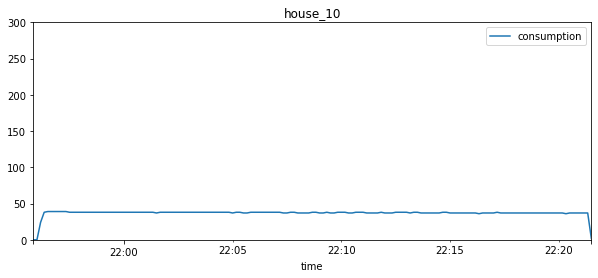

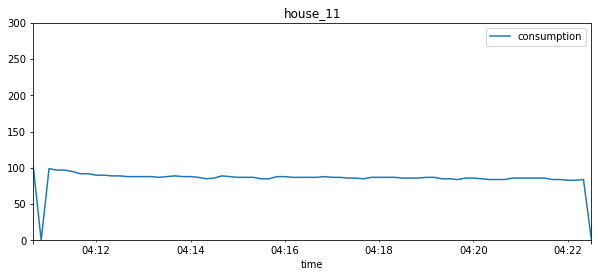

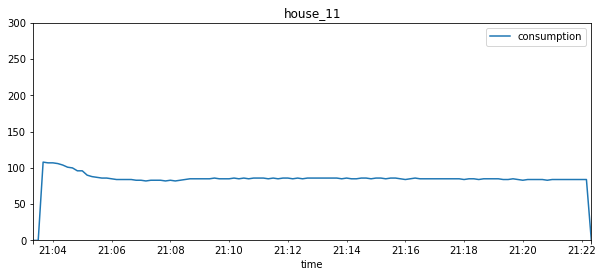

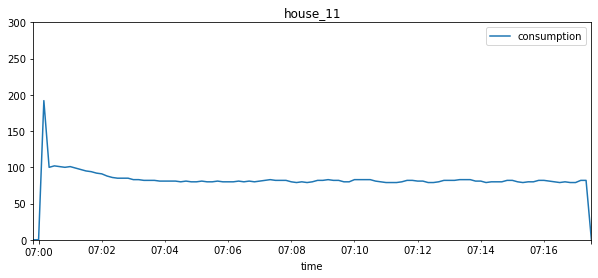

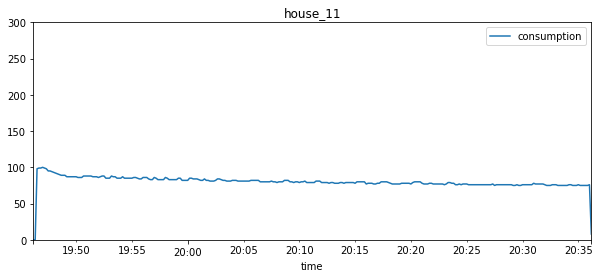

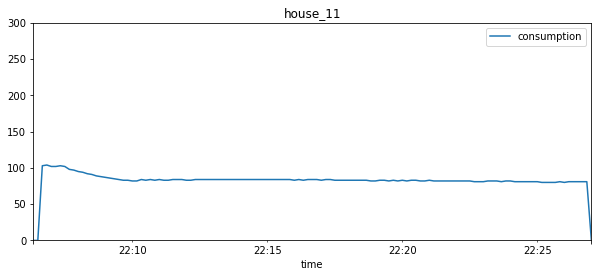

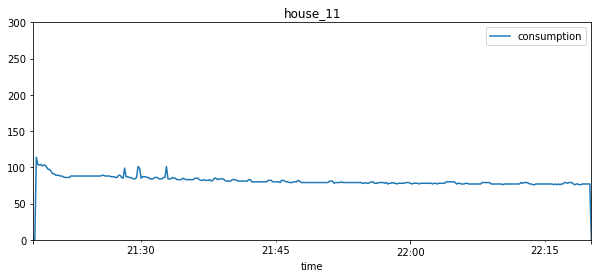

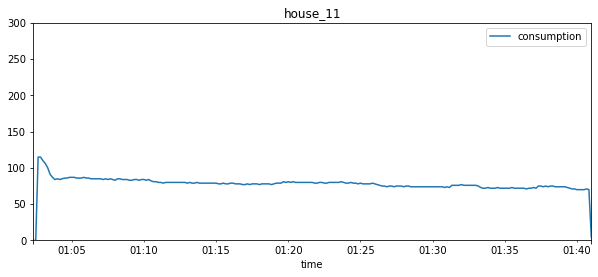

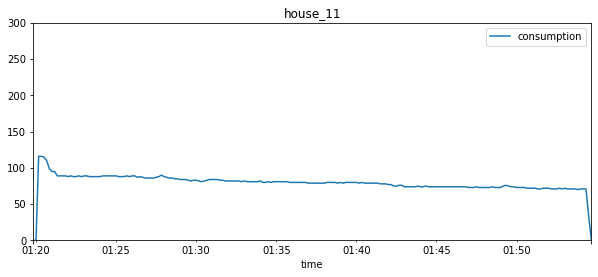

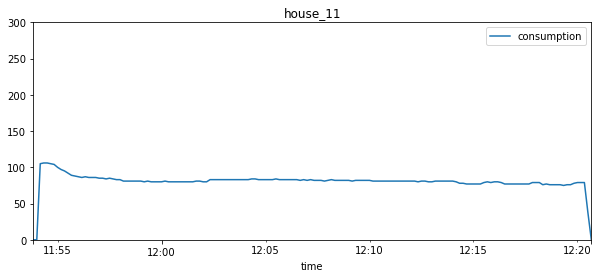

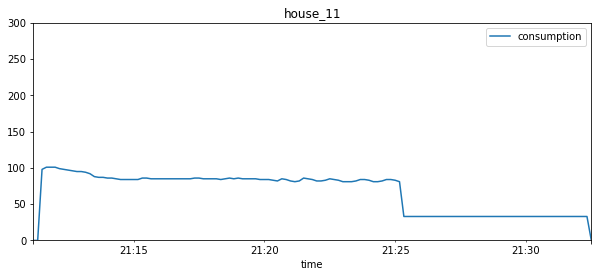

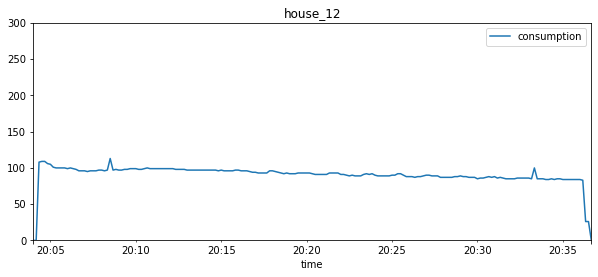

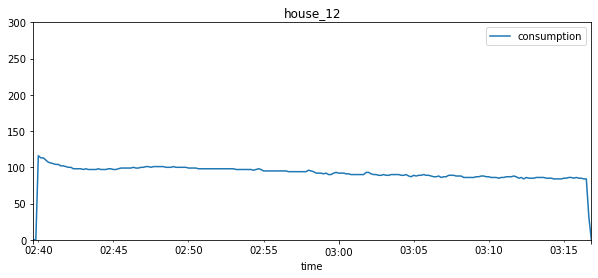

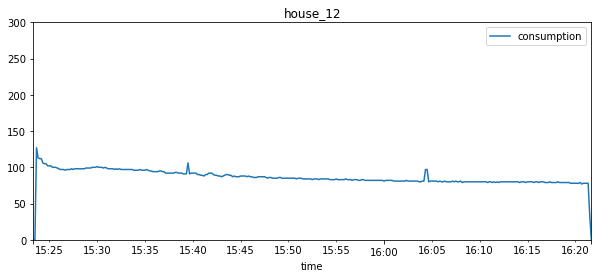

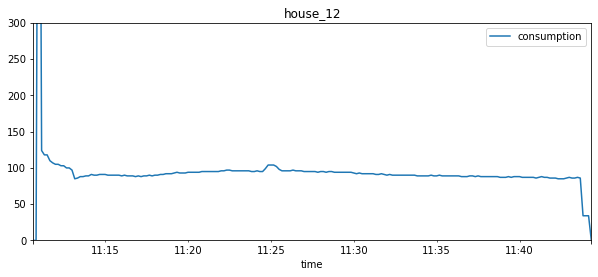

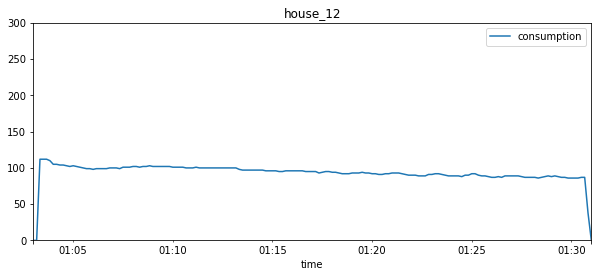

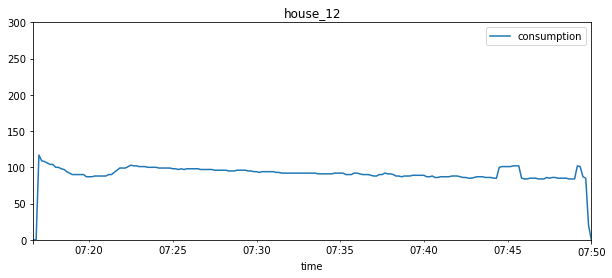

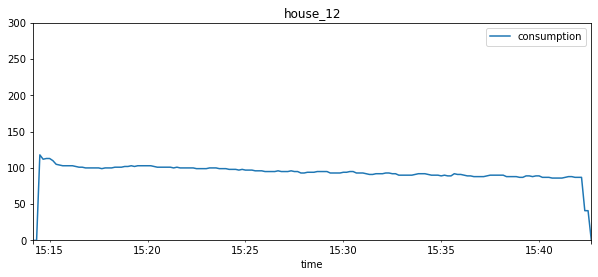

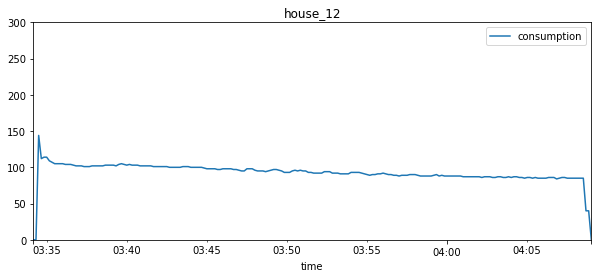

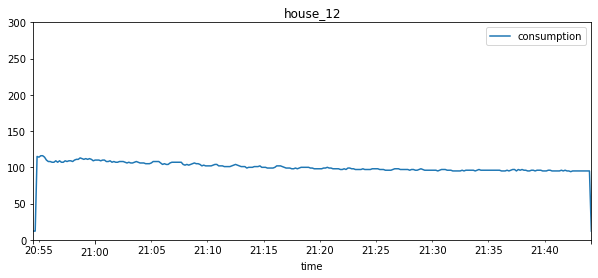

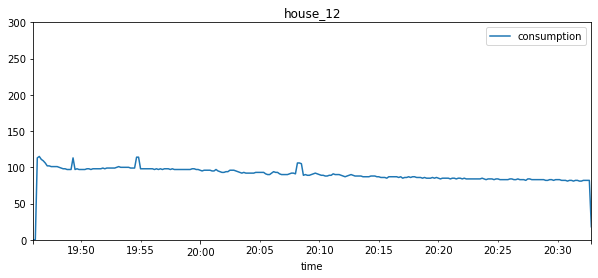

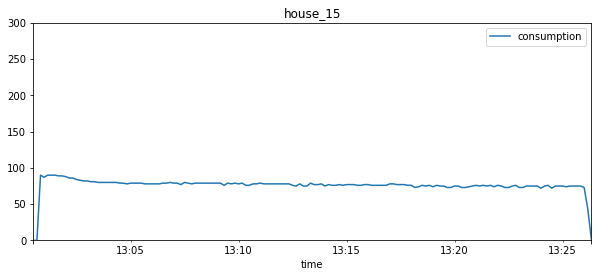

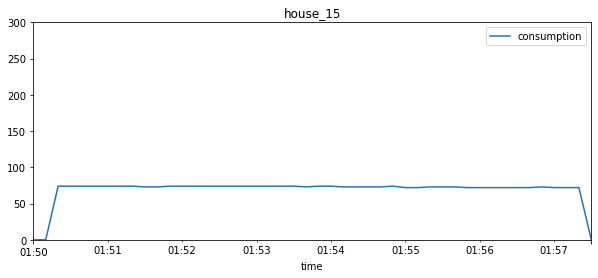

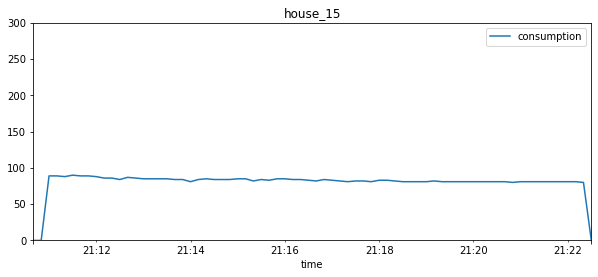

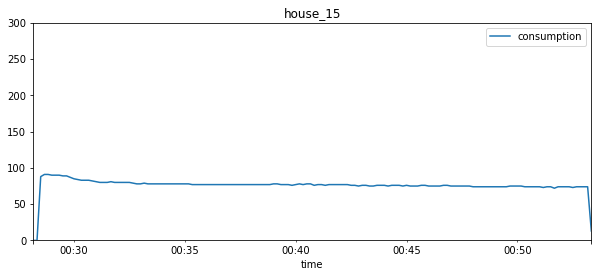

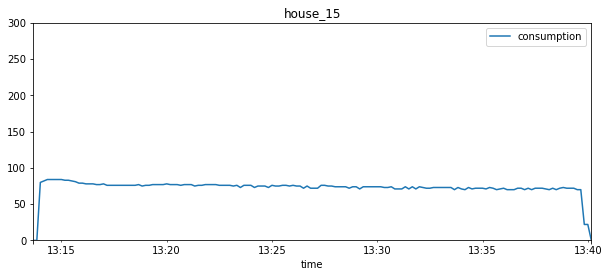

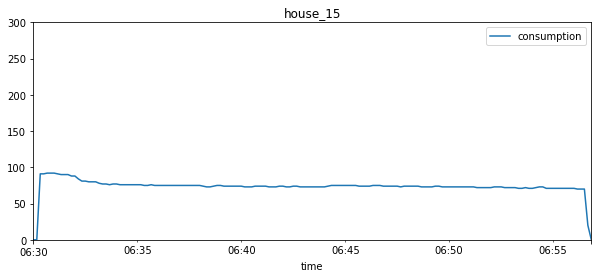

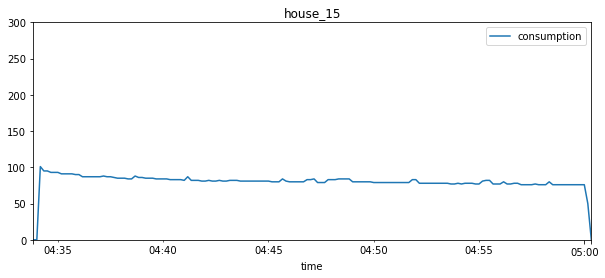

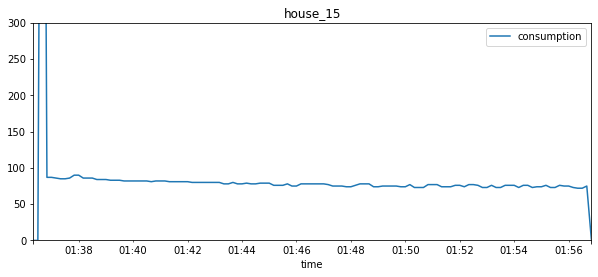

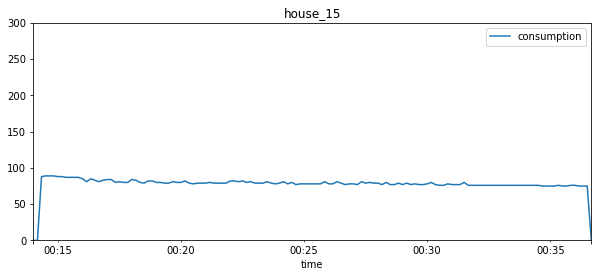

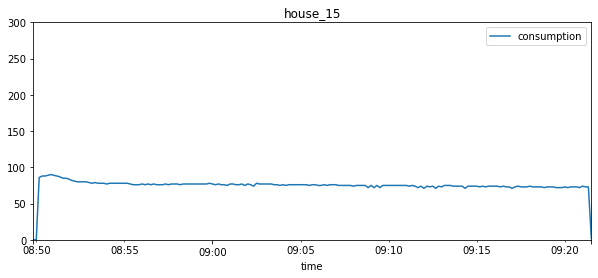

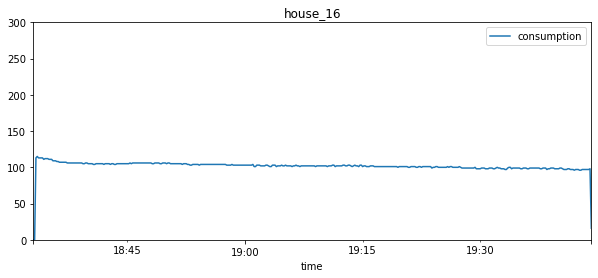

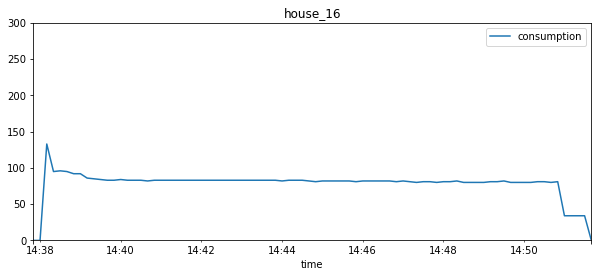

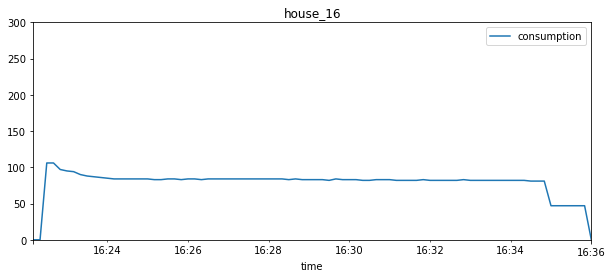

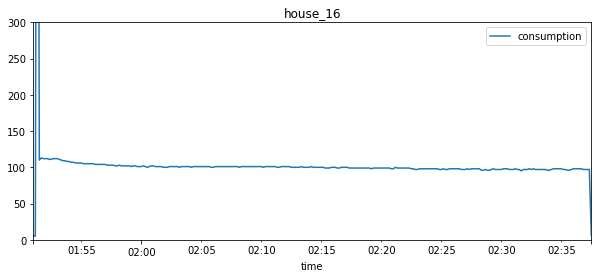

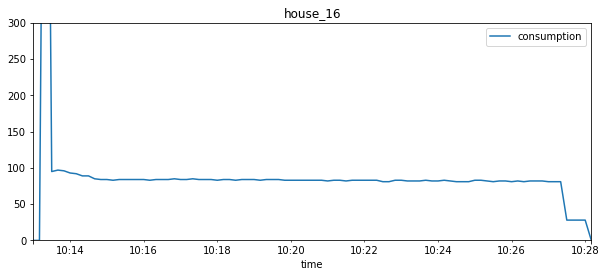

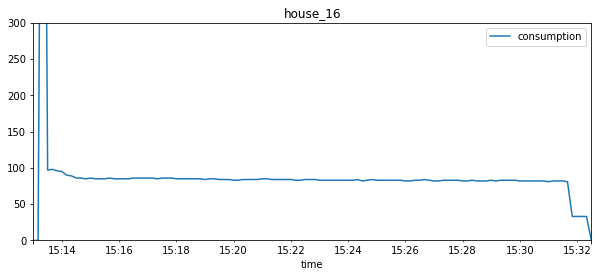

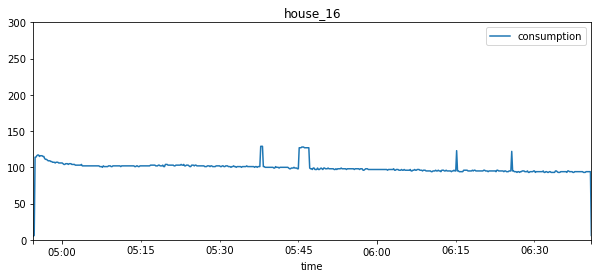

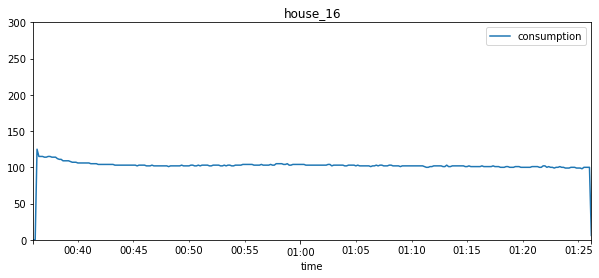

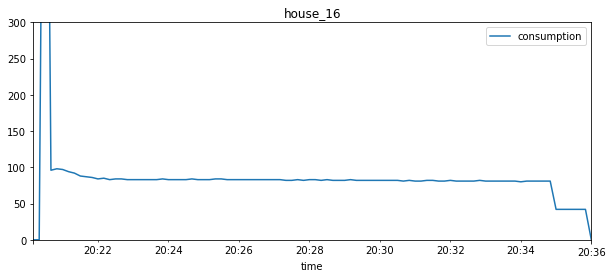

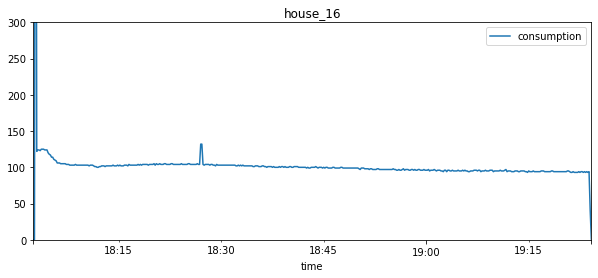

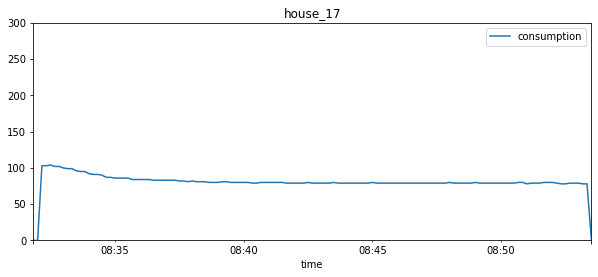

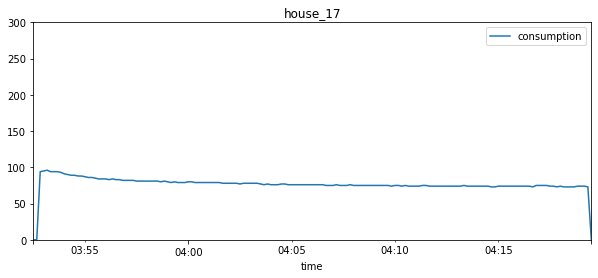

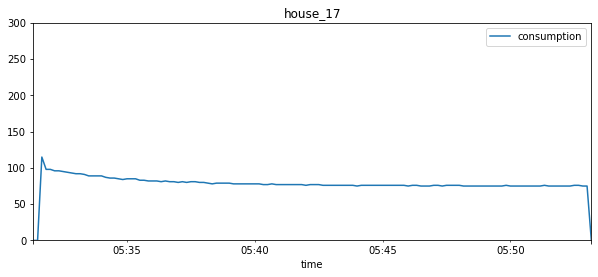

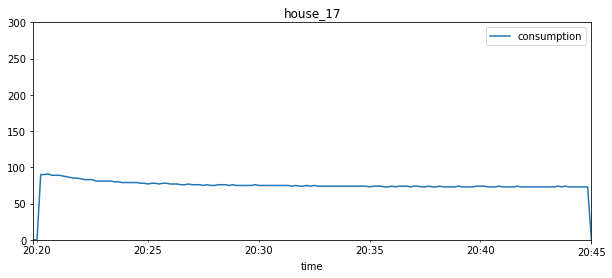

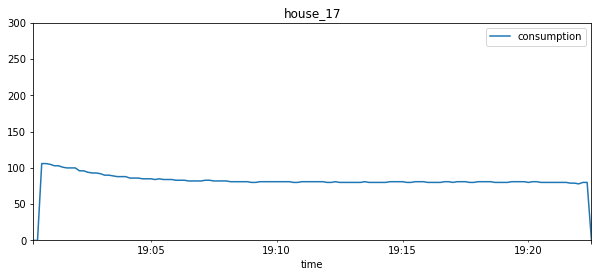

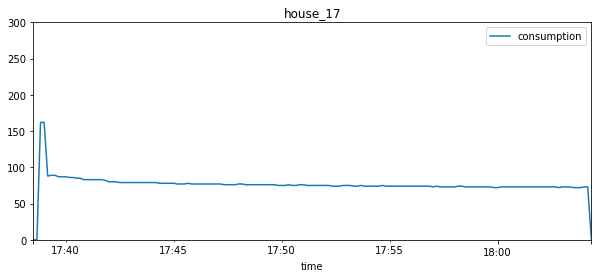

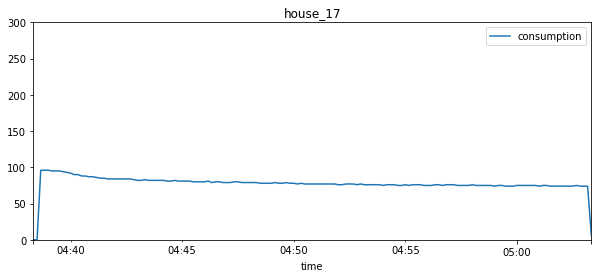

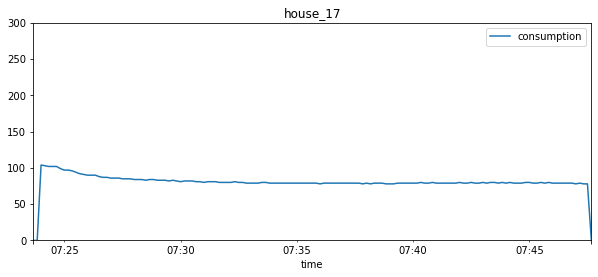

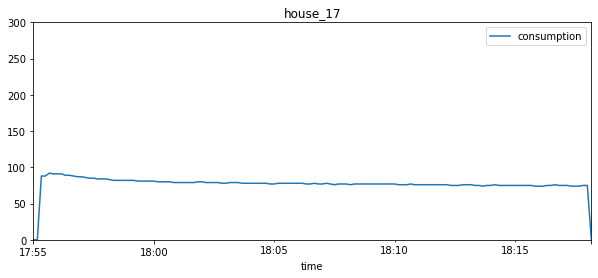

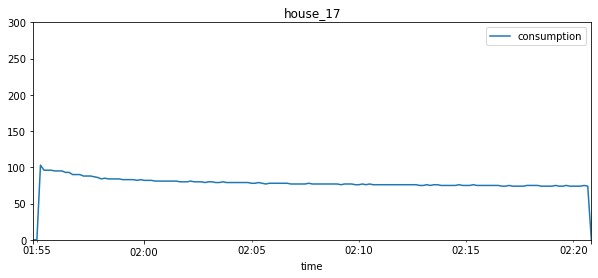

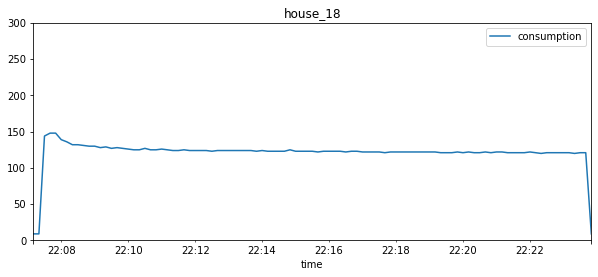

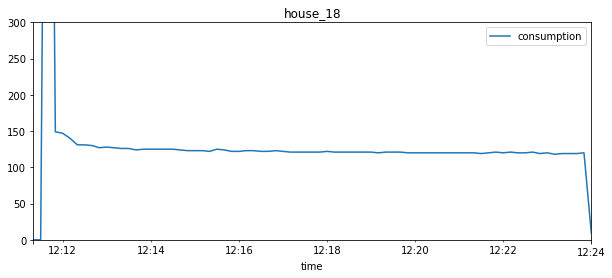

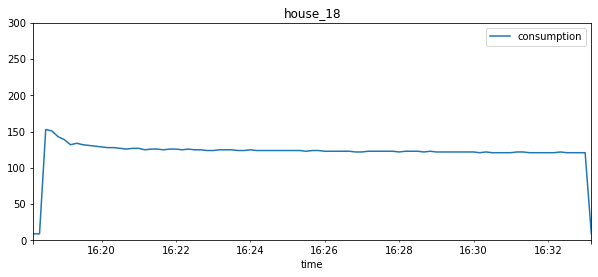

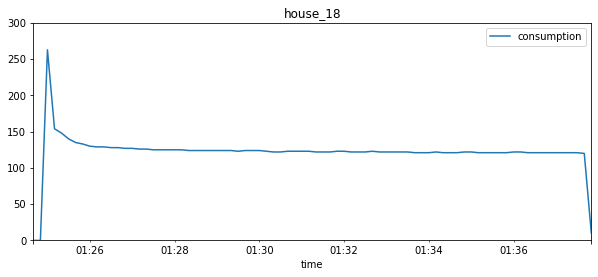

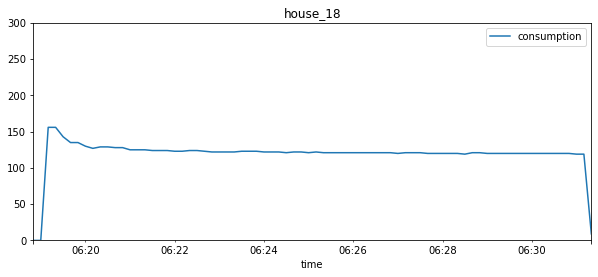

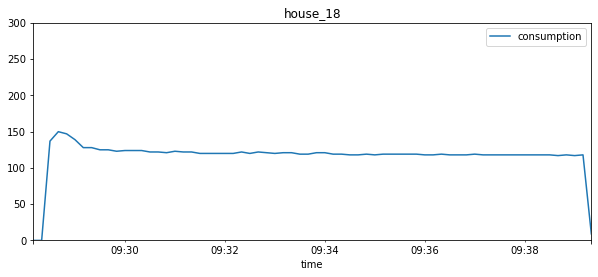

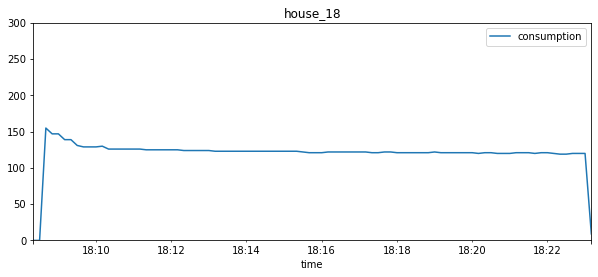

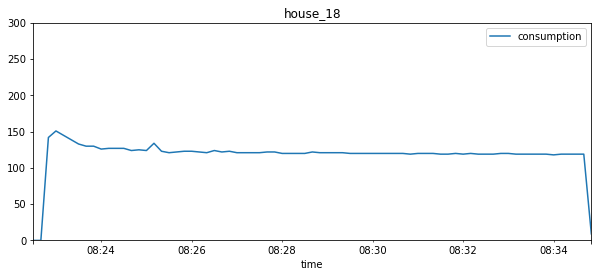

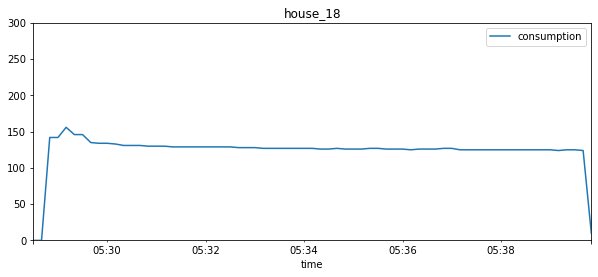

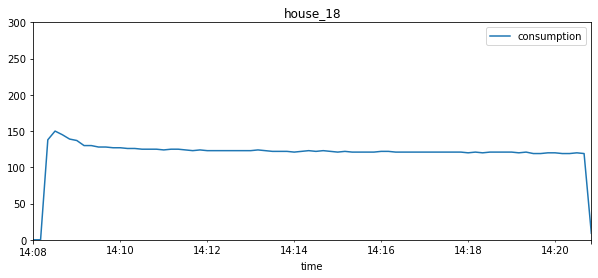

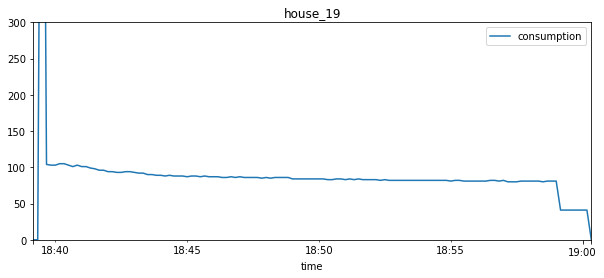

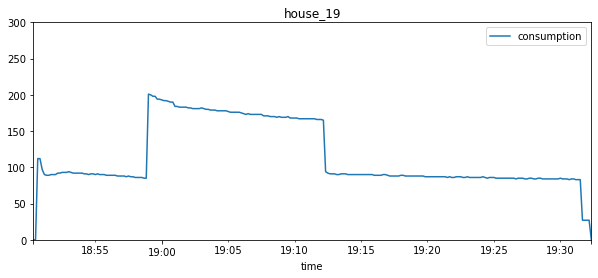

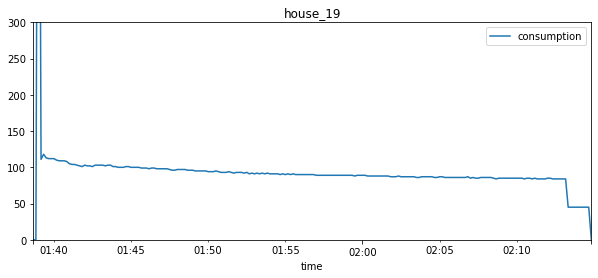

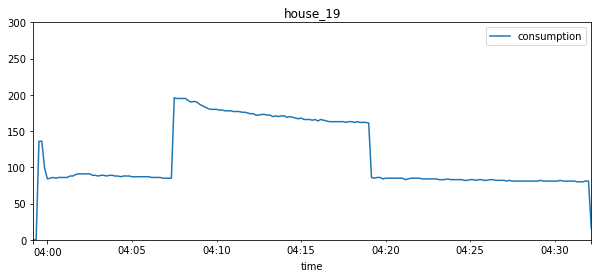

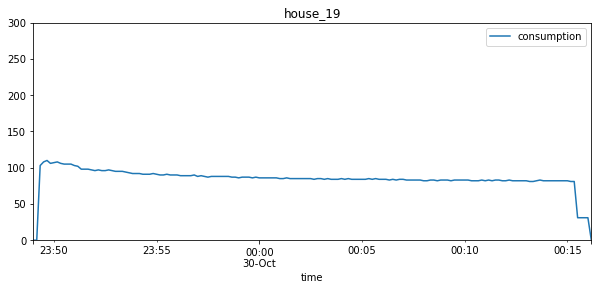

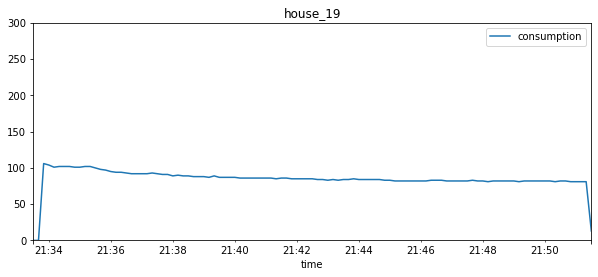

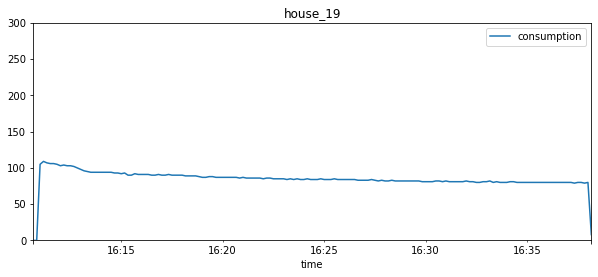

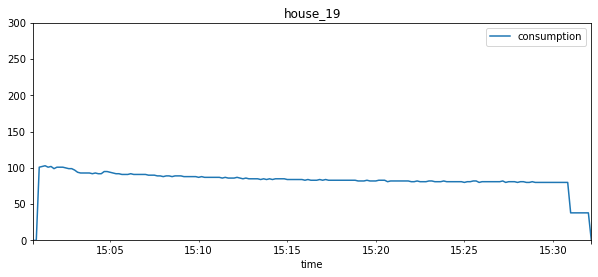

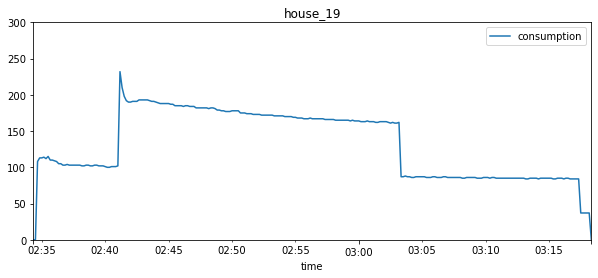

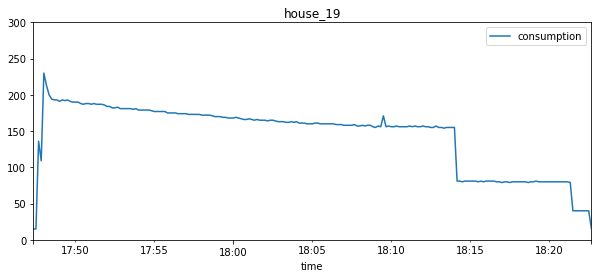

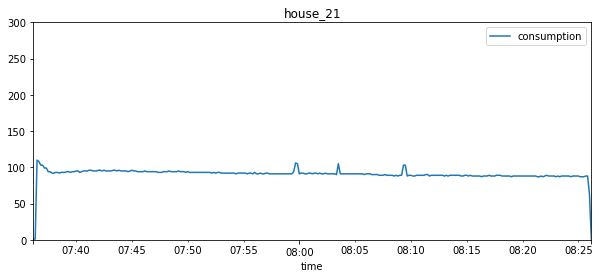

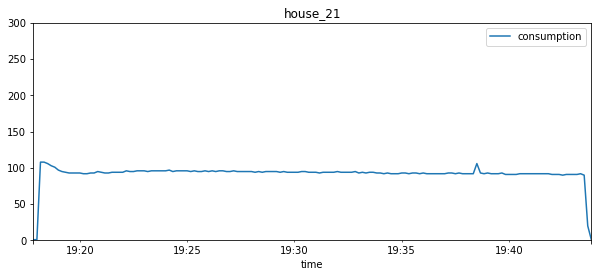

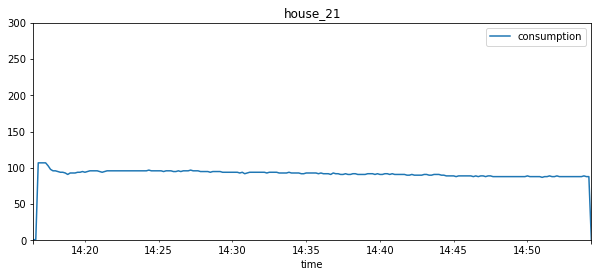

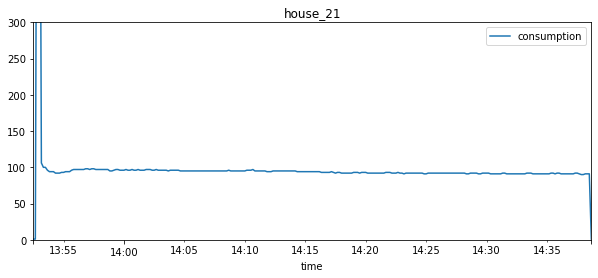

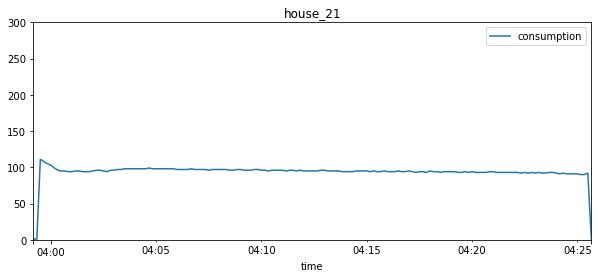

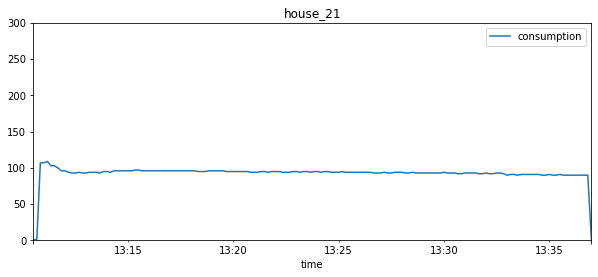

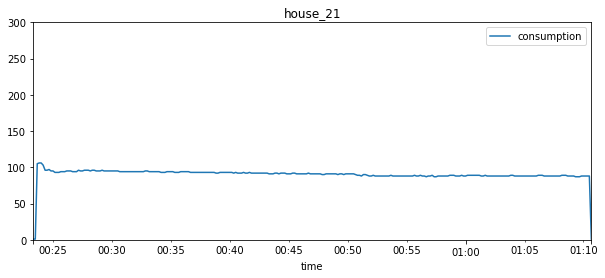

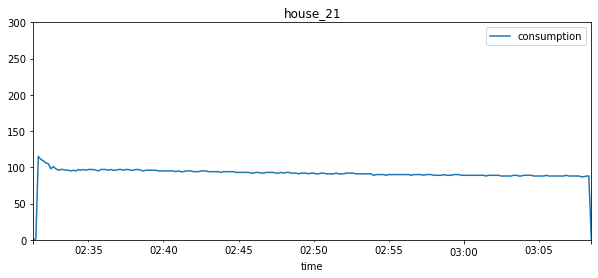

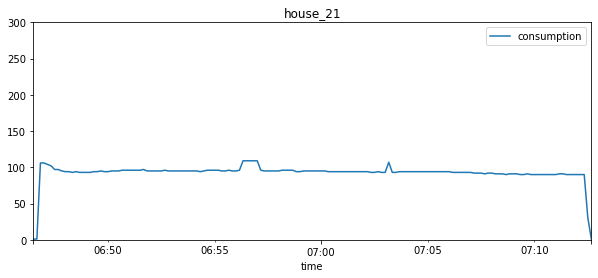

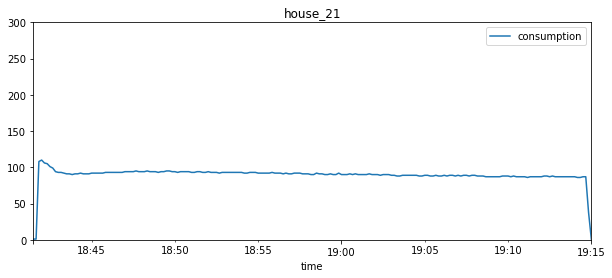

In [22]:
for house in Refit_fridge_freezers.keys():
    activations=random.sample(range(0, len(Refit_fridge_freezer_activations[house])),10)
    df=Refit_fridge_freezers[house]
    for activation in activations:
        beginning=Refit_fridge_freezer_activations[house][activation][0]
        end=Refit_fridge_freezer_activations[house][activation][1]
        ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
        ax.set_ylim(0,300)

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


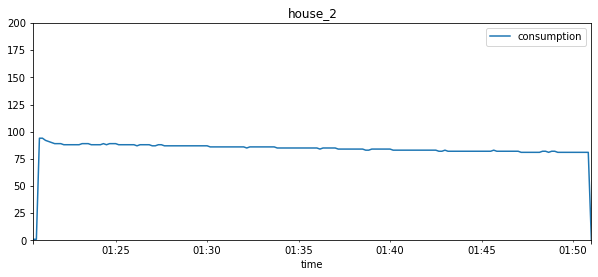

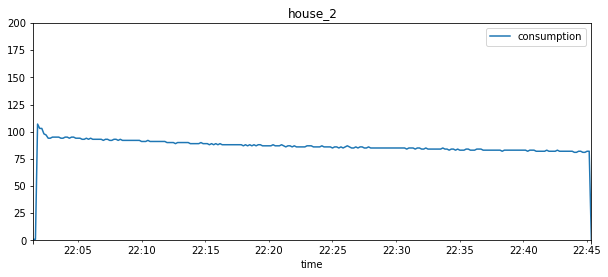

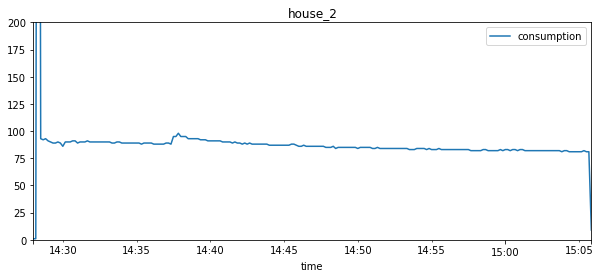

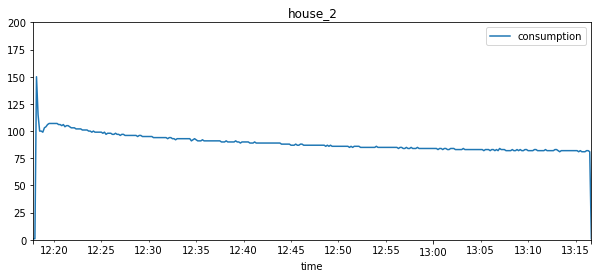

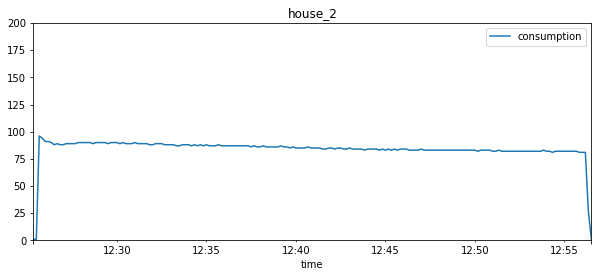

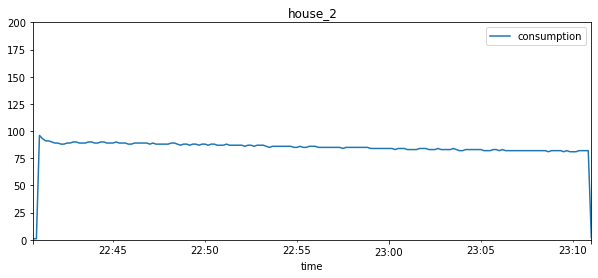

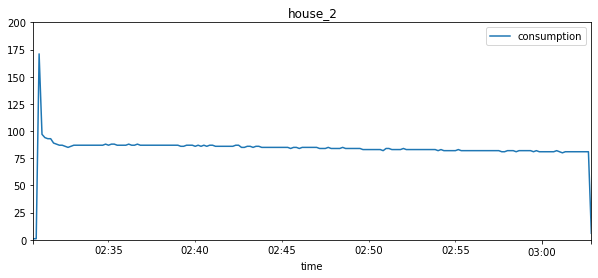

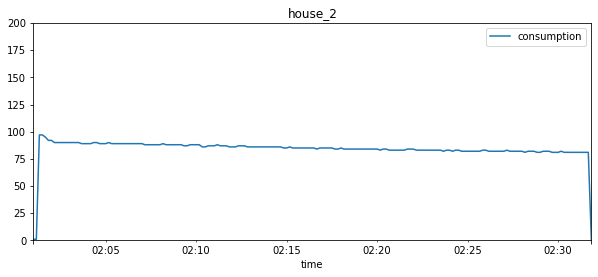

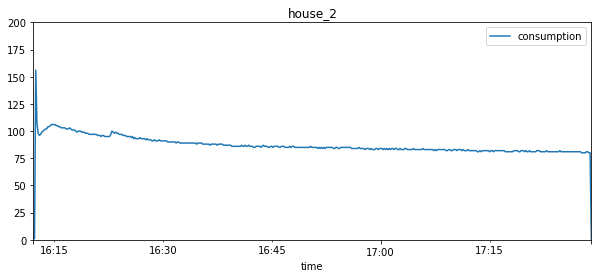

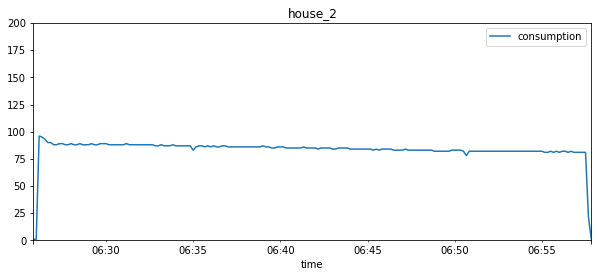

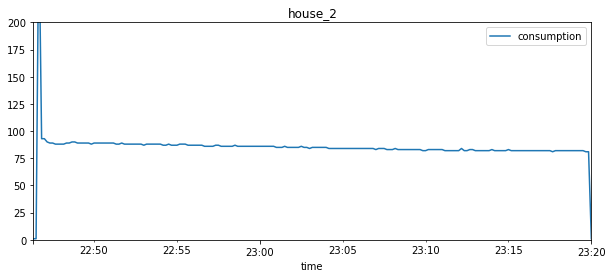

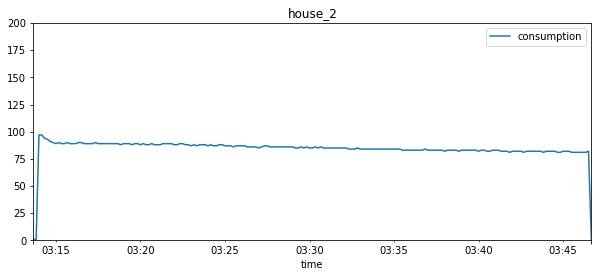

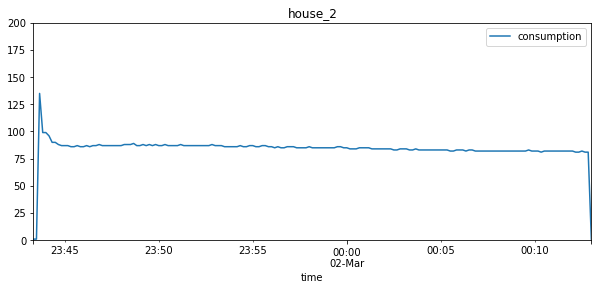

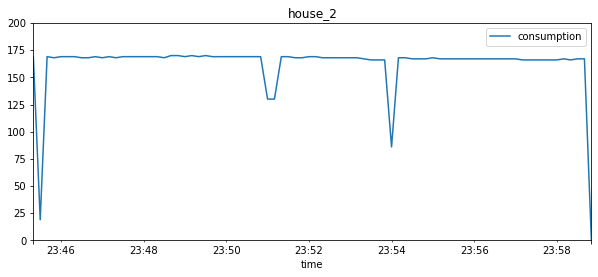

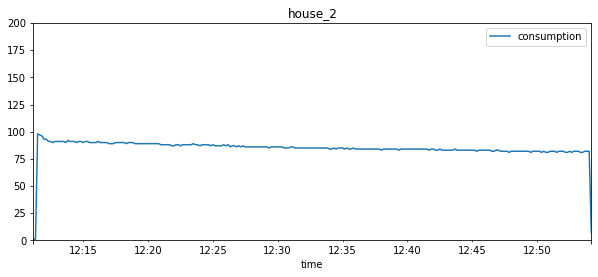

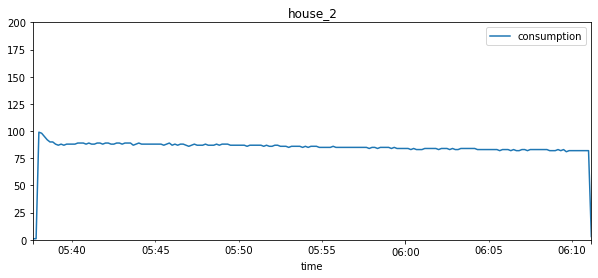

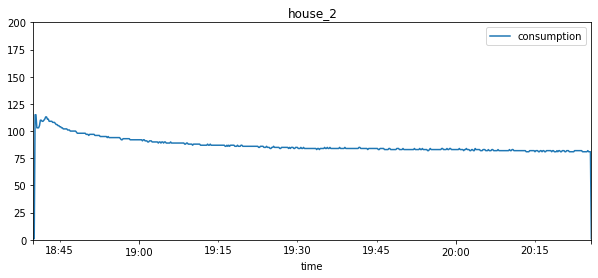

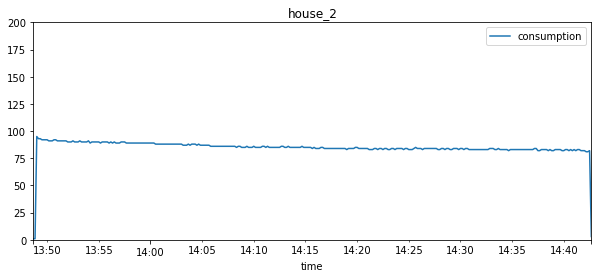

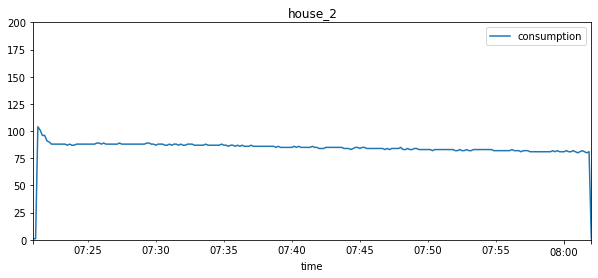

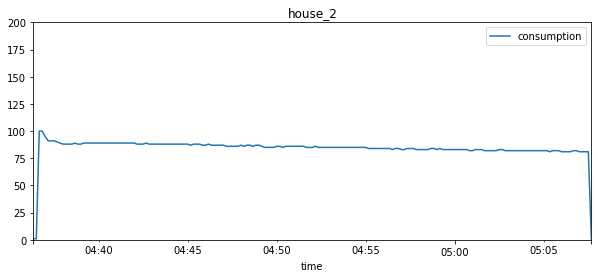

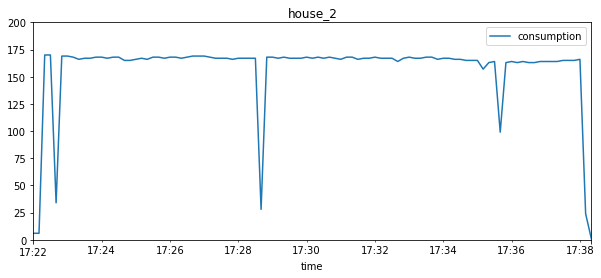

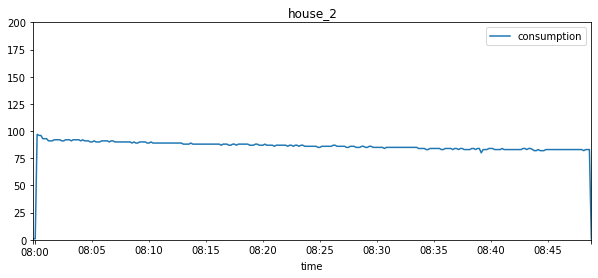

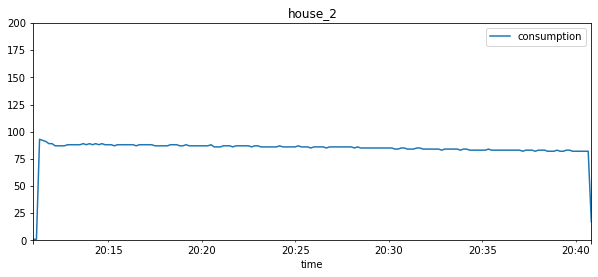

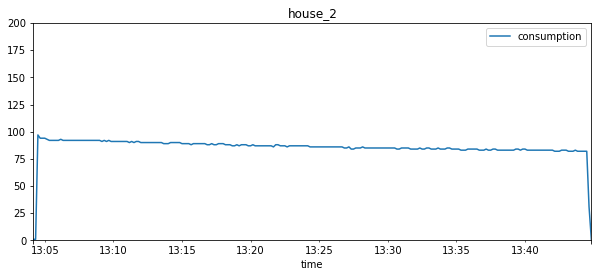

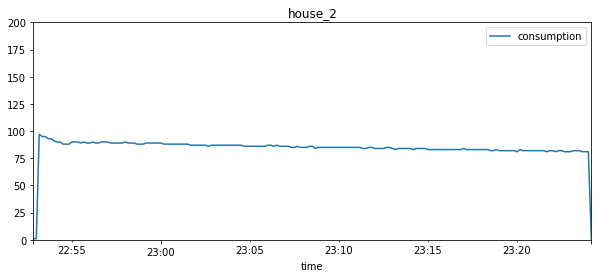

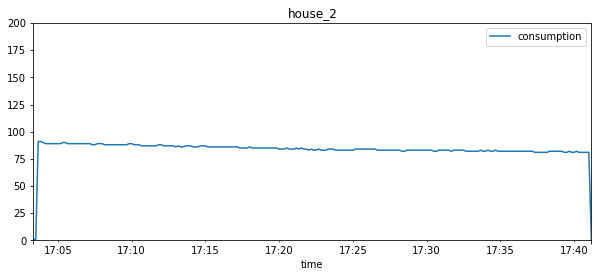

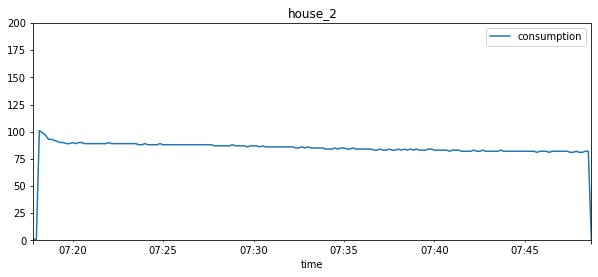

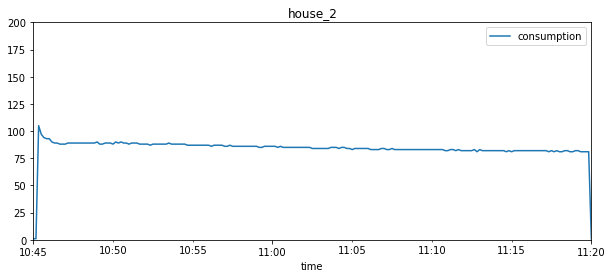

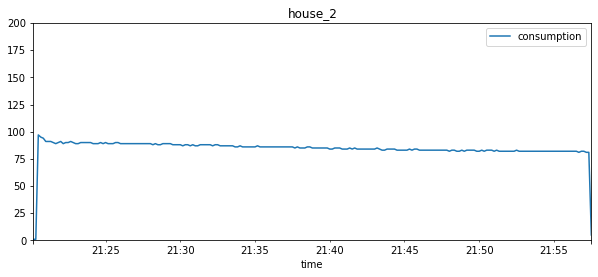

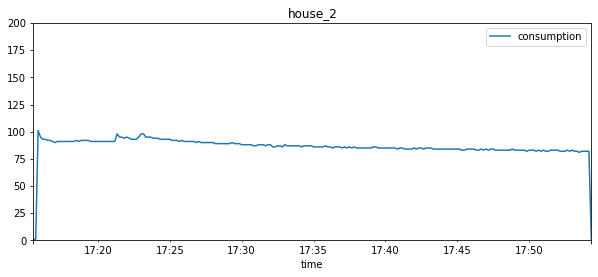

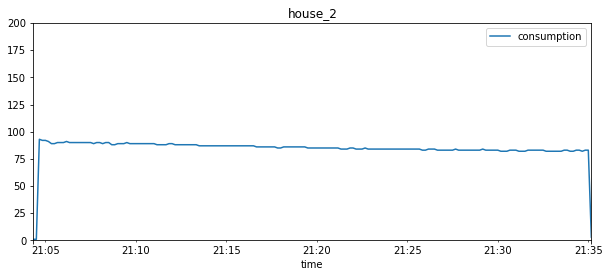

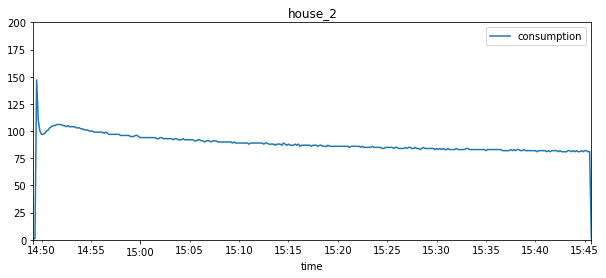

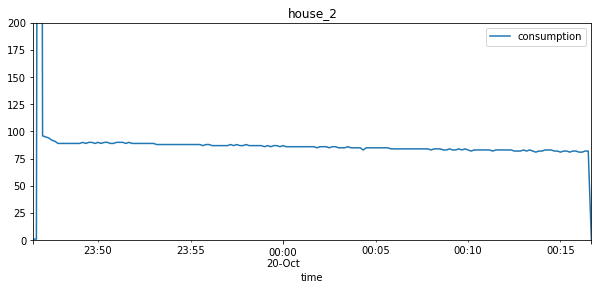

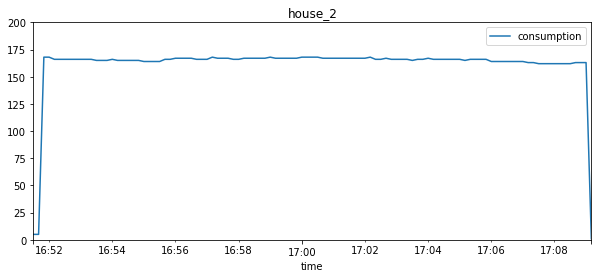

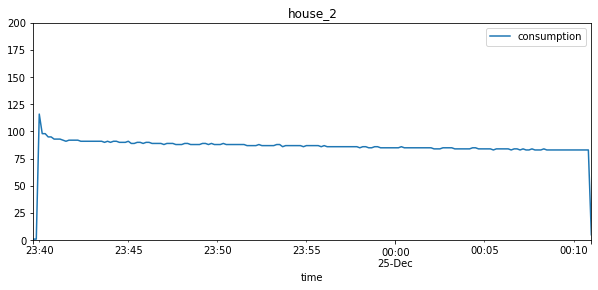

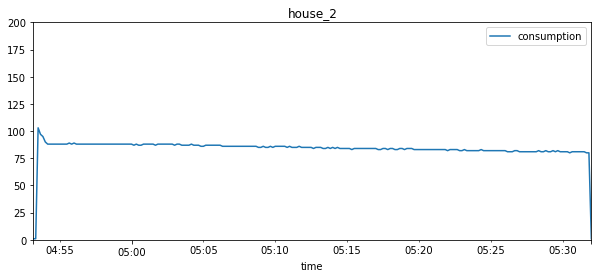

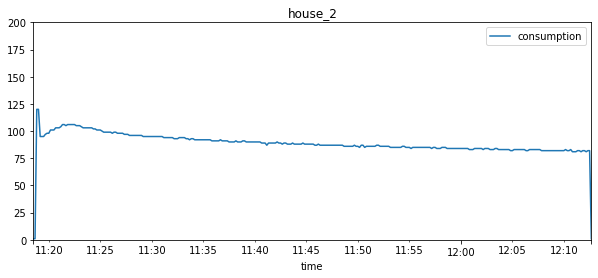

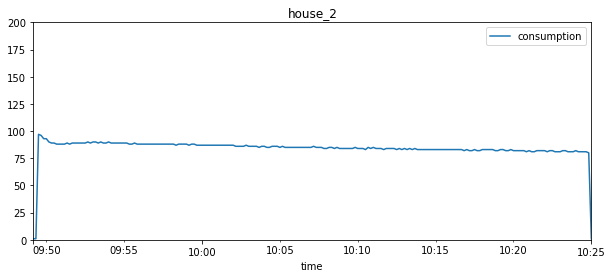

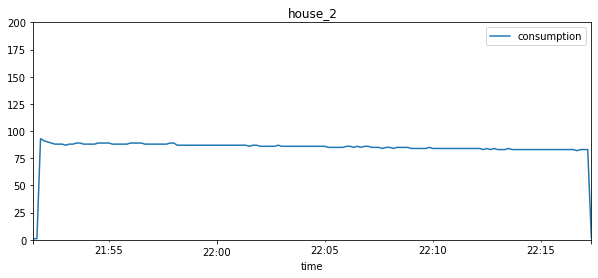

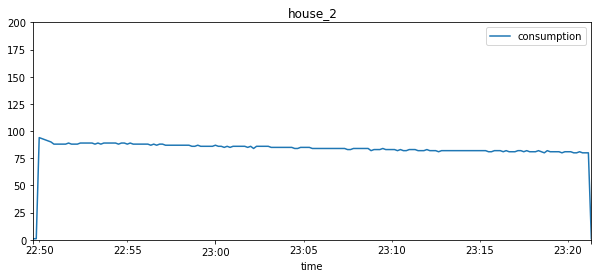

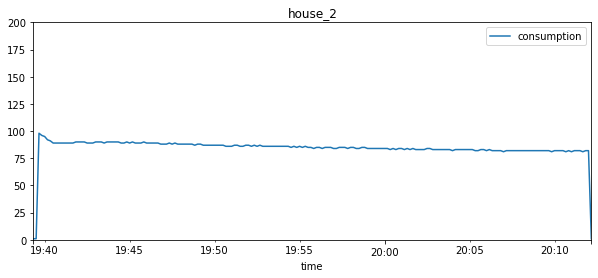

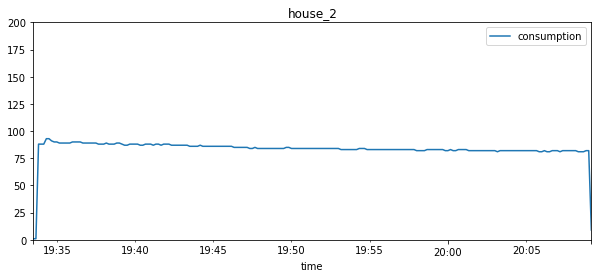

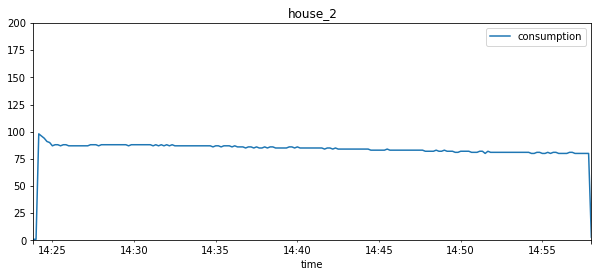

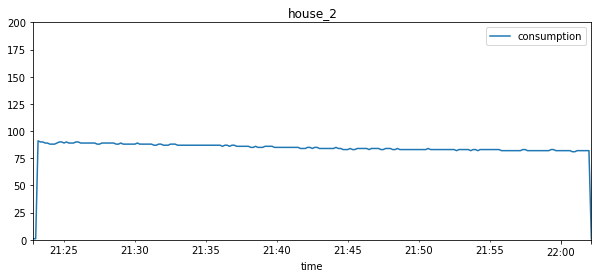

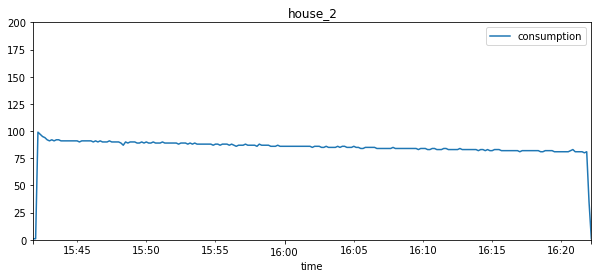

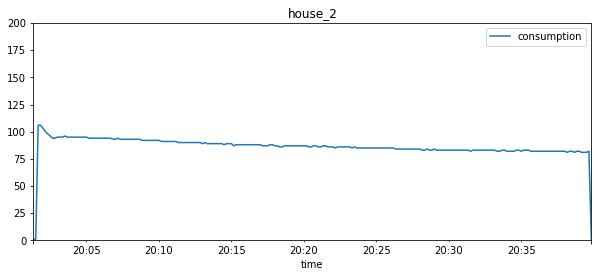

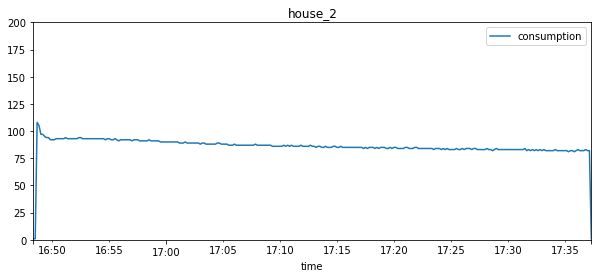

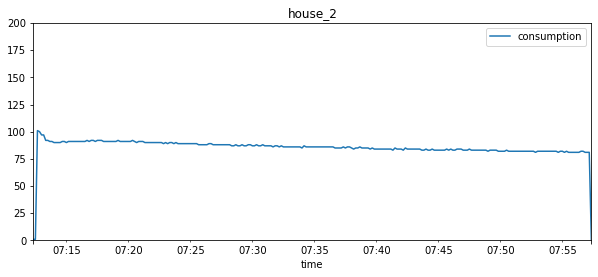

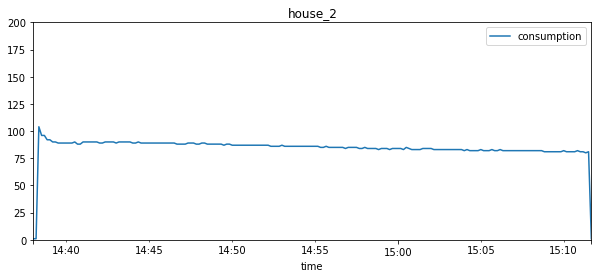

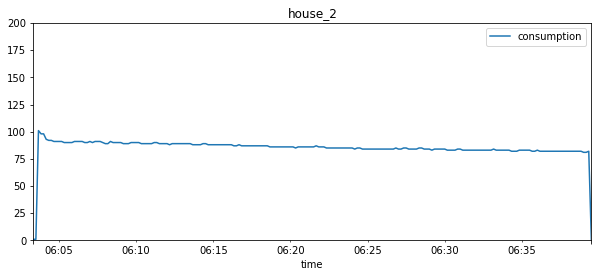

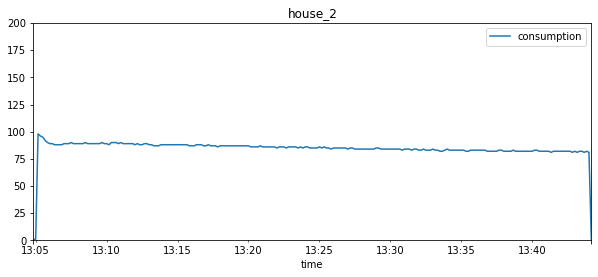

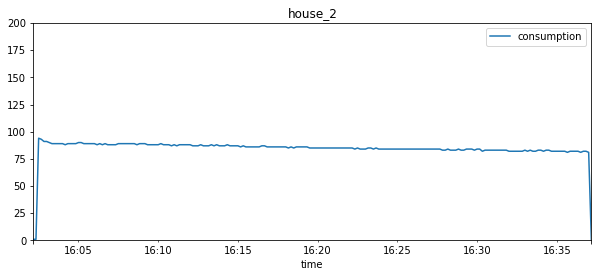

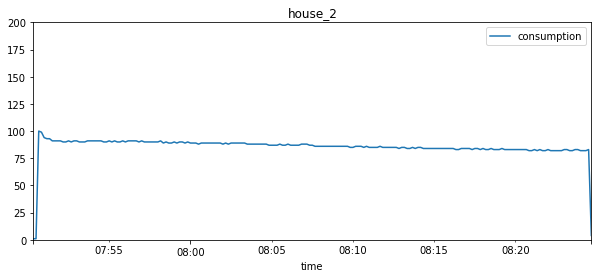

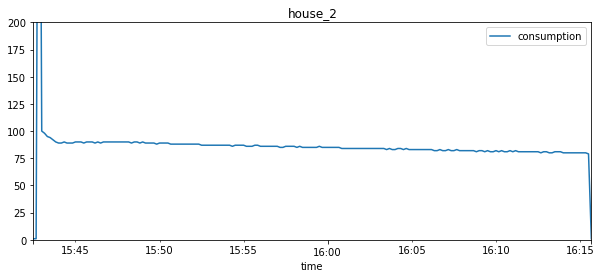

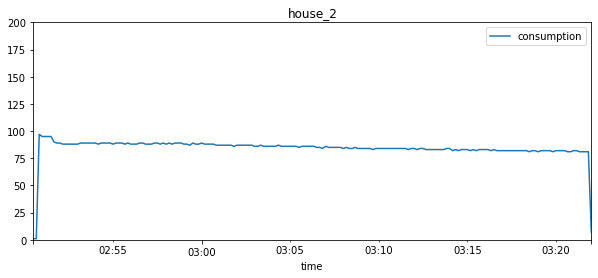

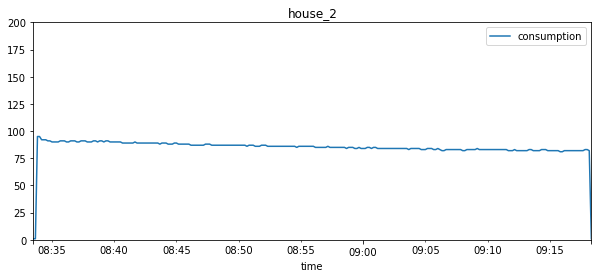

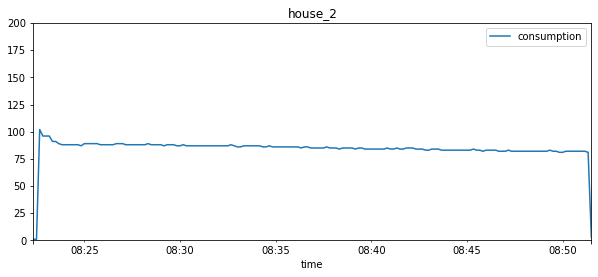

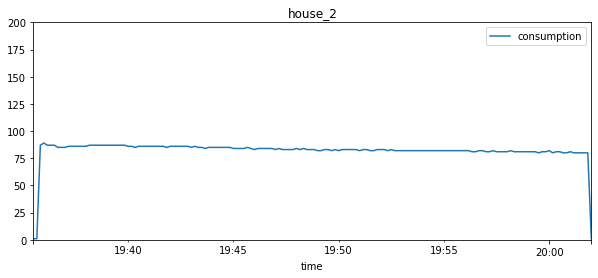

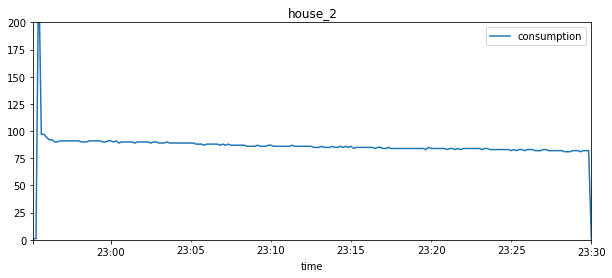

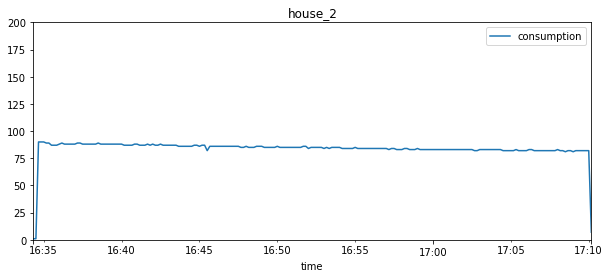

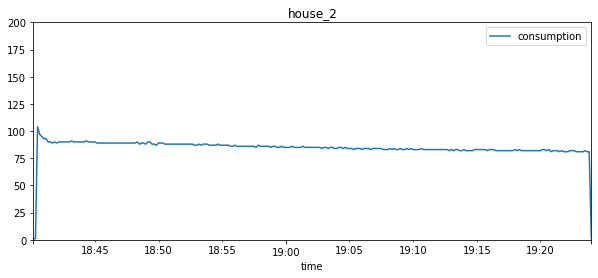

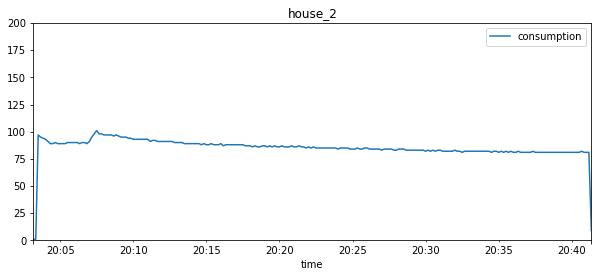

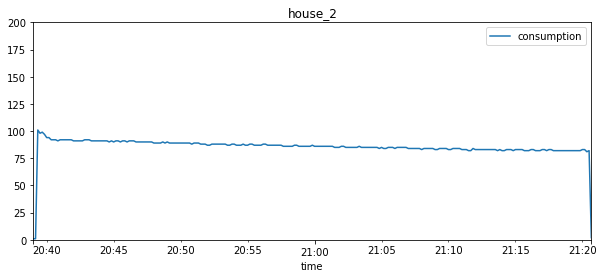

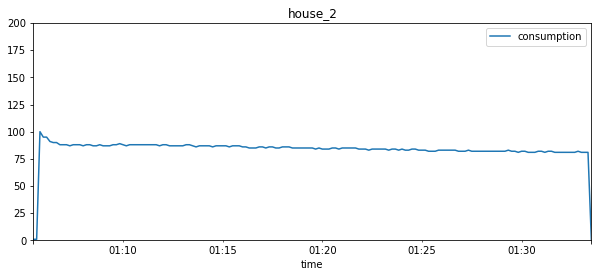

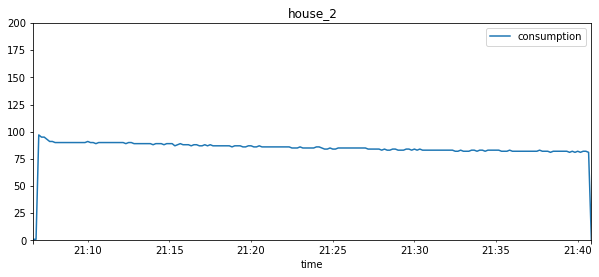

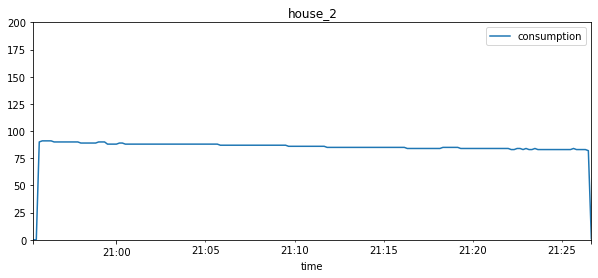

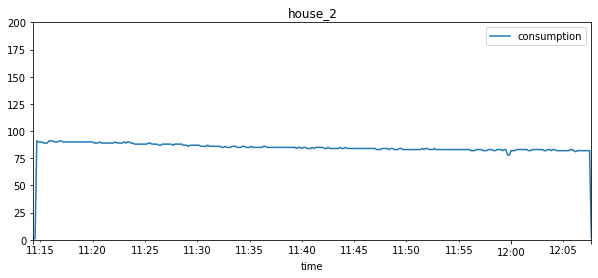

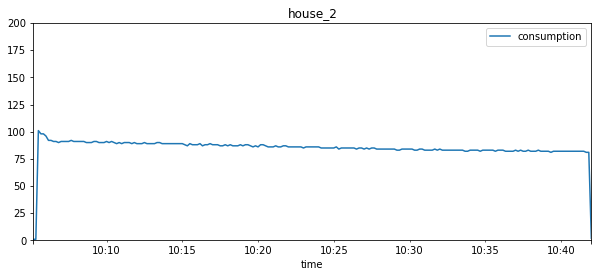

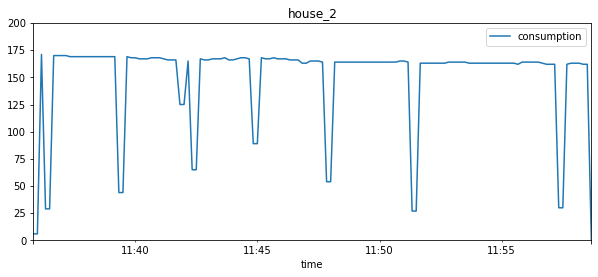

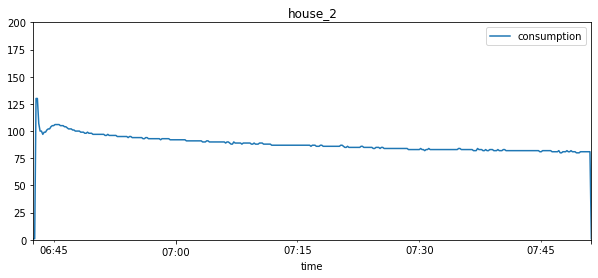

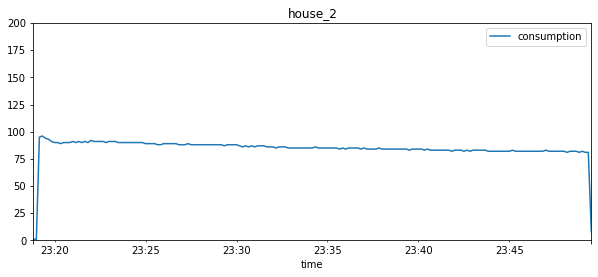

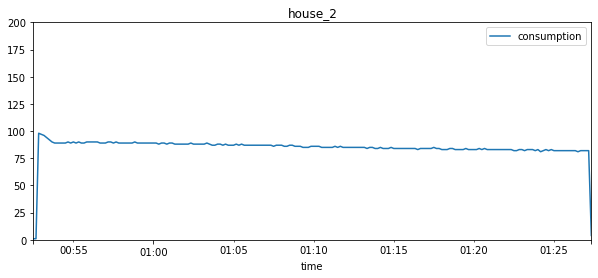

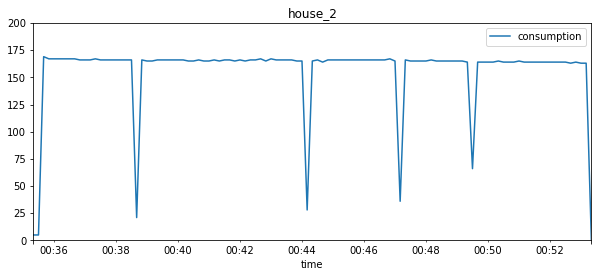

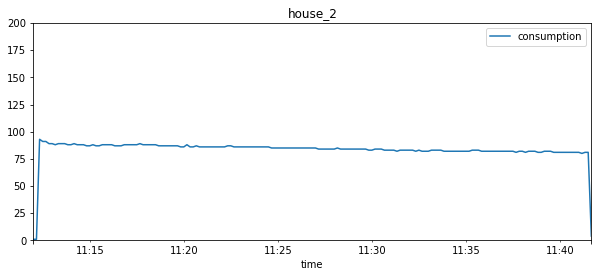

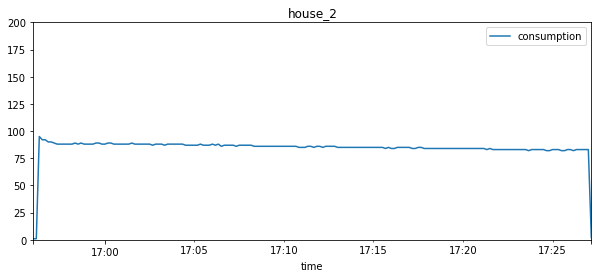

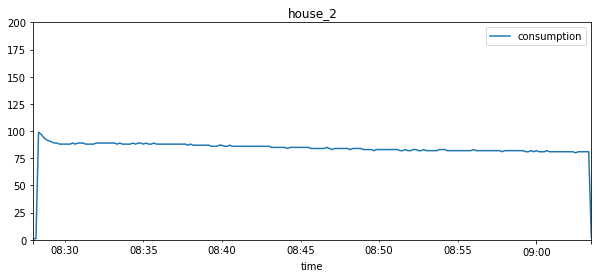

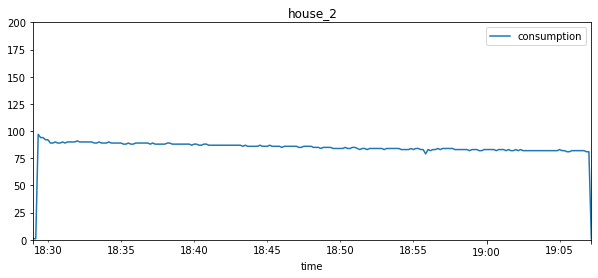

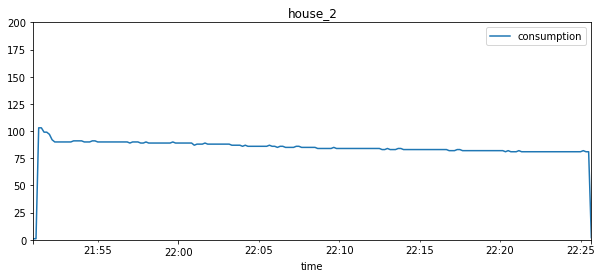

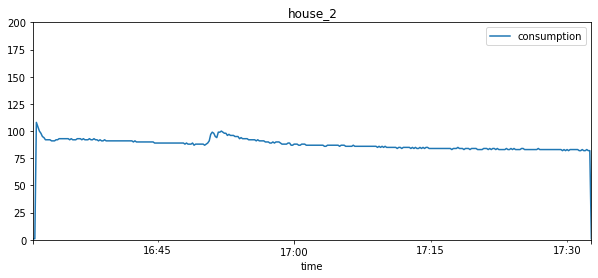

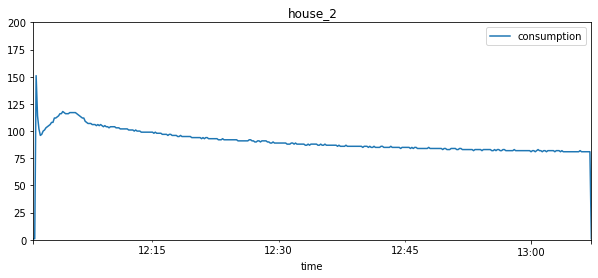

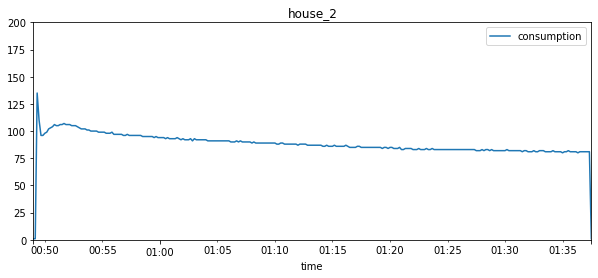

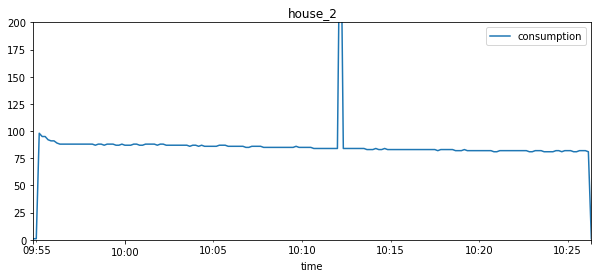

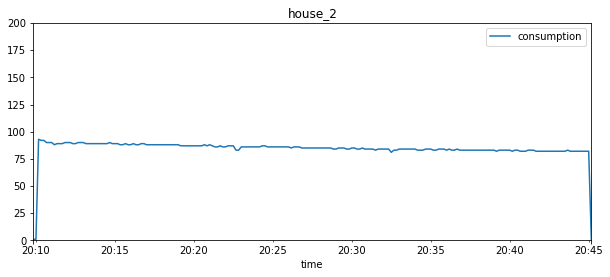

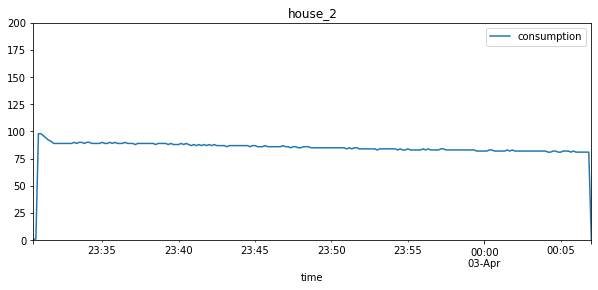

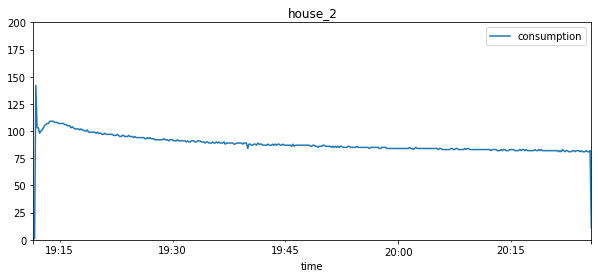

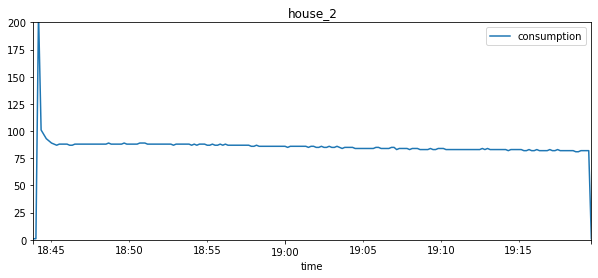

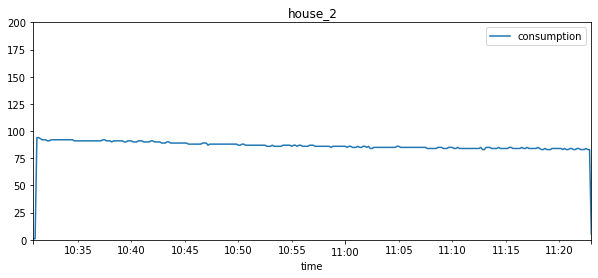

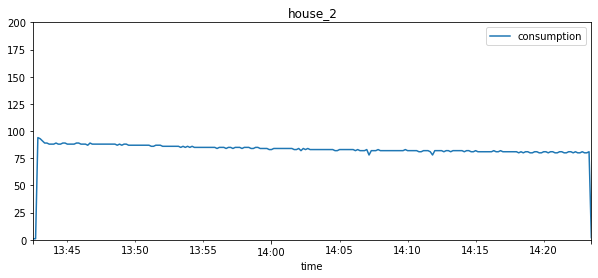

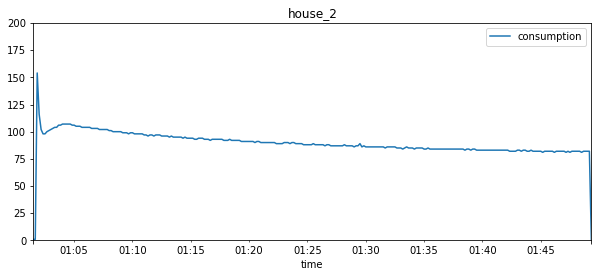

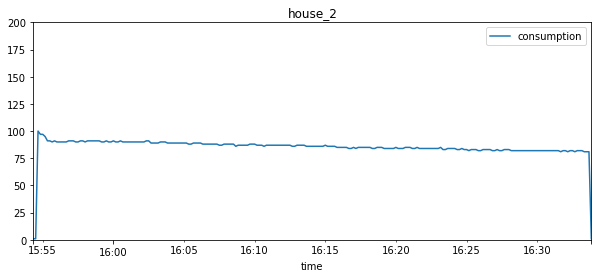

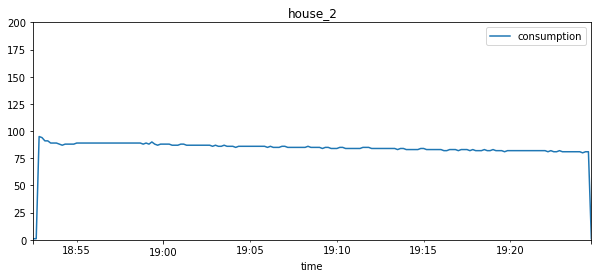

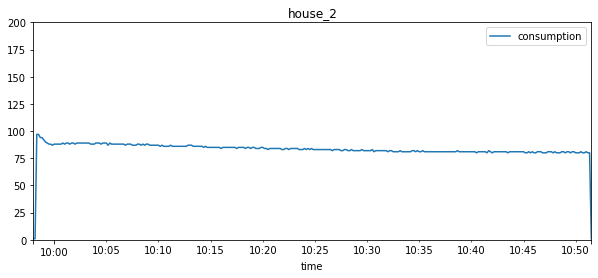

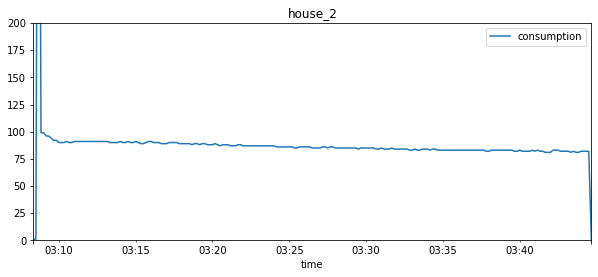

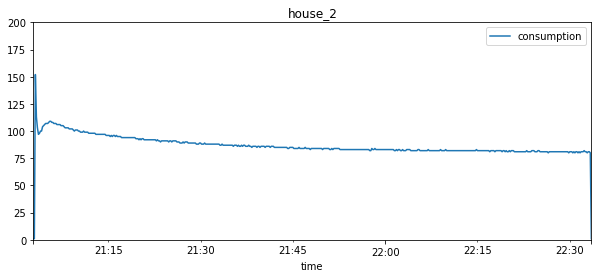

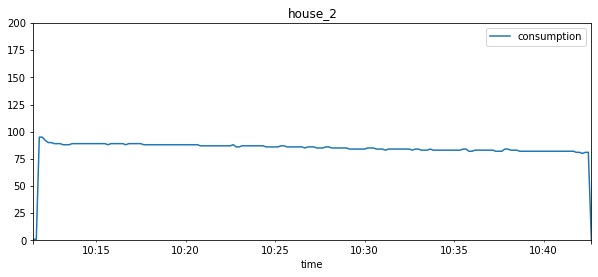

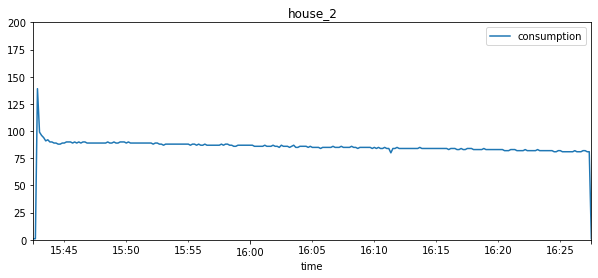

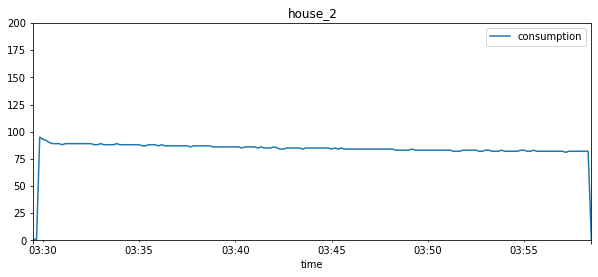

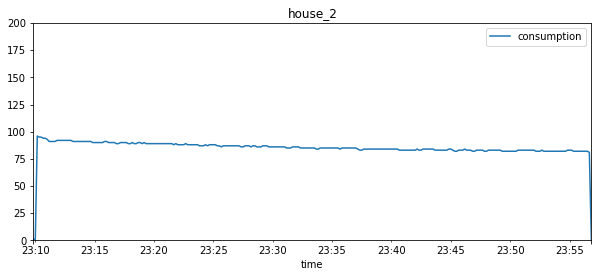

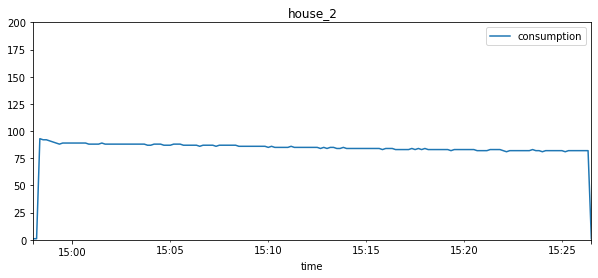

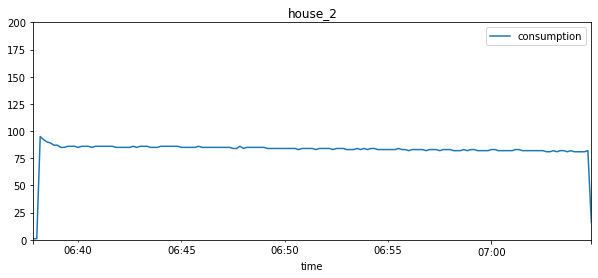

In [23]:
house=2
activations=random.sample(range(0, len(Refit_fridge_freezer_activations[house])),100)
df=Refit_fridge_freezers[house]
for activation in activations:
    beginning=Refit_fridge_freezer_activations[house][activation][0]
    end=Refit_fridge_freezer_activations[house][activation][1]
    ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
    ax.set_ylim(0,200)

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


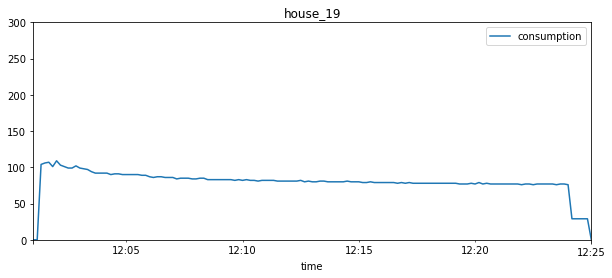

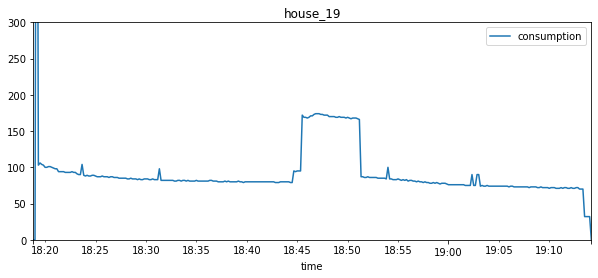

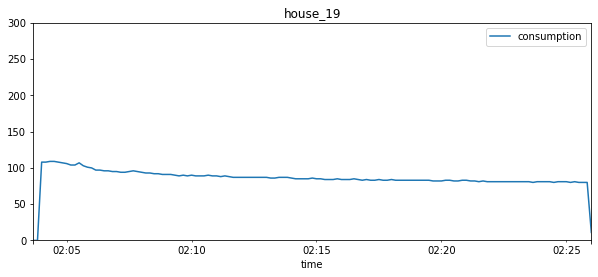

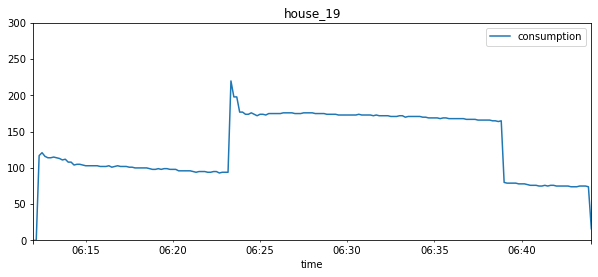

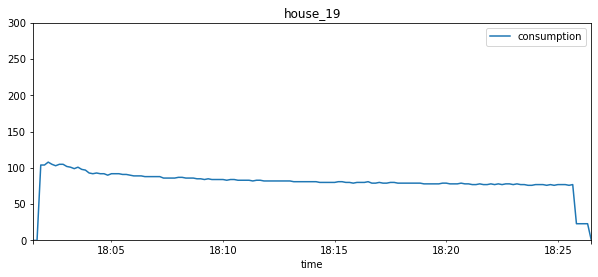

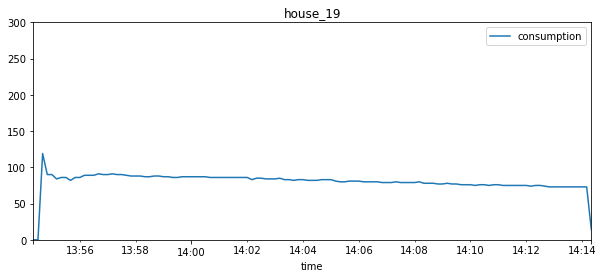

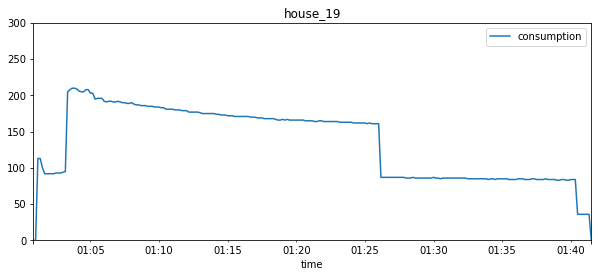

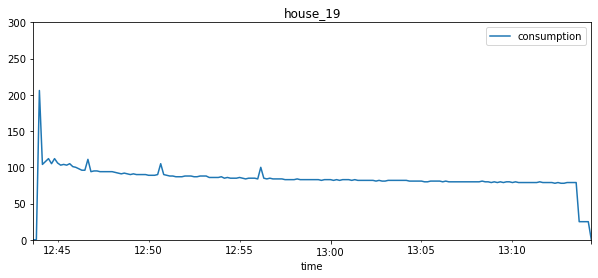

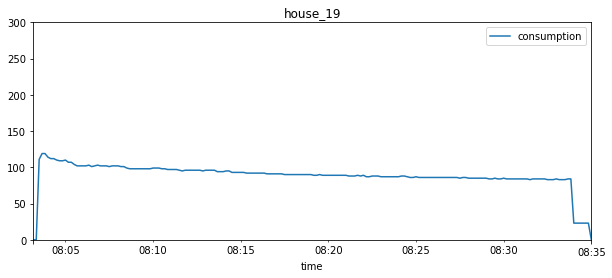

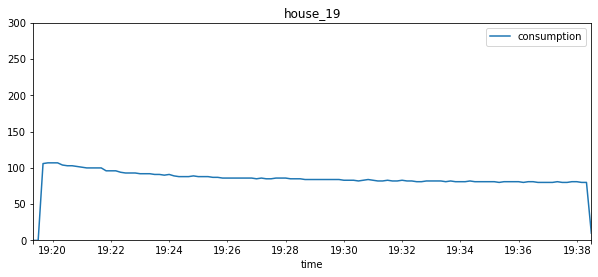

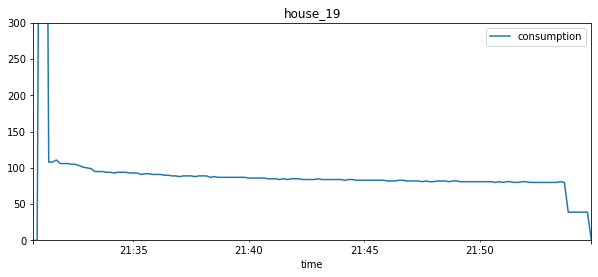

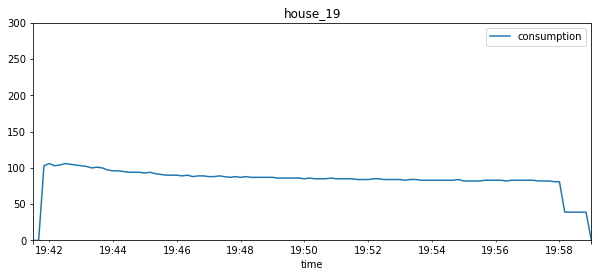

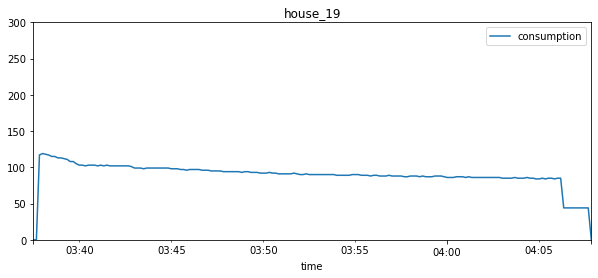

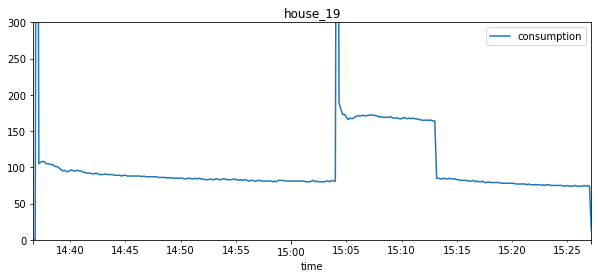

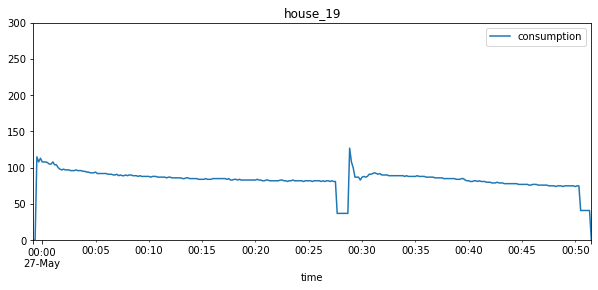

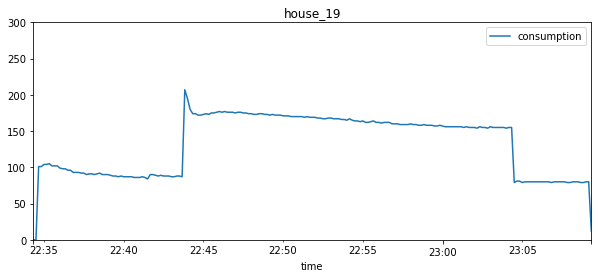

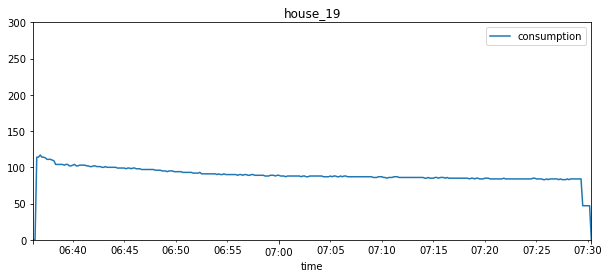

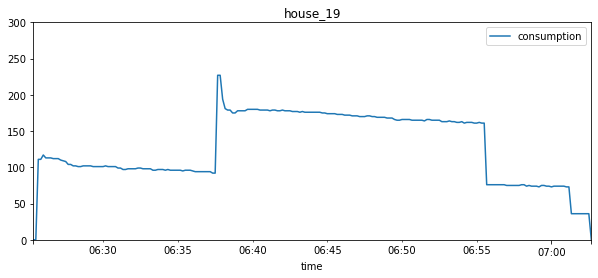

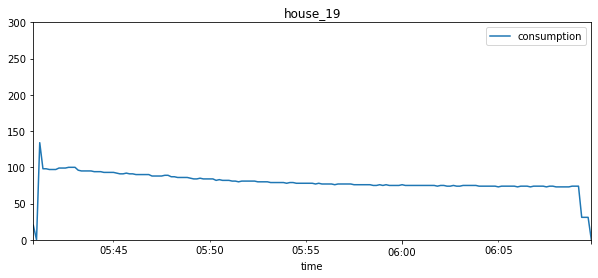

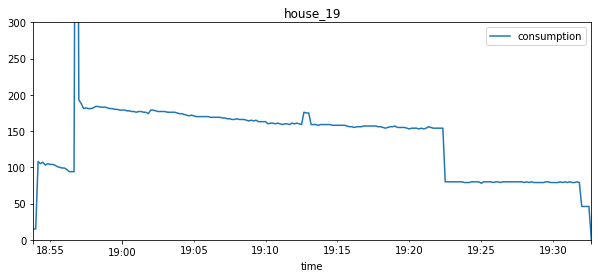

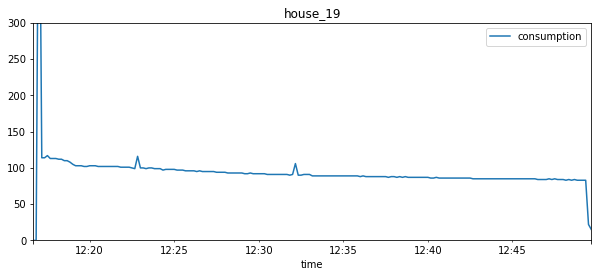

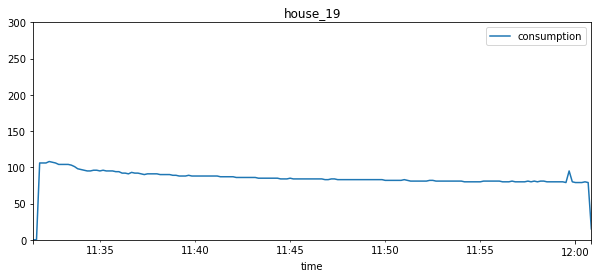

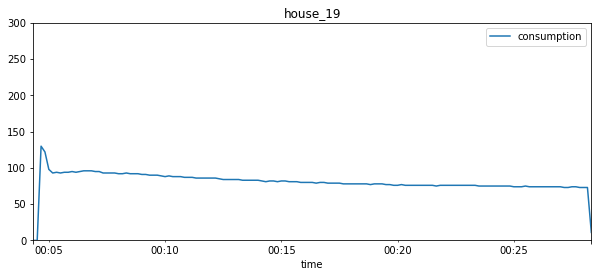

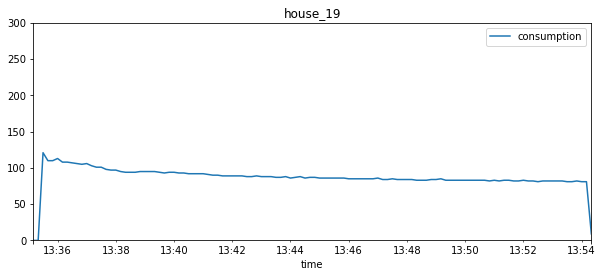

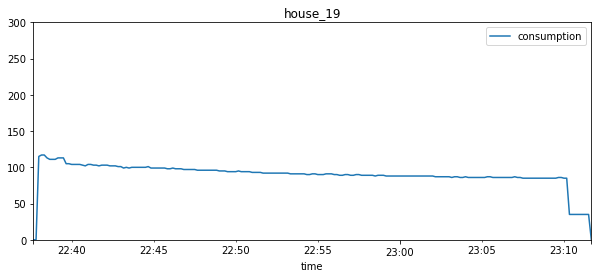

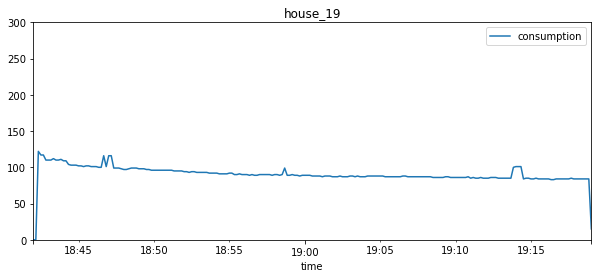

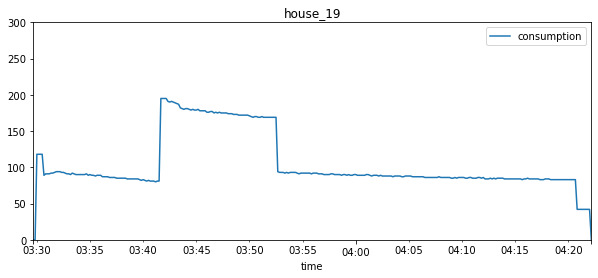

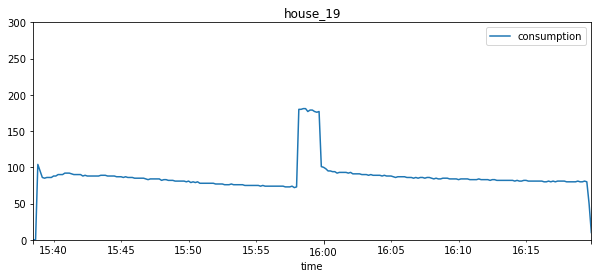

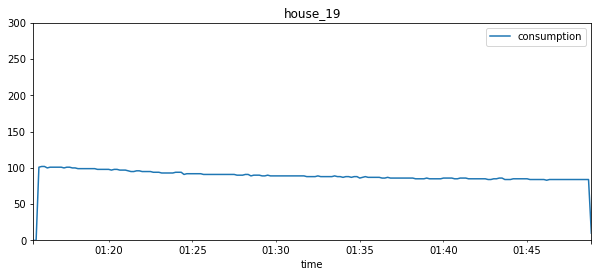

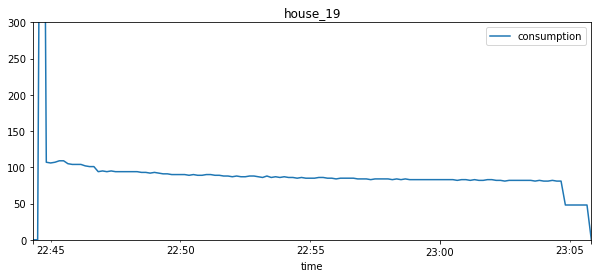

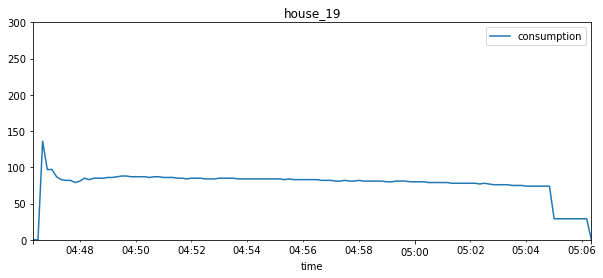

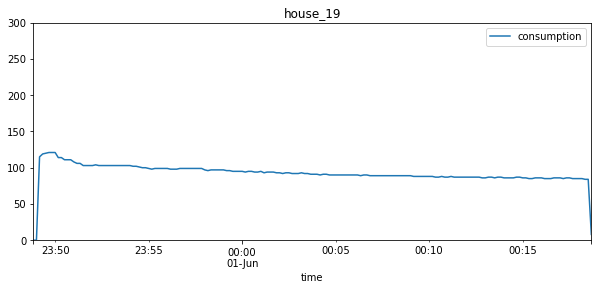

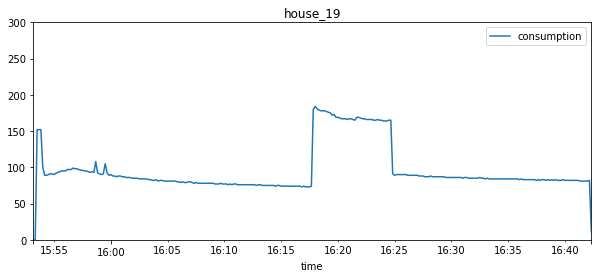

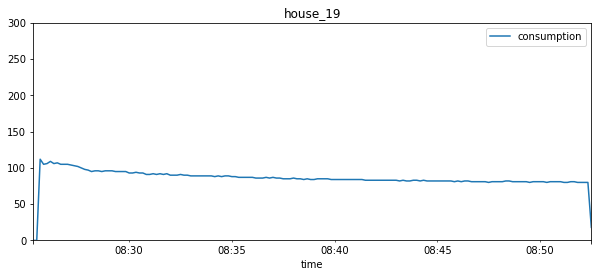

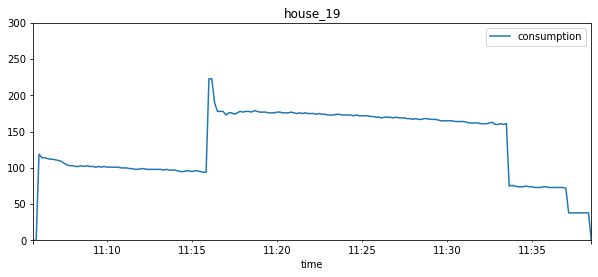

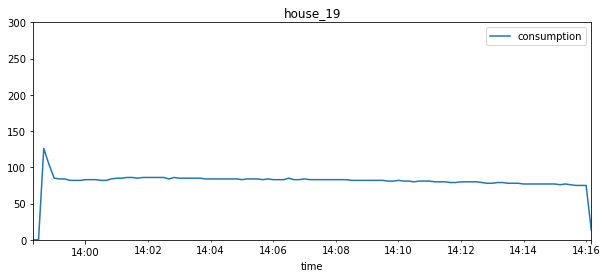

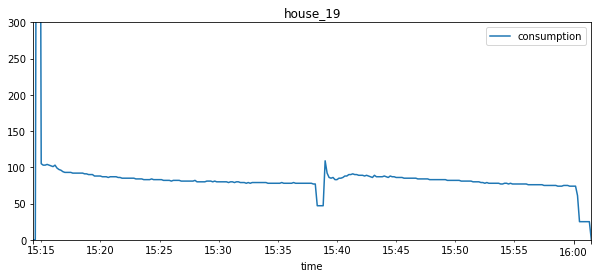

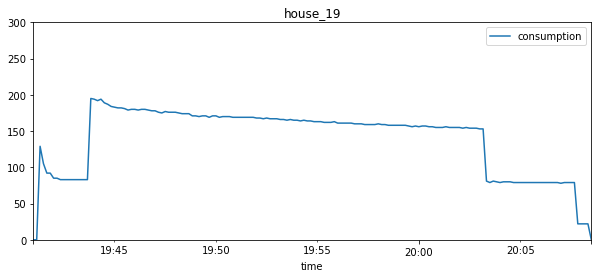

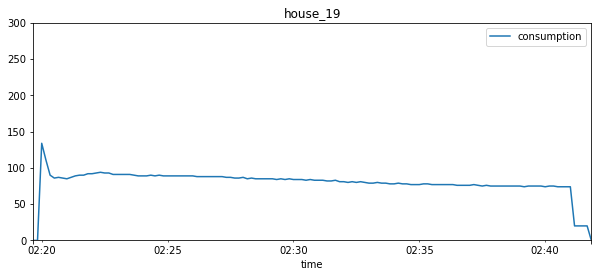

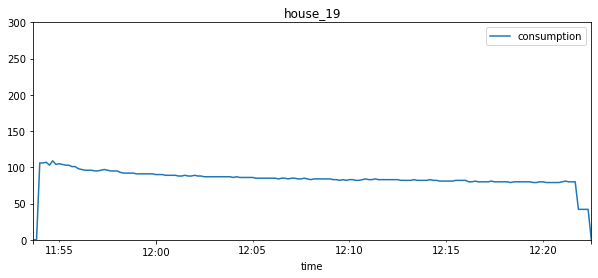

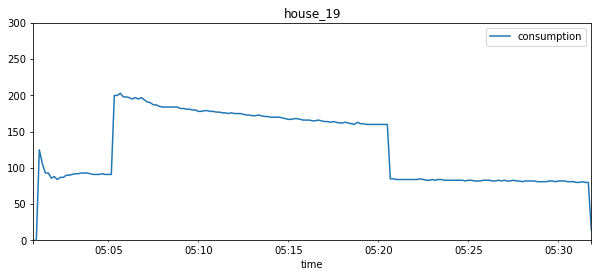

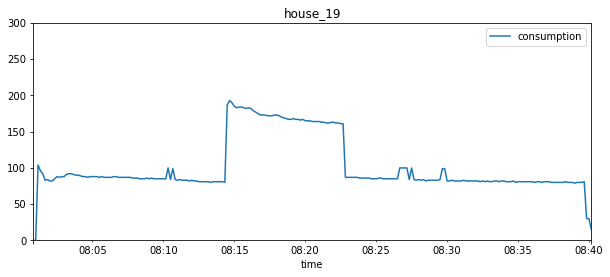

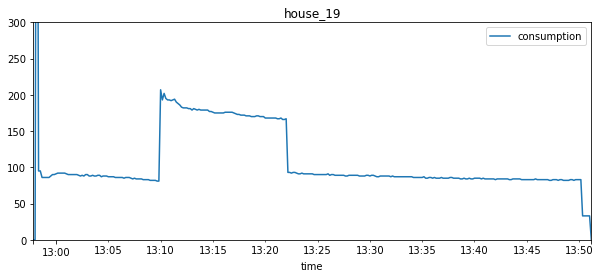

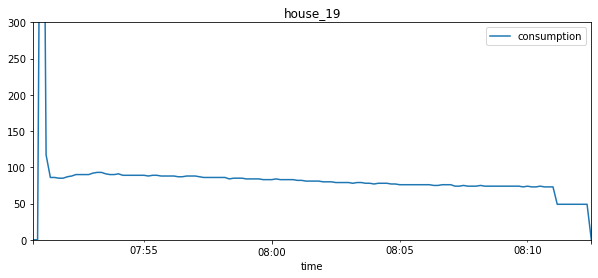

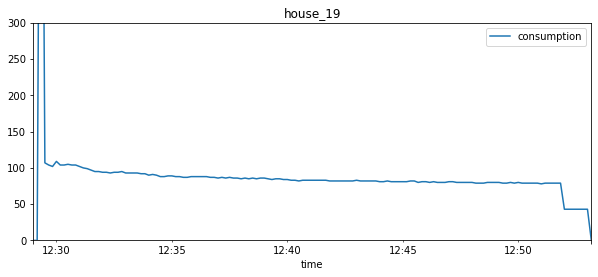

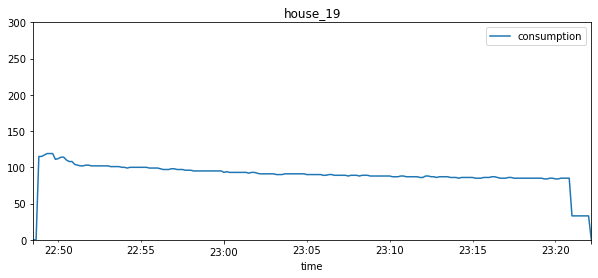

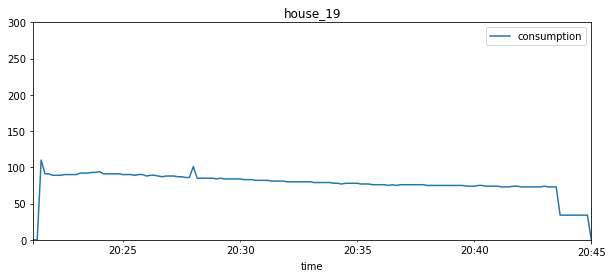

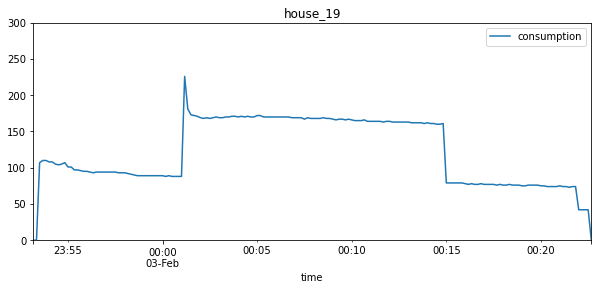

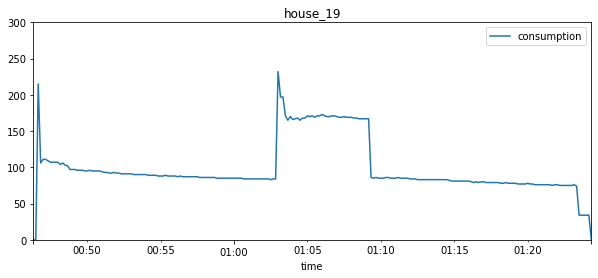

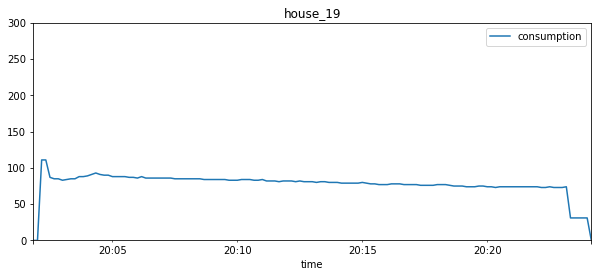

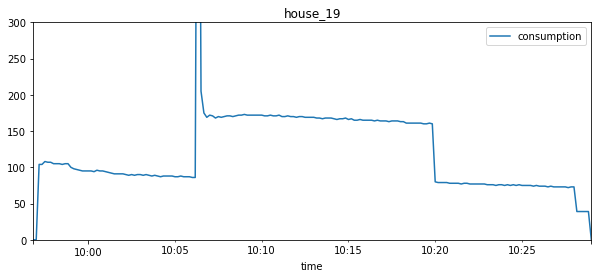

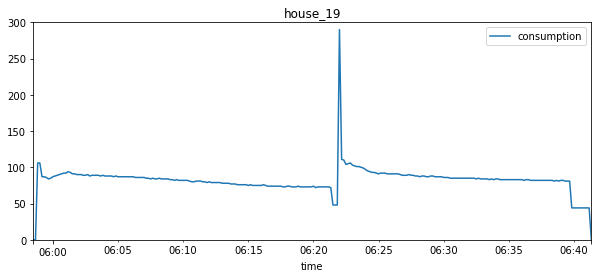

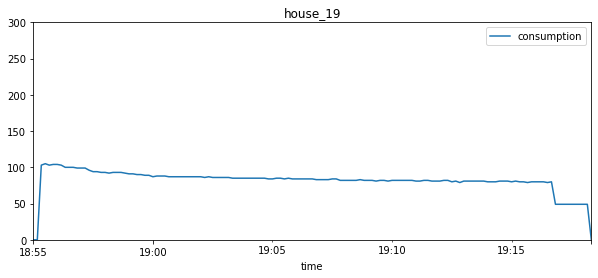

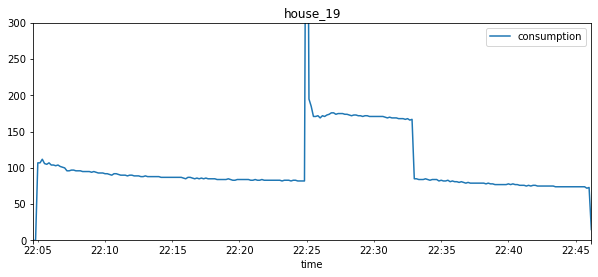

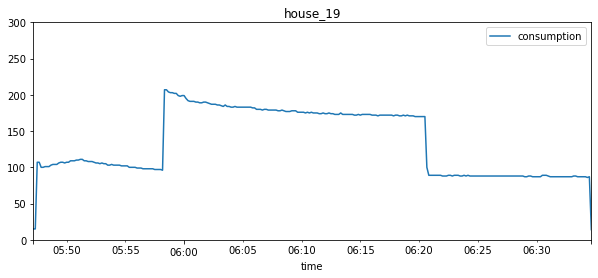

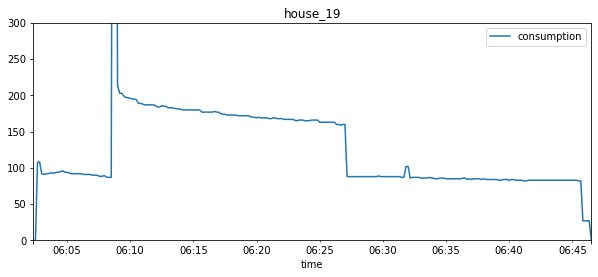

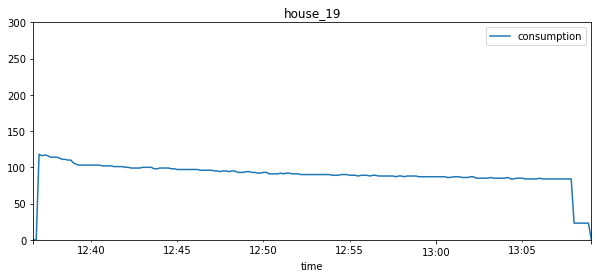

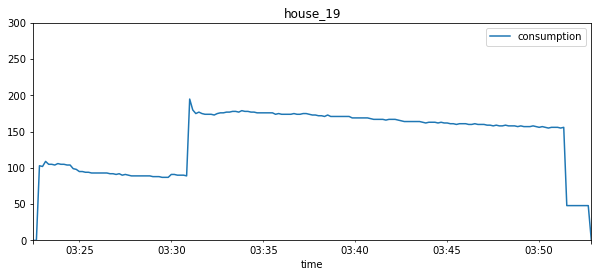

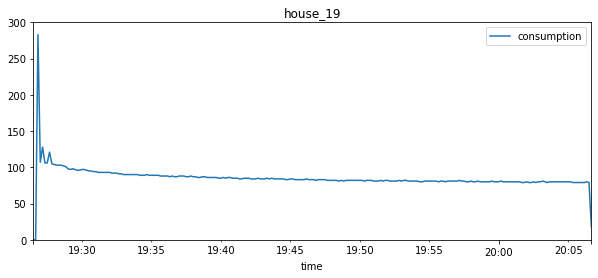

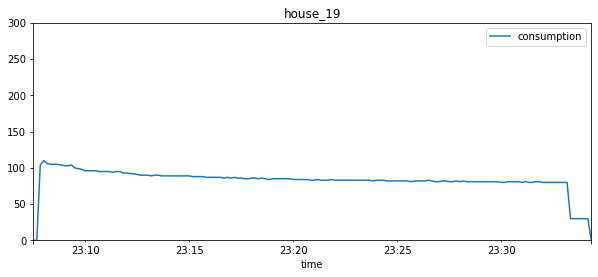

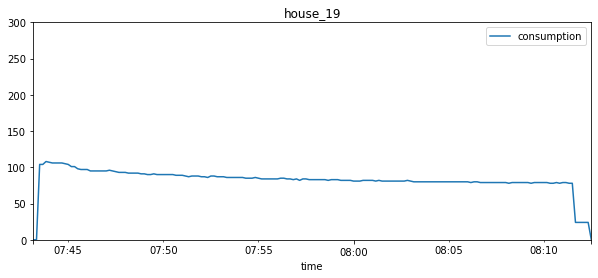

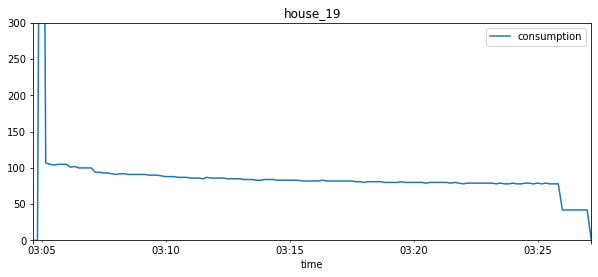

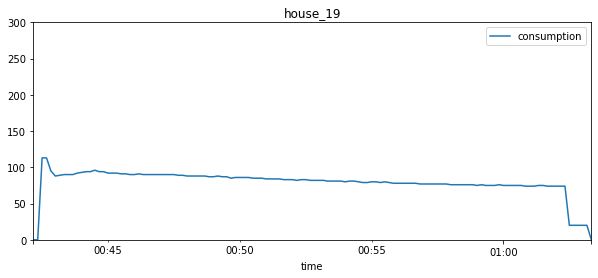

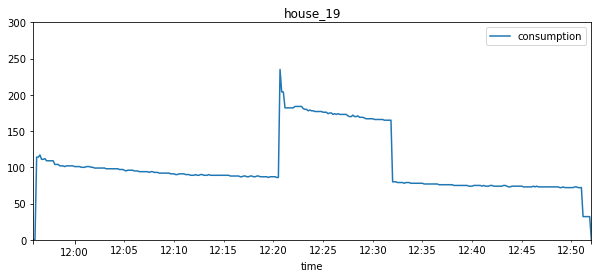

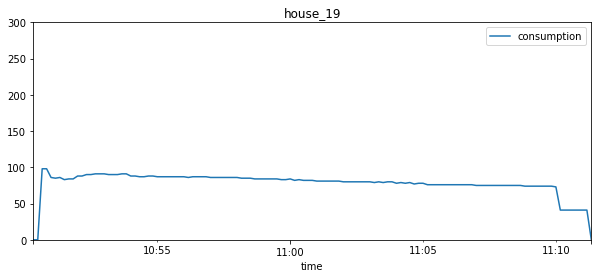

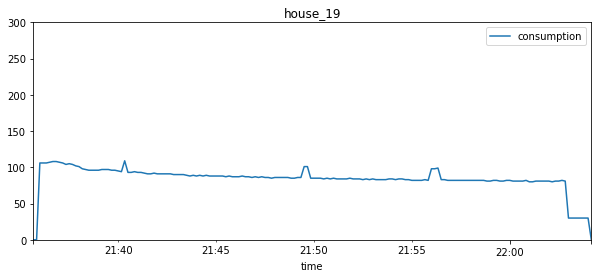

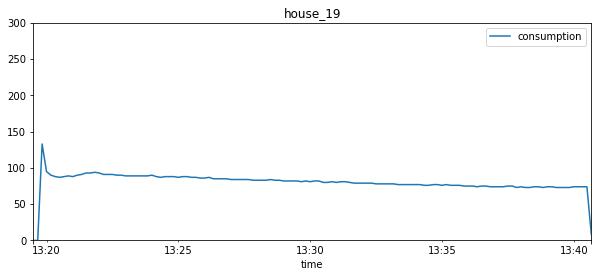

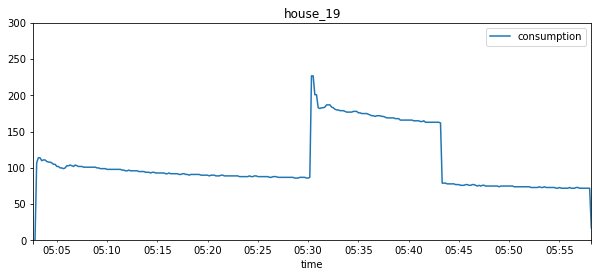

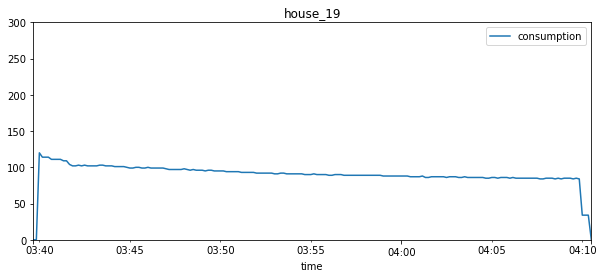

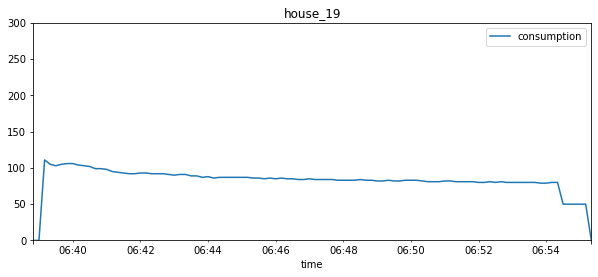

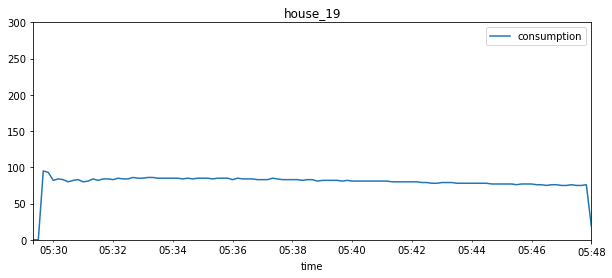

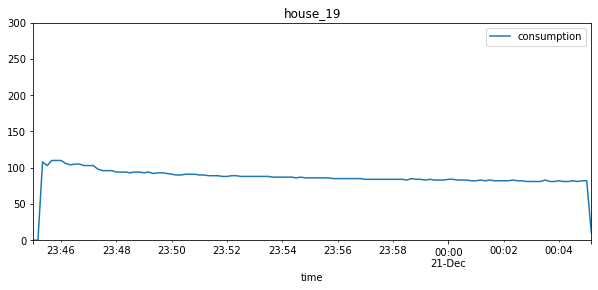

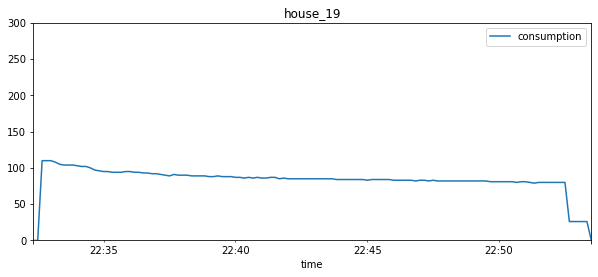

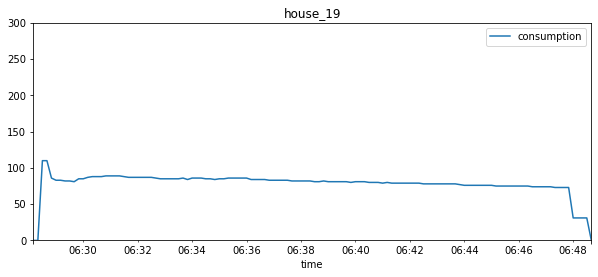

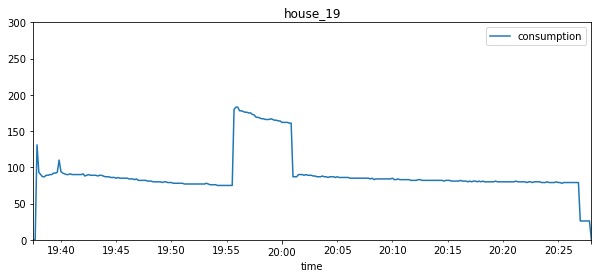

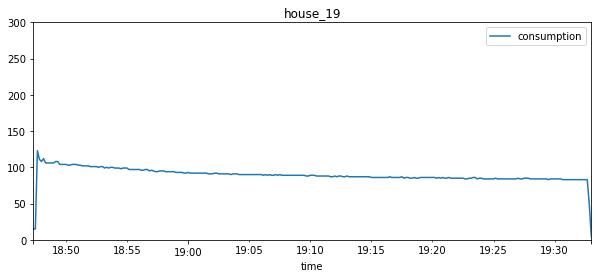

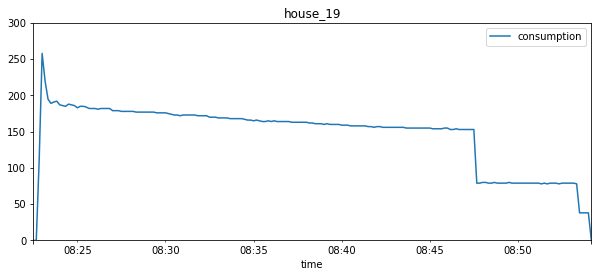

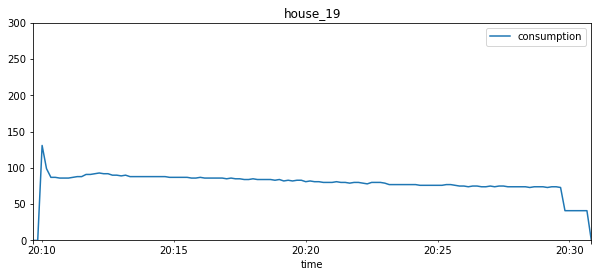

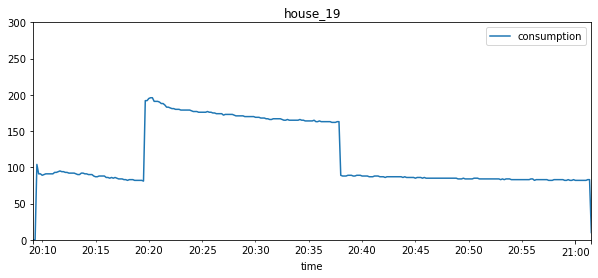

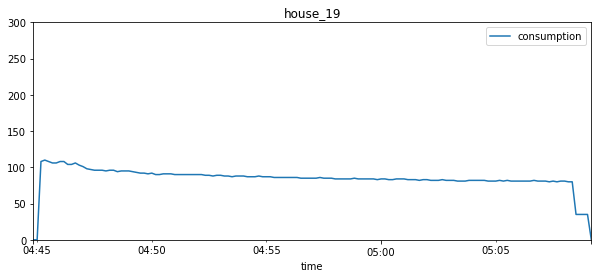

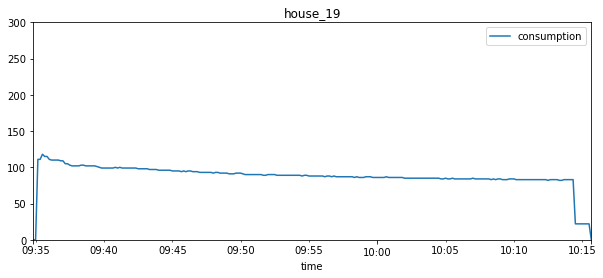

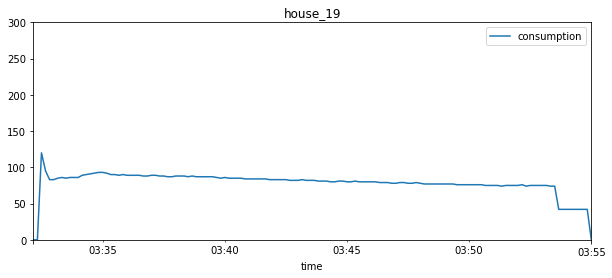

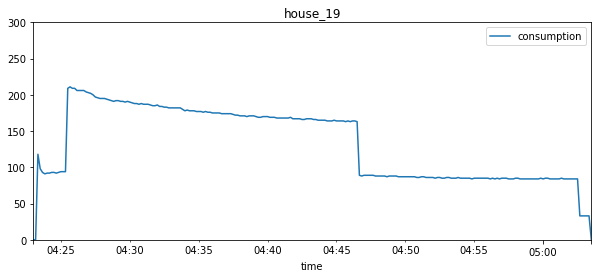

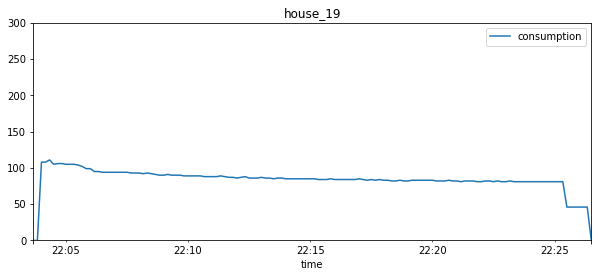

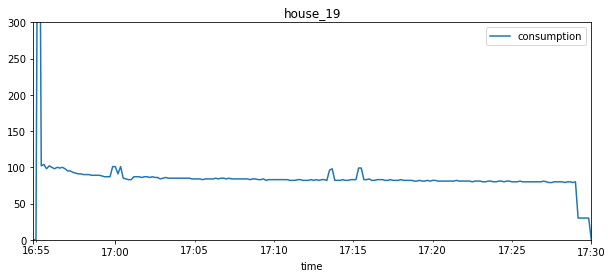

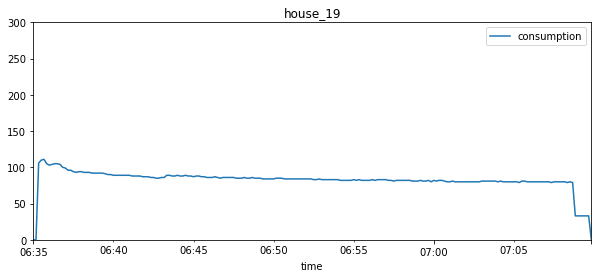

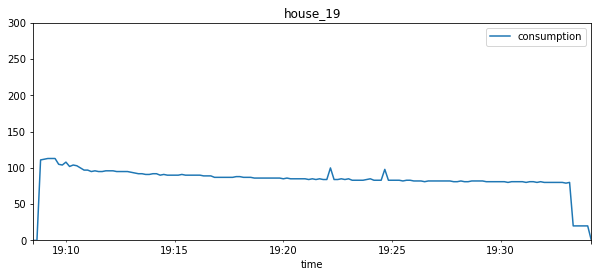

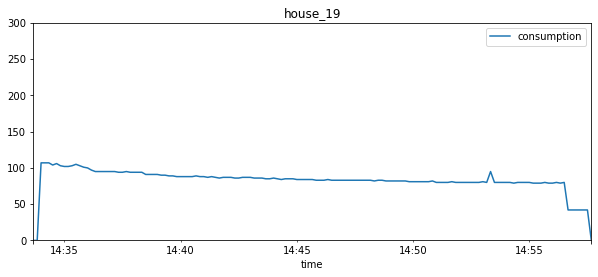

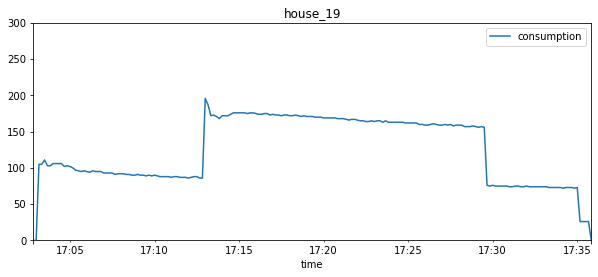

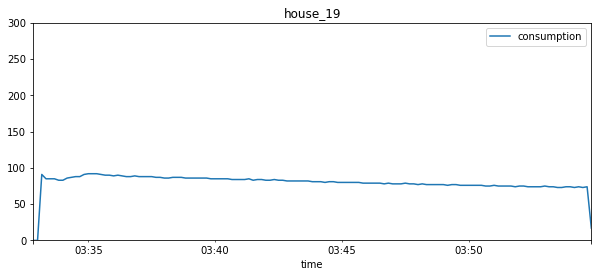

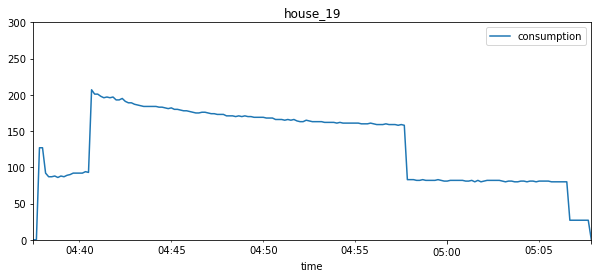

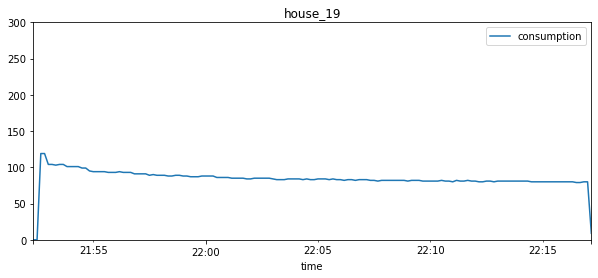

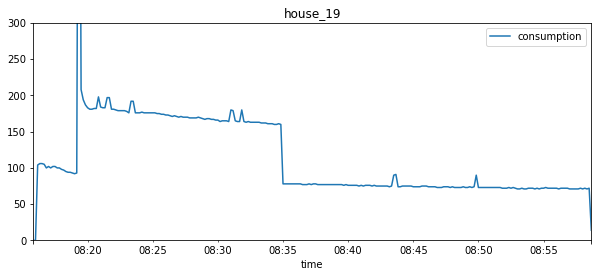

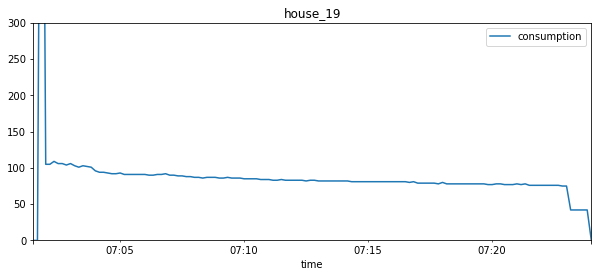

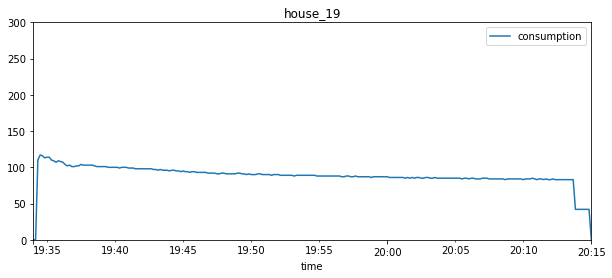

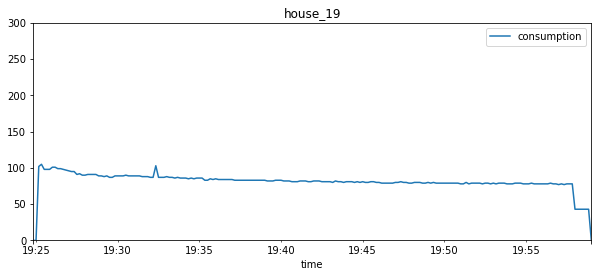

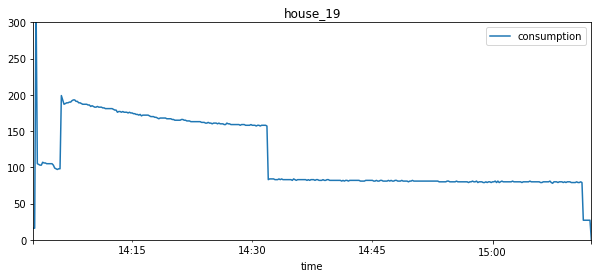

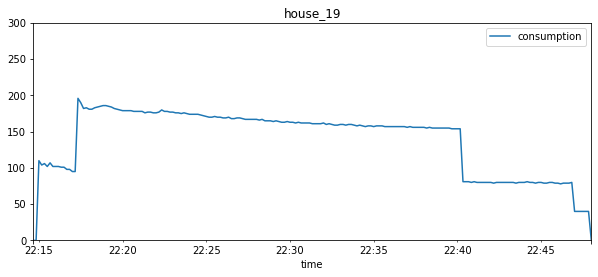

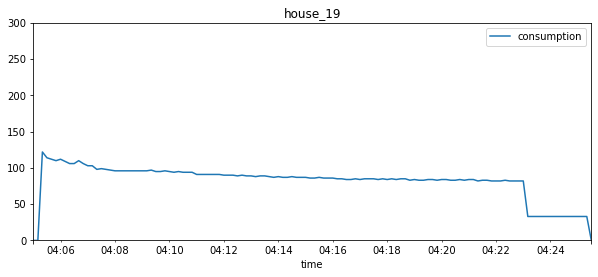

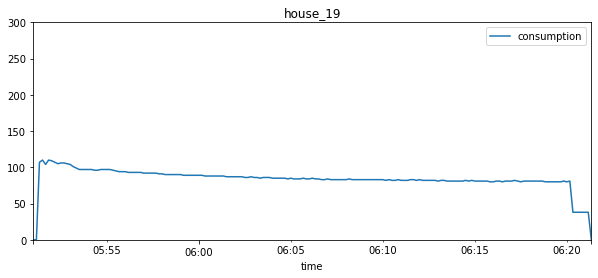

In [24]:
house=19
activations=random.sample(range(0, len(Refit_fridge_freezer_activations[house])),100)
df=Refit_fridge_freezers[house]
for activation in activations:
    beginning=Refit_fridge_freezer_activations[house][activation][0]
    end=Refit_fridge_freezer_activations[house][activation][1]
    ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
    ax.set_ylim(0,300)

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


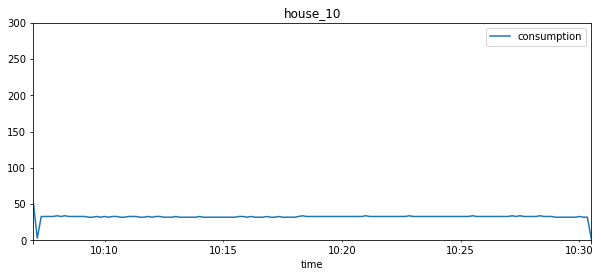

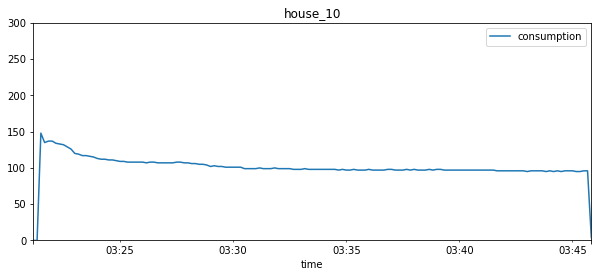

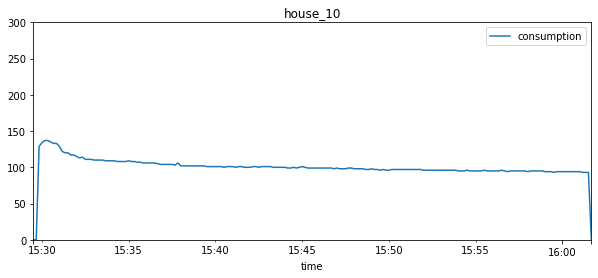

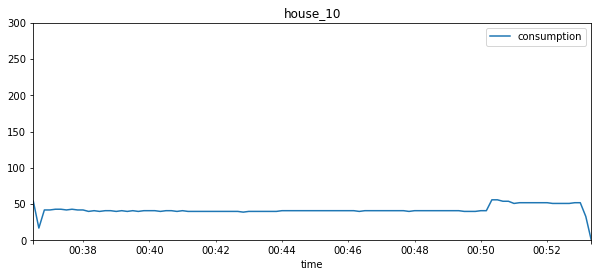

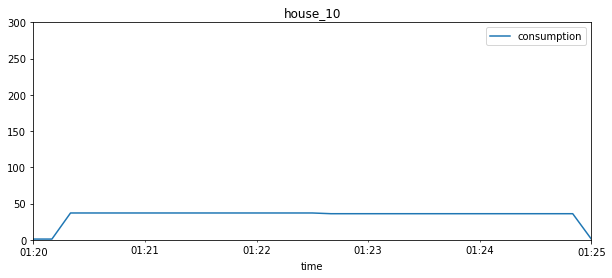

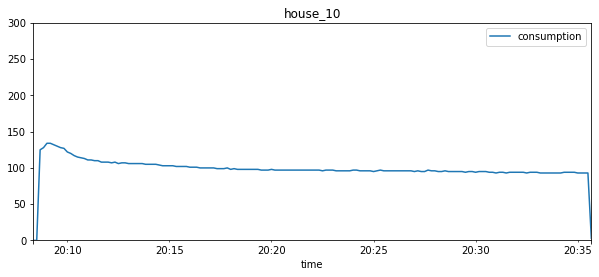

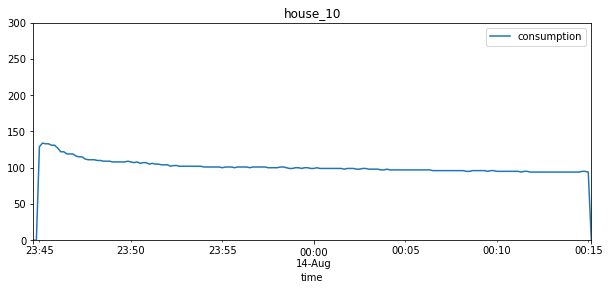

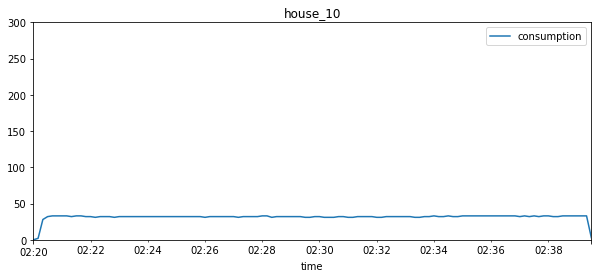

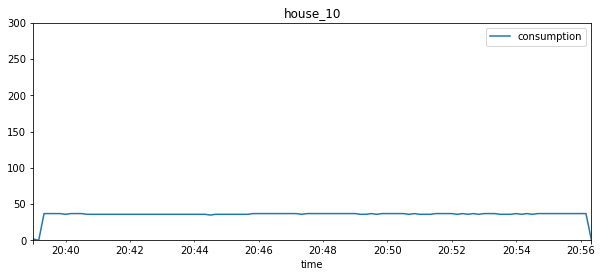

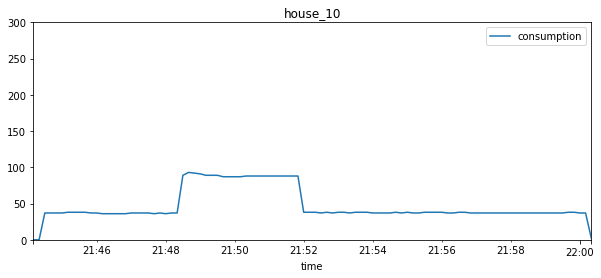

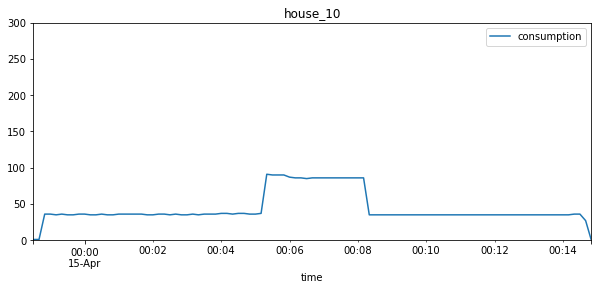

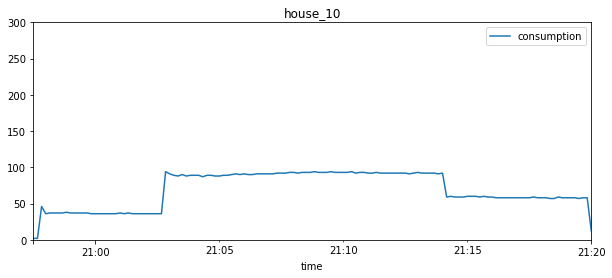

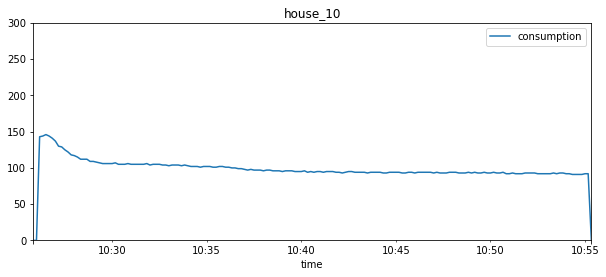

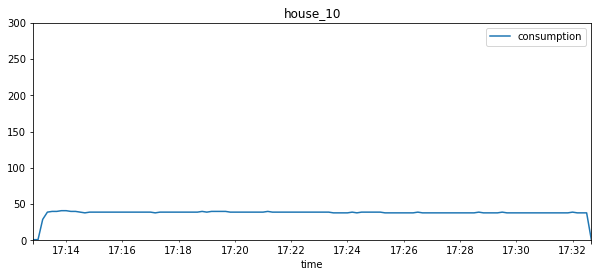

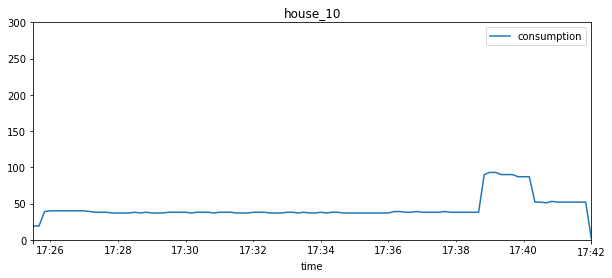

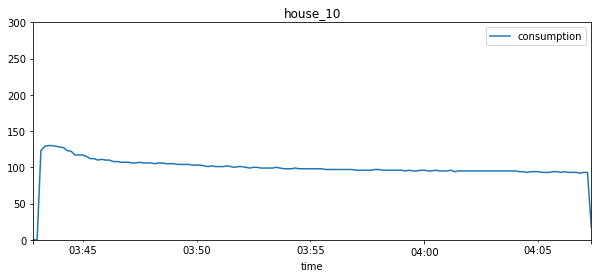

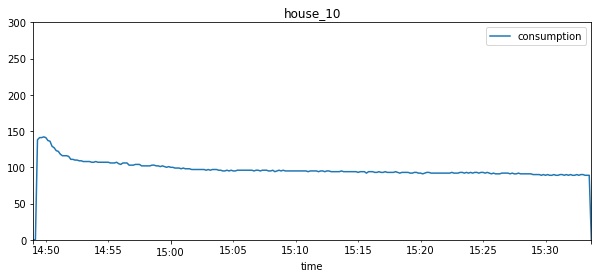

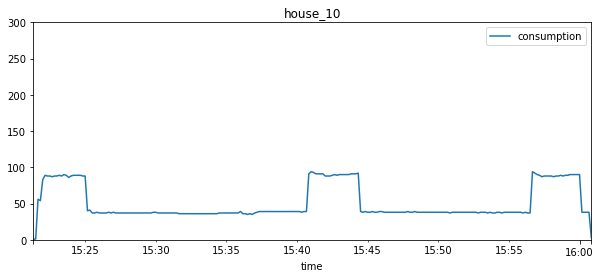

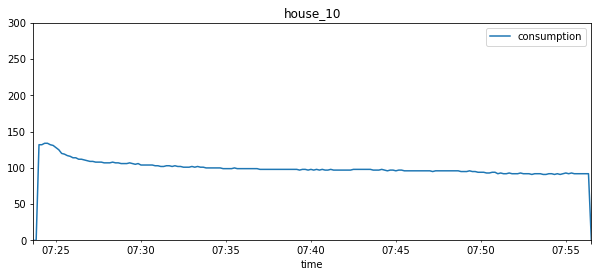

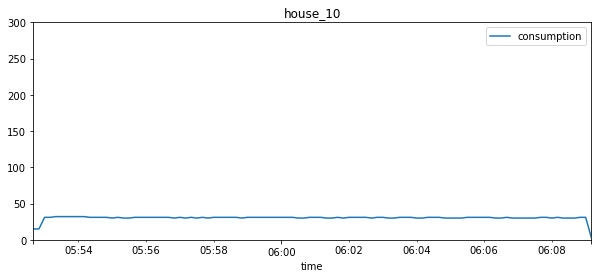

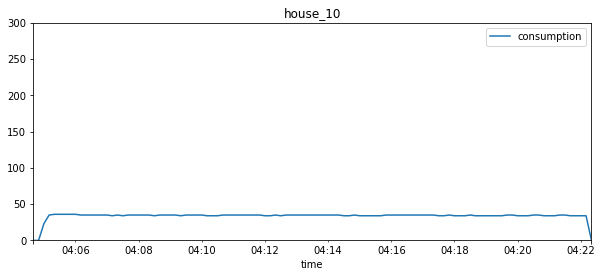

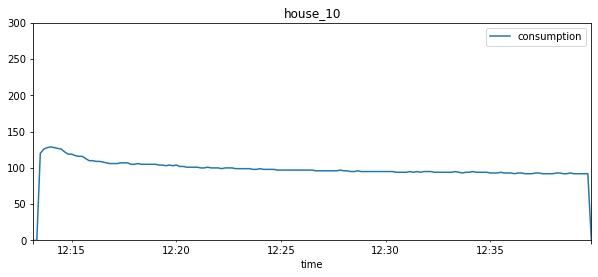

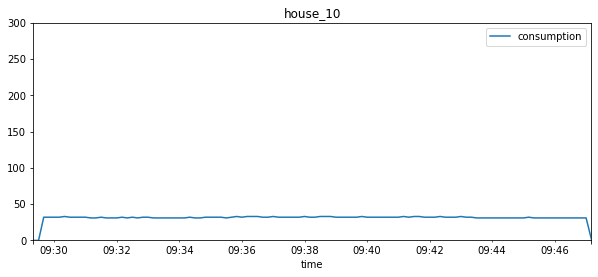

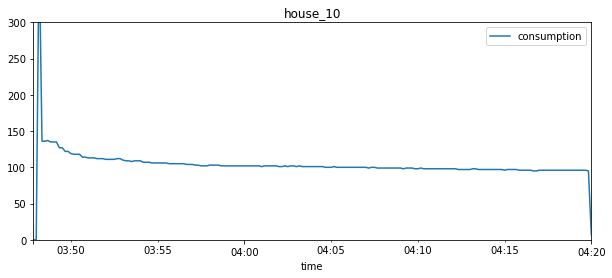

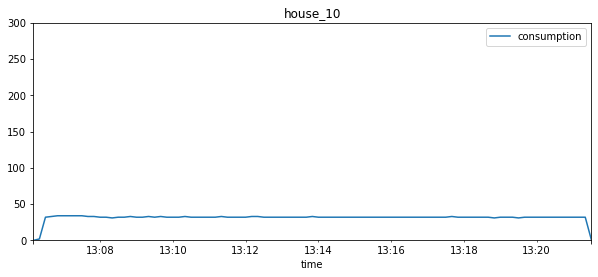

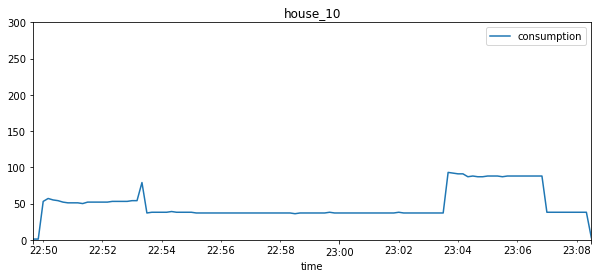

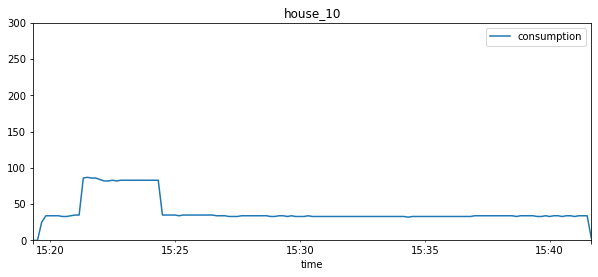

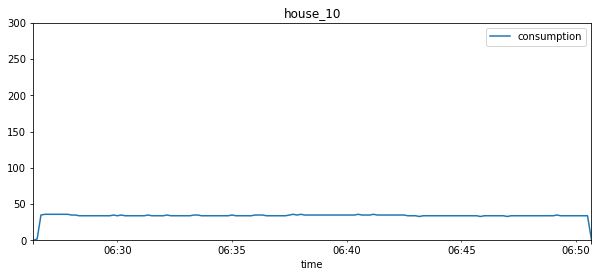

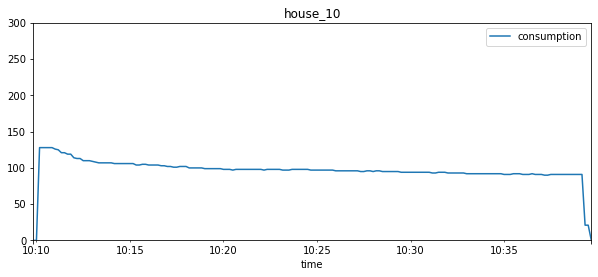

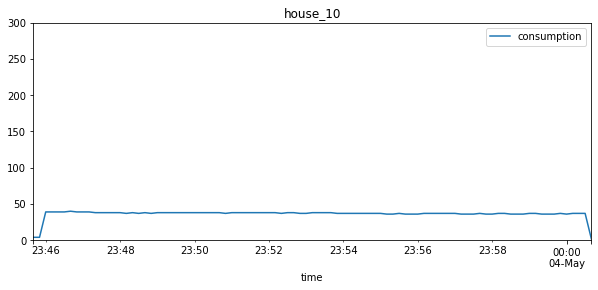

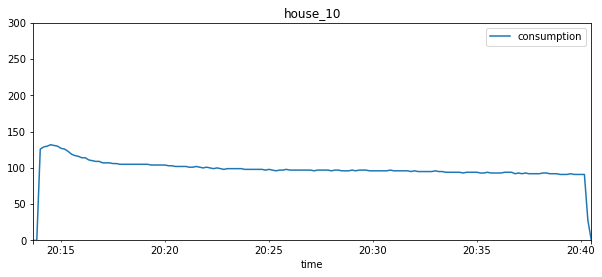

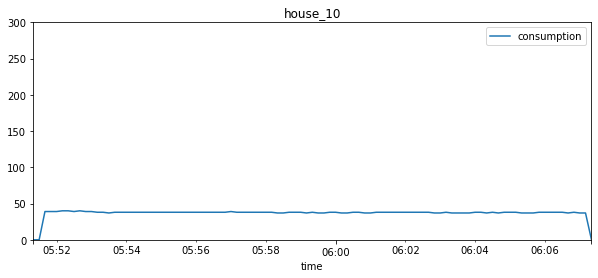

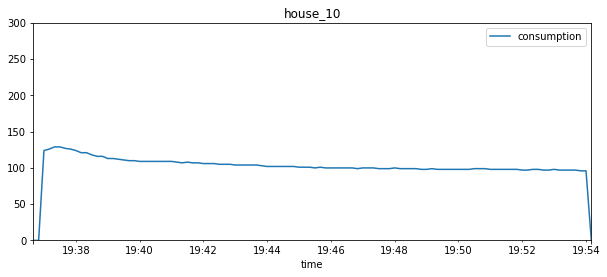

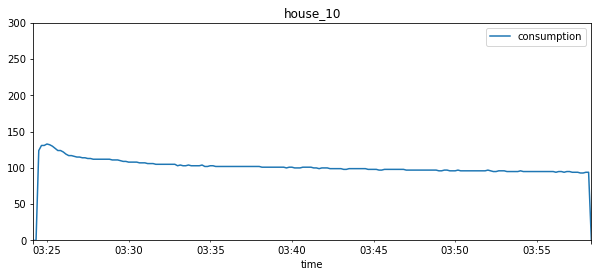

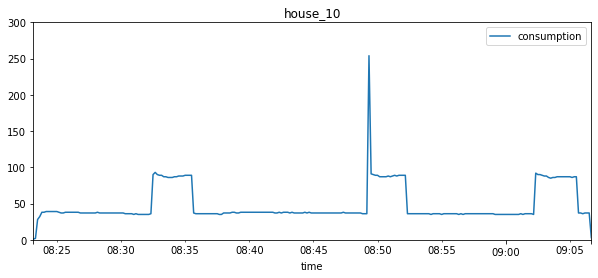

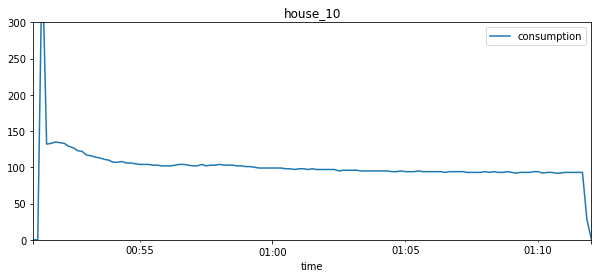

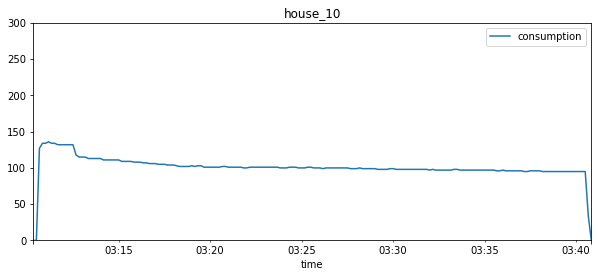

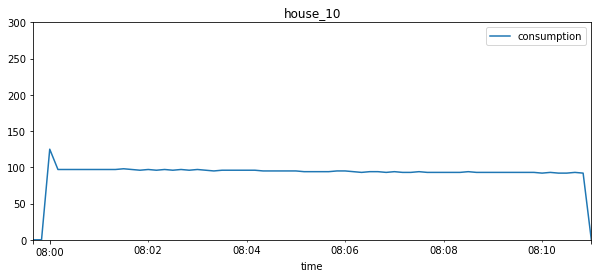

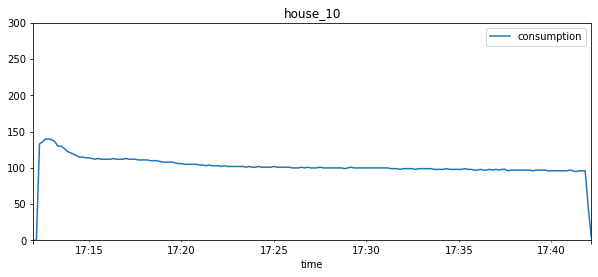

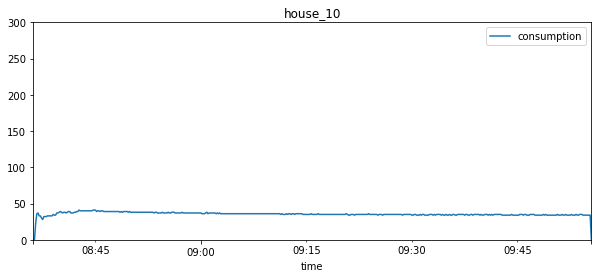

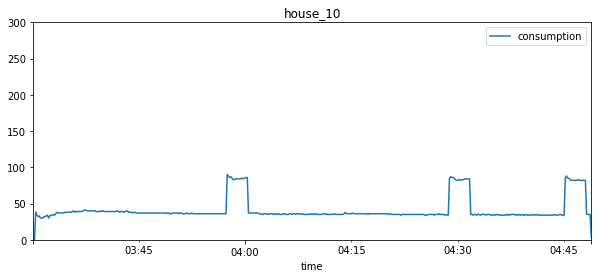

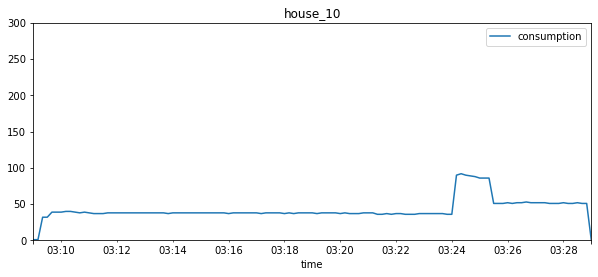

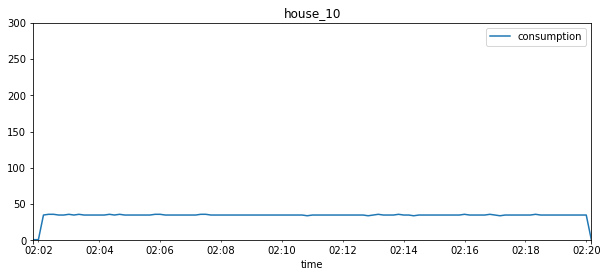

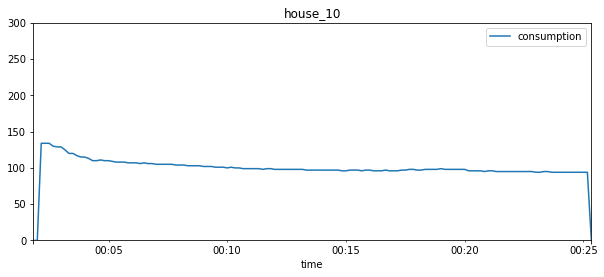

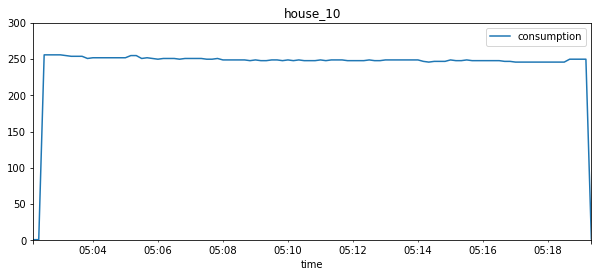

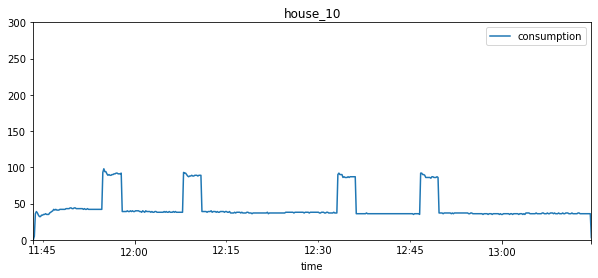

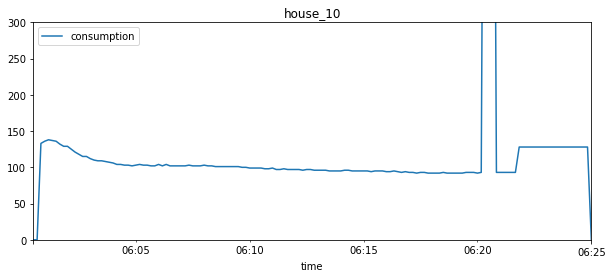

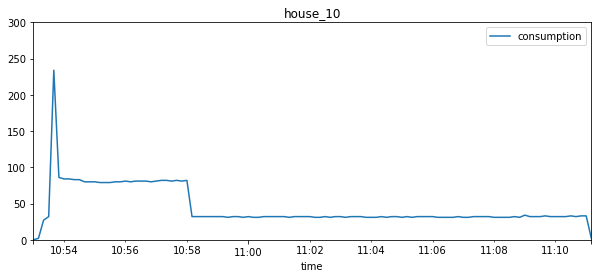

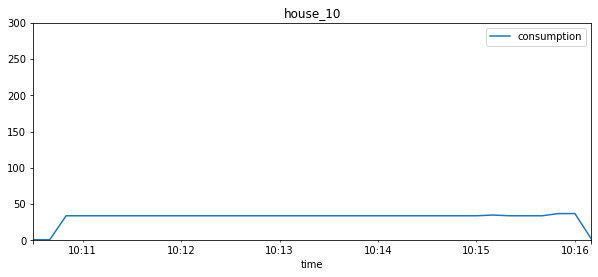

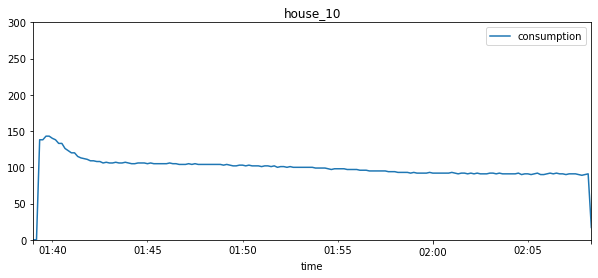

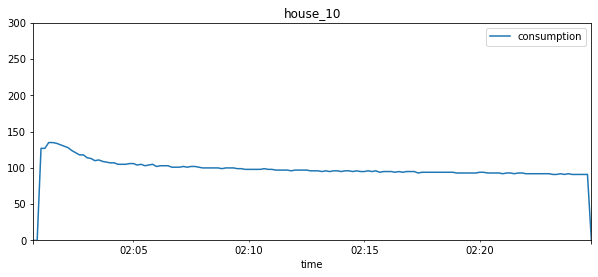

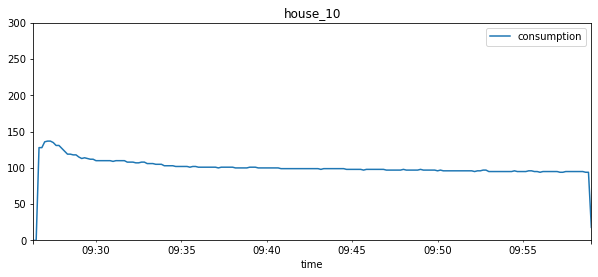

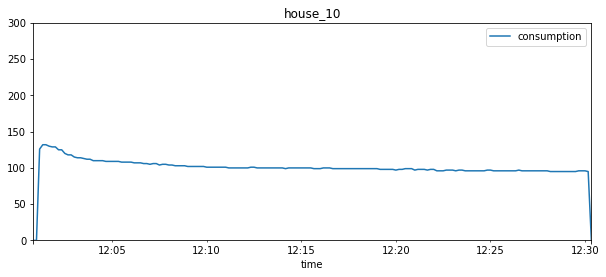

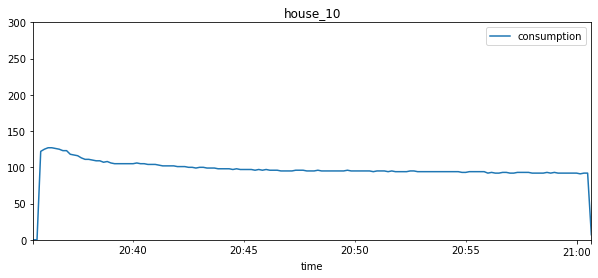

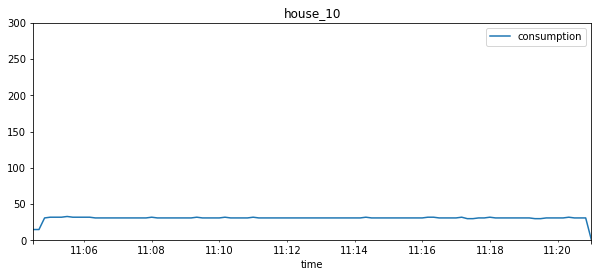

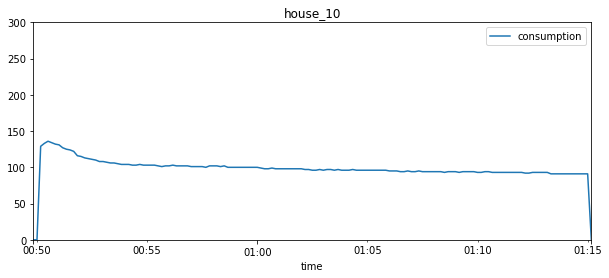

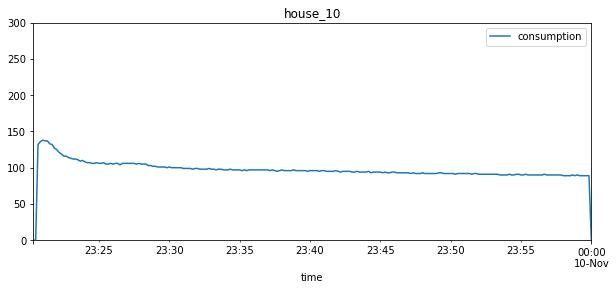

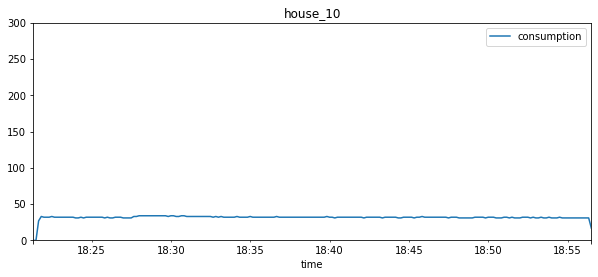

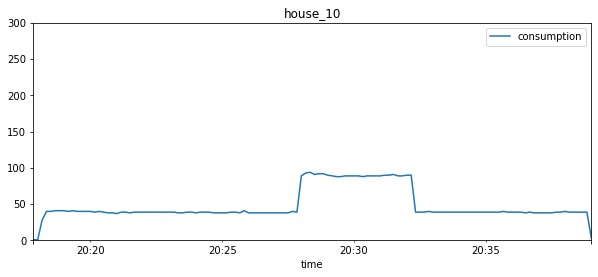

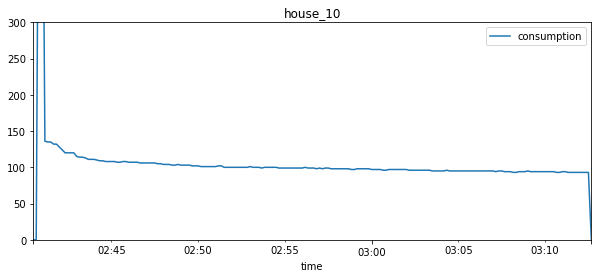

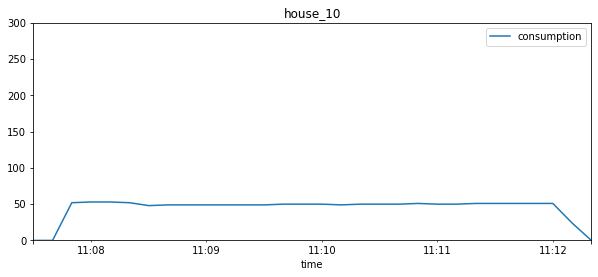

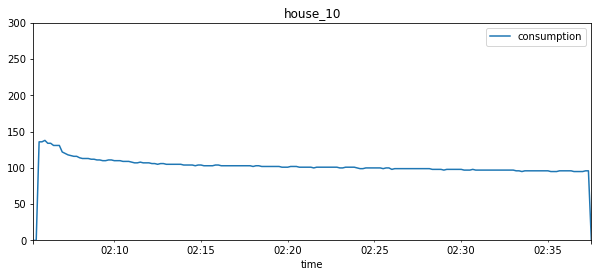

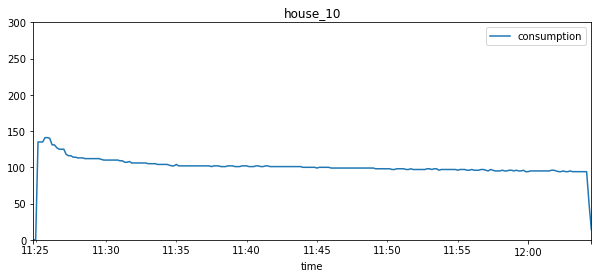

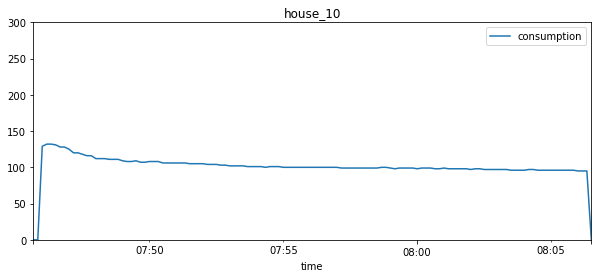

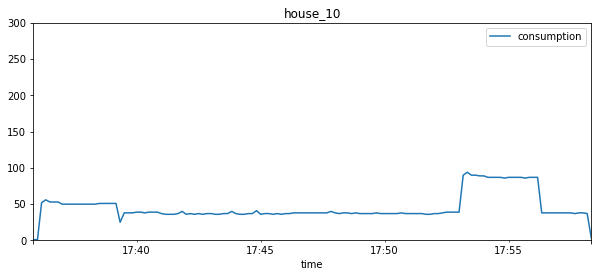

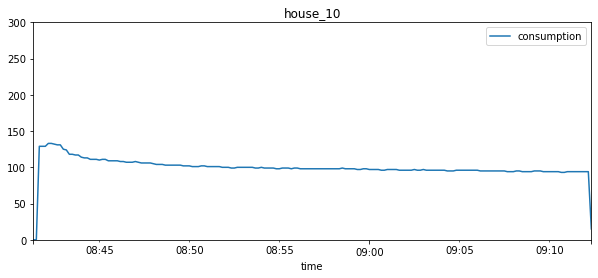

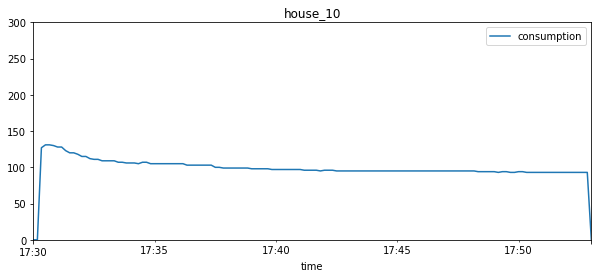

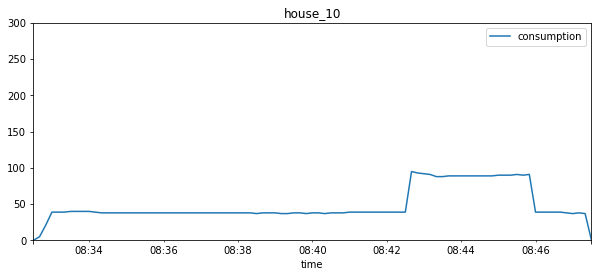

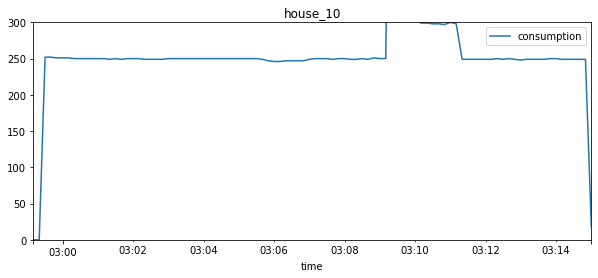

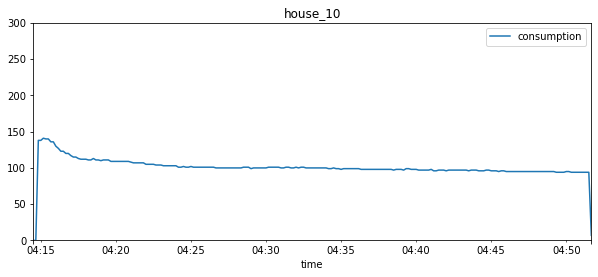

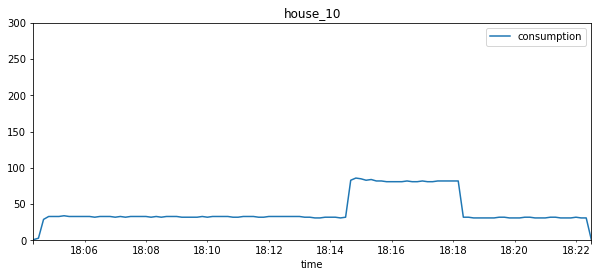

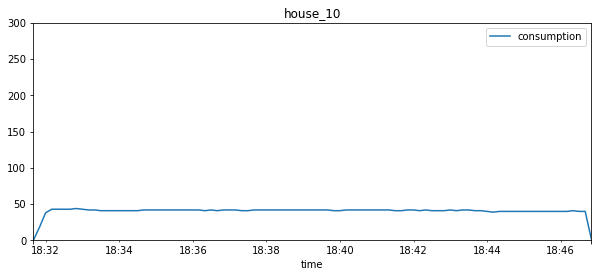

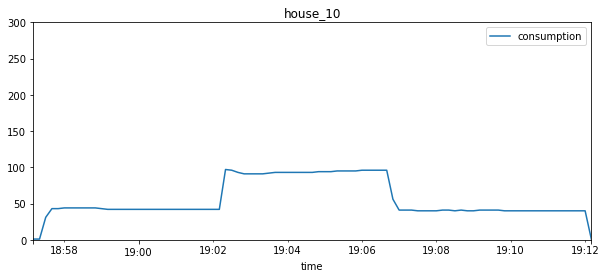

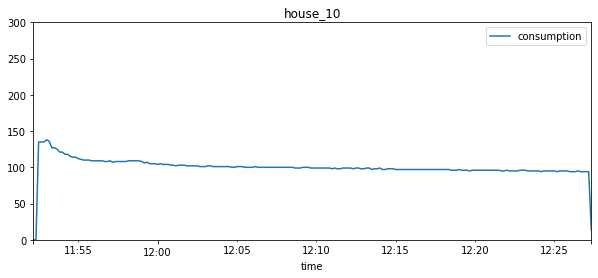

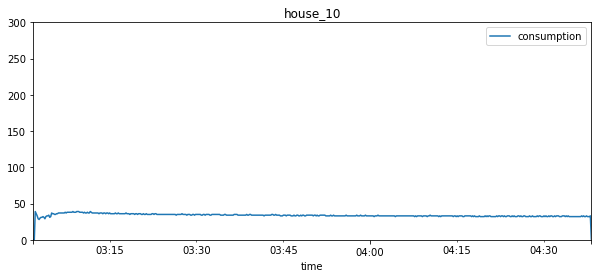

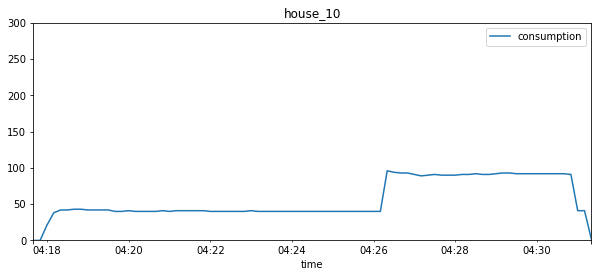

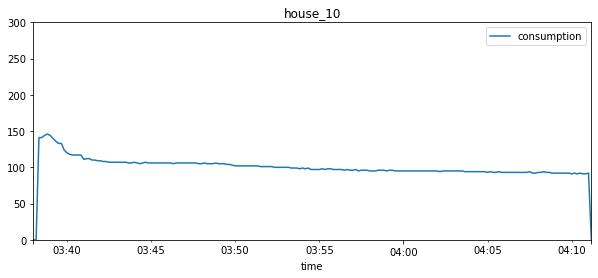

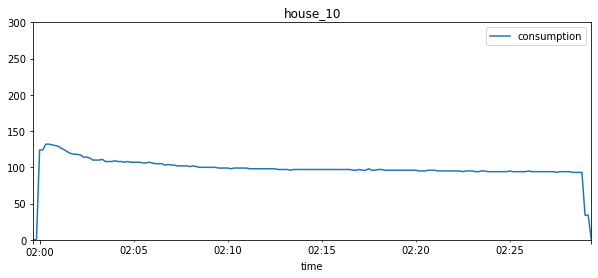

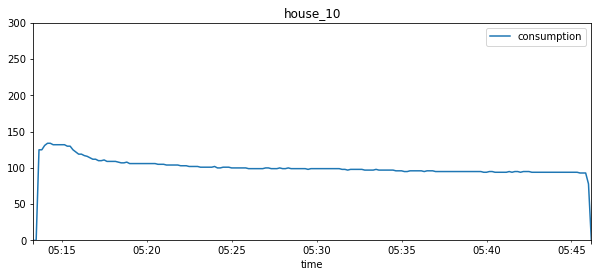

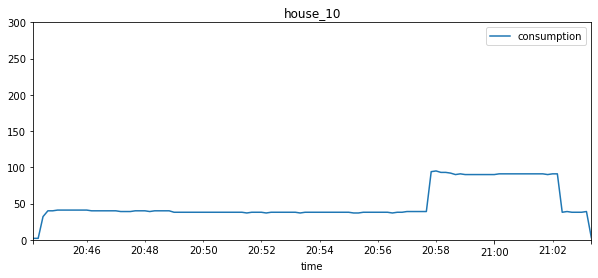

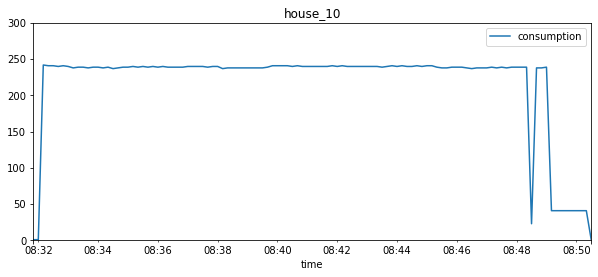

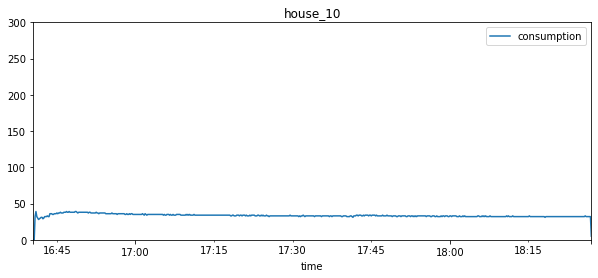

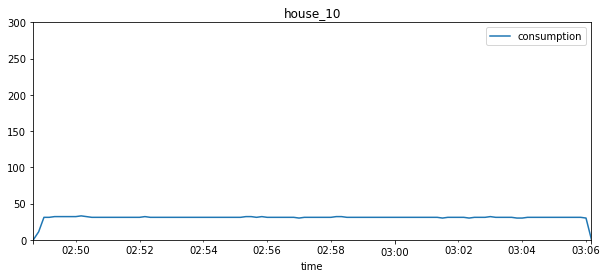

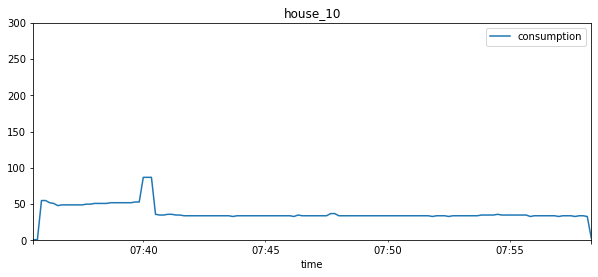

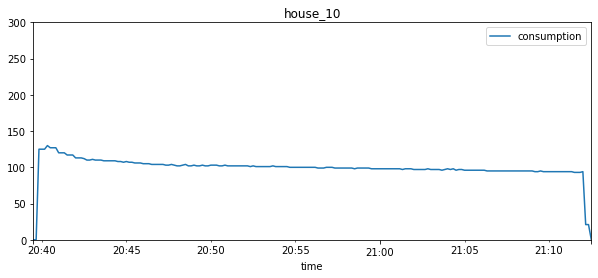

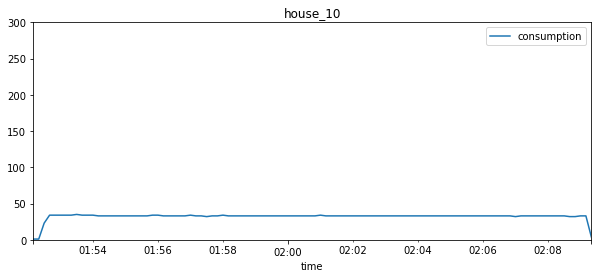

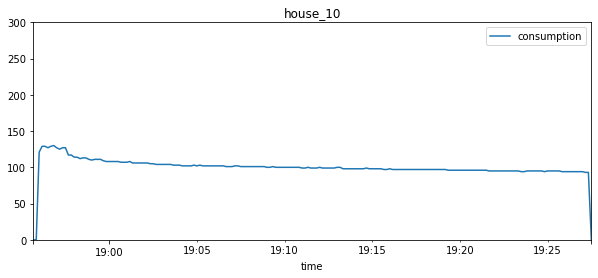

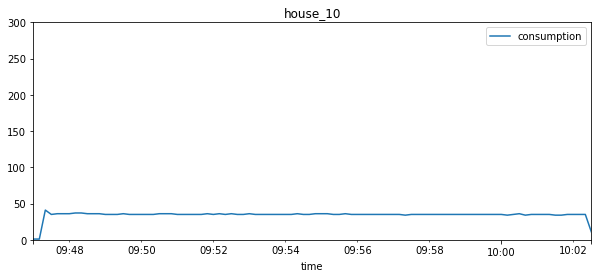

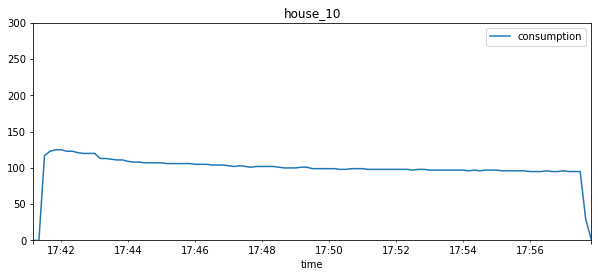

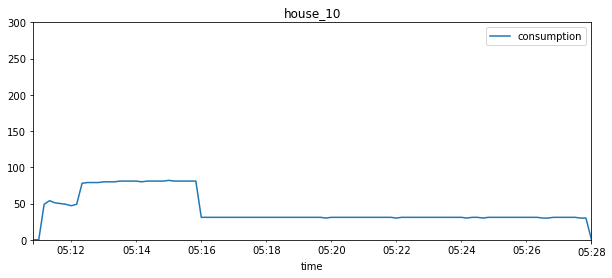

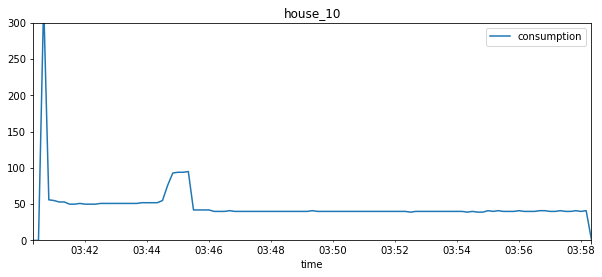

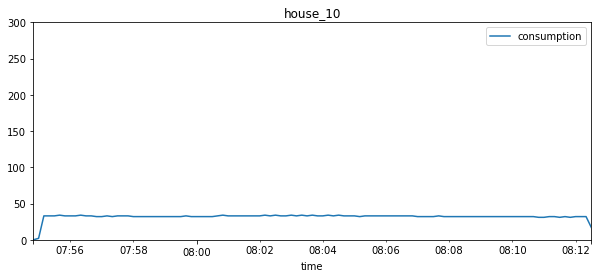

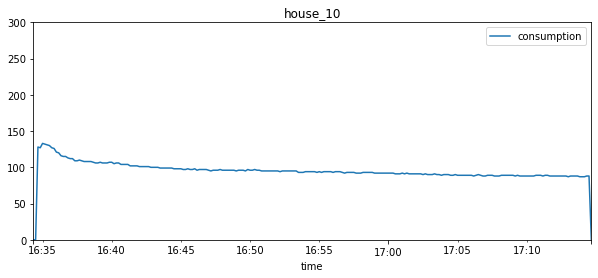

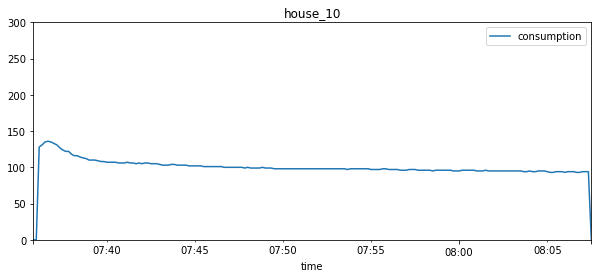

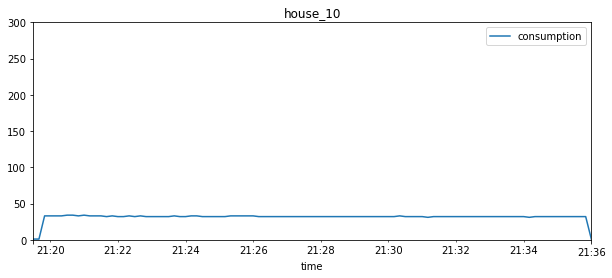

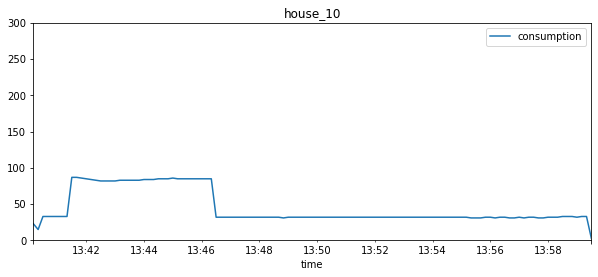

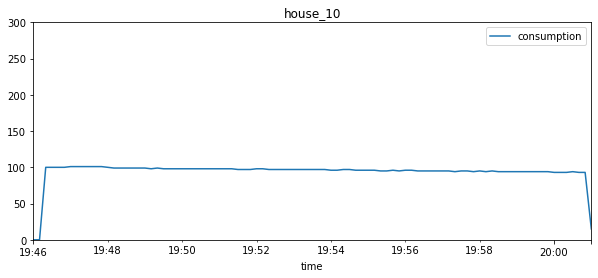

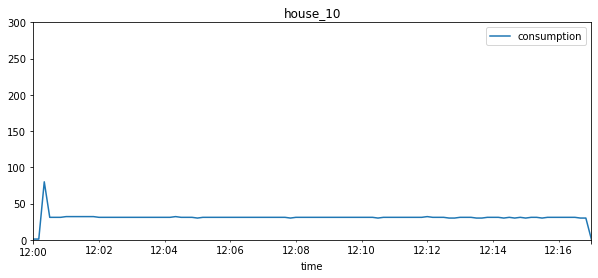

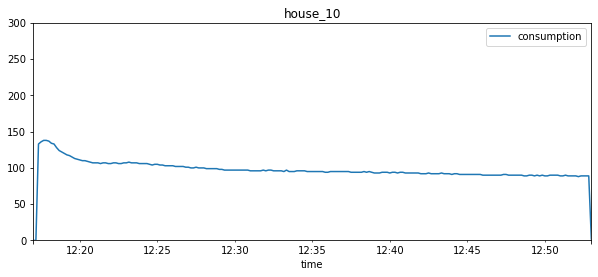

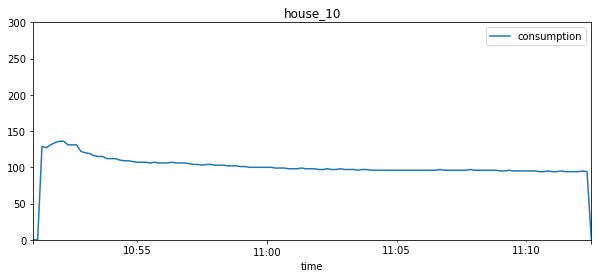

In [168]:
house=10
activations=random.sample(range(0, len(Refit_fridge_freezer_activations[house])),100)
df=Refit_fridge_freezers[house]
for activation in activations:
    beginning=Refit_fridge_freezer_activations[house][activation][0]
    end=Refit_fridge_freezer_activations[house][activation][1]
    ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
    ax.set_ylim(0,300)

In [17]:
def activations_to_csv(activations,house_nb):
    df=pd.DataFrame(activations, columns =['beginning','end'])
    df.to_csv("Refit_activations/fridge_freezer/house_"+str(house_nb),index=False)

In [18]:
pool = mp.Pool(processes = 3)
result=pool.starmap(activations_to_csv,((Refit_fridge_freezer_activations[i],i) for i in Refit_fridge_freezer_activations.keys()))

In [21]:
data=Refit_fridge_freezer_activations[2]
df = pd.DataFrame(data, columns =['beginning','end'])
print(df)

      beginning      end
0             1      122
1           412      555
2           882     1024
3          1379     1522
4          1903     2051
...         ...      ...
8168    5332229  5332424
8169    5332822  5333019
8170    5333434  5333627
8171    5334002  5334022
8172    5334024  5334084

[8173 rows x 2 columns]


In [5]:
def csv_to_activations(file_title):
    df=pd.read_table(file_title, sep="," )
    df = df[['beginning', 'end']]
    activation = [tuple(x) for x in df.to_numpy()]
    return(activation)

In [6]:
Refit_fridge_freezer_activations={}
for house_nb in Refit_fridge_freezers.keys():
    Refit_fridge_freezer_activations[house_nb]=csv_to_activations("Refit_activations/fridge_freezer/house_"+str(house_nb))

In [12]:
Refit_fridge_freezer_activations.keys()

dict_keys([2, 3, 4, 5, 9, 10, 11, 12, 15, 16, 17, 18, 19, 21])

In [11]:
for key in Refit_fridge_freezer_activations.keys():
    activations=Refit_fridge_freezer_activations[key]
    Refit_fridge_freezer_activations[key]=[]
    for activation in activations:
        if (round((activation[1]-activation[0])/6)<=4000):
            Refit_fridge_freezer_activations[key].append(activation)

In [12]:
def get_durations(activations):
    durations=[]
    for activation in activations:
        durations.append(round((activation[1]-activation[0])/6))
    return (durations)

In [13]:
Refit_fridge_freezers_durations=[]
for house in Refit_fridge_freezers.keys():
    Refit_fridge_freezers_durations.append(get_durations(Refit_fridge_freezer_activations[house]))

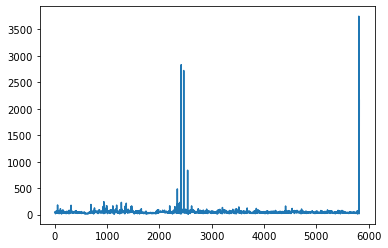

In [44]:
plt.plot(Refit_fridge_freezers_durations[13])

(0.0, 300.0)

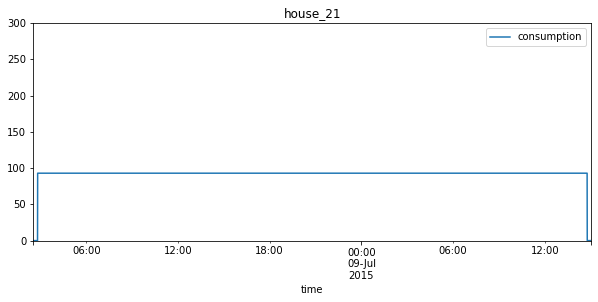

In [31]:
house=21
df=Refit_fridge_freezers[house]
beginning=Refit_fridge_freezer_activations[house][len(Refit_fridge_freezer_activations[house])-1][0]
end=Refit_fridge_freezer_activations[house][len(Refit_fridge_freezer_activations[house])-1][1]
ax=df.iloc[beginning-100:end+100].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
ax.set_ylim(0,300)


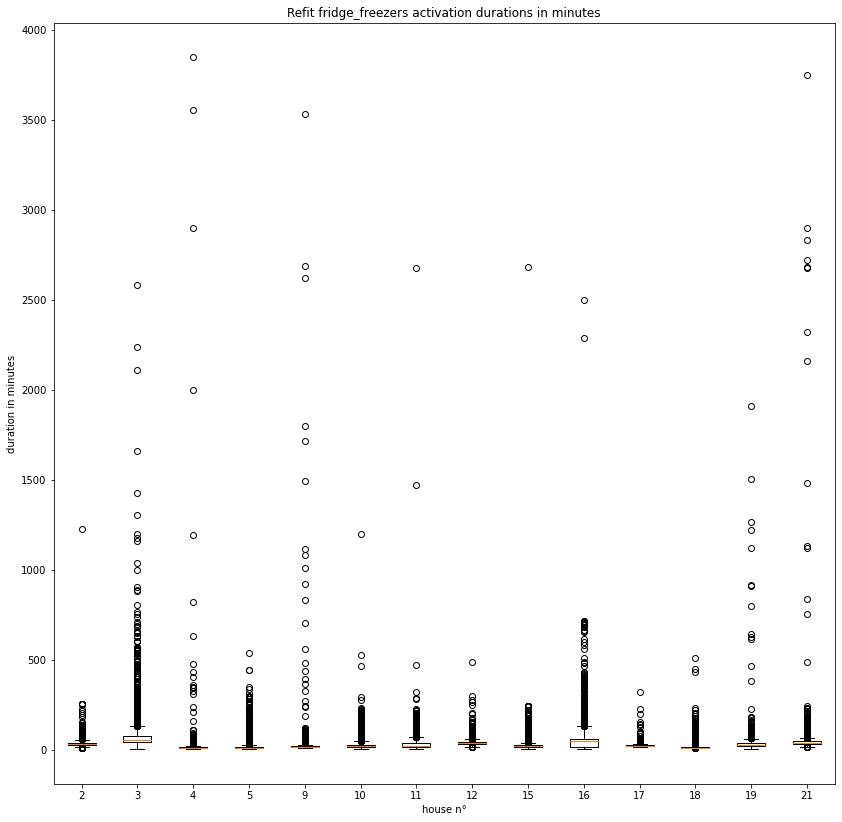

In [14]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Refit fridge_freezers activation durations in minutes')
ax7.boxplot(Refit_fridge_freezers_durations)
#ax7.set_ylim(0,200)
ax7.set_xticklabels(Refit_fridge_freezers.keys())
plt.savefig('Refit_fridge_freezers_activation_durations_in_minutes_all.jpg',dpi=184)
plt.ylabel("duration in minutes")
plt.xlabel("house n°")
plt.show()

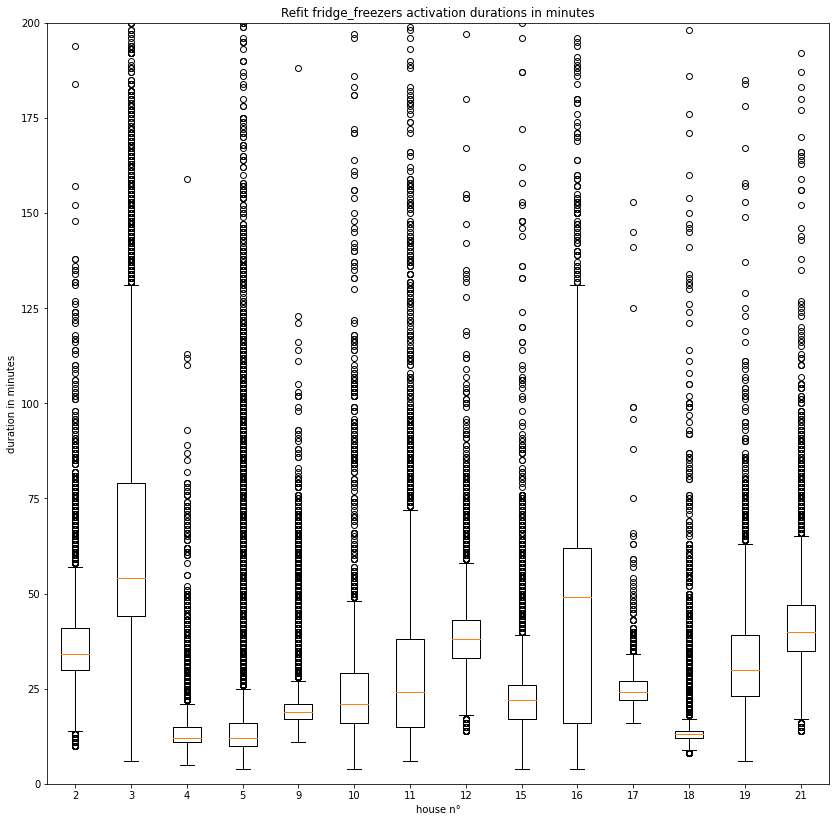

In [15]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Refit fridge_freezers activation durations in minutes')
ax7.boxplot(Refit_fridge_freezers_durations)
ax7.set_ylim(0,200)
ax7.set_xticklabels(Refit_fridge_freezers.keys())
plt.savefig('Refit_fridge_freezers_activation_durations_in_minutes.jpg',dpi=184)
plt.ylabel("duration in minutes")
plt.xlabel("house n°")
plt.show()

In [15]:
nb_of_activations=[]
for key in Refit_fridge_freezer_activations.keys():
    nb_of_activations.append(len(Refit_fridge_freezer_activations[key]))

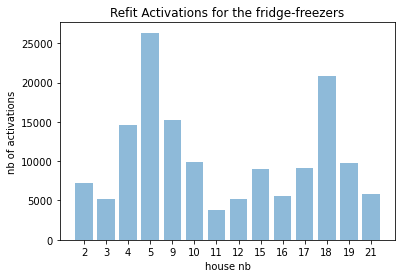

In [66]:
y_pos = np.arange(14)
plt.bar(y_pos,nb_of_activations, align='center', alpha=0.5)
plt.xticks(y_pos, Refit_fridge_freezer_activations.keys())
plt.ylabel('nb of activations')
plt.xlabel('house nb')
plt.title('Refit Activations for the fridge-freezers')
plt.show()

<ipython-input-121-6fdc8065ca9c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([2, 3, 4, 5, 9, 10, 11, 12, 15, 16, 17, 18, 19, 21],fontsize=18)


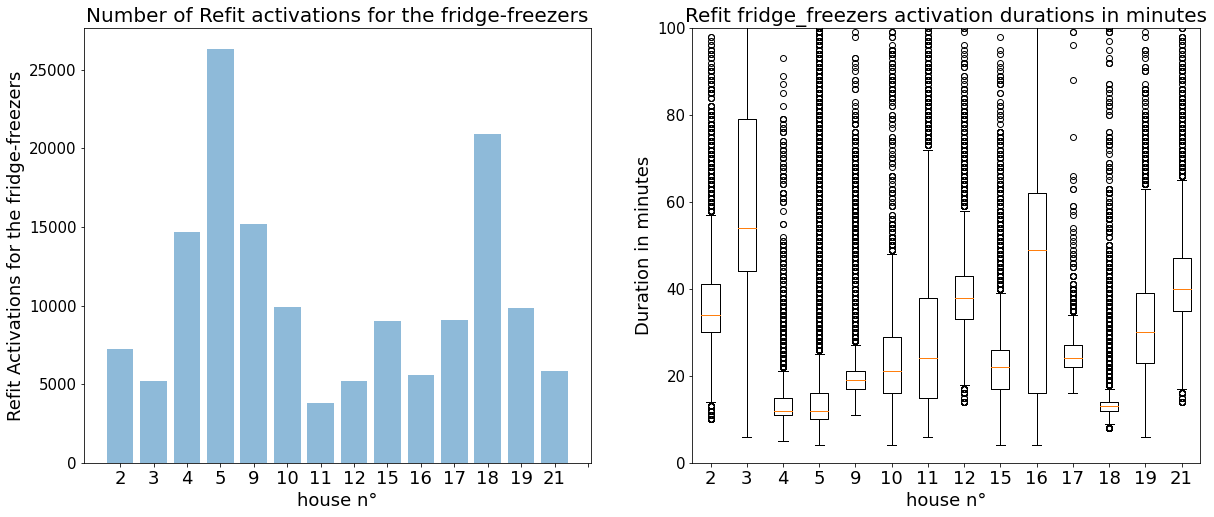

In [121]:
fig, (ax1, ax7) = plt.subplots(1,2,figsize=(20,8))

y_pos = np.arange(14)
ax1.bar(y_pos,nb_of_activations, align='center', alpha=0.5)
ax1.set_title('Number of Refit activations for the fridge-freezers',fontsize=20)
ax1.set_xlabel('house n°', fontsize=18)
ax1.set_ylabel('Refit Activations for the fridge-freezers', fontsize=18)
plt.setp(ax1.get_yticklabels(), fontsize=15)
ax1.set_xticklabels([2, 3, 4, 5, 9, 10, 11, 12, 15, 16, 17, 18, 19, 21],fontsize=18)
ax1.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]))

ax7.set_title('Refit fridge_freezers activation durations in minutes',fontsize=20)
ax7.boxplot(Refit_fridge_freezers_durations,vert=True)
ax7.set_ylim(0,100)
ax7.set_xticklabels(Refit_fridge_freezers.keys(),fontsize=18)
ax7.set_xlabel('house n°', fontsize=18)
ax7.set_ylabel('Duration in minutes', fontsize=18)
plt.setp(ax7.get_yticklabels(), fontsize=15)


plt.savefig('Number_durations_fridge_freezers.jpg',dpi=184)
plt.show()

In [84]:
Refit_fridge_freezers.keys()

dict_keys([2, 3, 4, 5, 9, 10, 11, 12, 15, 16, 17, 18, 19, 21])

In [125]:
def merge_activations(dataframe,list_of_activations,house_nb):
  power_consumption_list=[]
  for activation in list_of_activations:
    start=activation[0]
    end=activation[1]
    power_consumption_list.extend(dataframe.consumption.iloc[start:end+1])
  return(power_consumption_list,house_nb)

In [127]:
pool = mp.Pool(processes = 3)
result=pool.starmap(merge_activations,((Refit_fridge_freezers[i],Refit_fridge_freezer_activations[i],i) for i in Refit_fridge_freezer_activations.keys()))

In [129]:
Refit_activations_fridge_freezers={}
for i in range(len(result)):
    if result[i]!=None:
        Refit_activations_fridge_freezers[result[i][1]]=result[i][0]

In [164]:
Refit_activations_fridge_freezers[2].remove(Refit_activations_fridge_freezers[2][0])

In [165]:
Refit_activations_fridge_freezers[2]

[88.0,
 88.0,
 88.0,
 88.0,
 88.0,
 88.0,
 88.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0,
 85.0,
 86.0,
 86.0,
 85.0,
 85.0,
 86.0,
 85.0,
 84.0,
 85.0,
 84.0,
 85.0,
 85.0,
 85.0,
 85.0,
 85.0,
 85.0,
 85.0,
 85.0,
 85.0,
 85.0,
 84.0,
 84.0,
 84.0,
 85.0,
 85.0,
 84.0,
 85.0,
 84.0,
 85.0,
 84.0,
 84.0,
 83.0,
 84.0,
 84.0,
 84.0,
 84.0,
 83.0,
 84.0,
 83.0,
 83.0,
 83.0,
 83.0,
 84.0,
 83.0,
 83.0,
 83.0,
 82.0,
 83.0,
 83.0,
 82.0,
 82.0,
 84.0,
 82.0,
 82.0,
 83.0,
 82.0,
 82.0,
 82.0,
 83.0,
 82.0,
 82.0,
 82.0,
 83.0,
 83.0,
 82.0,
 82.0,
 83.0,
 82.0,
 82.0,
 82.0,
 81.0,
 82.0,
 82.0,
 82.0,
 82.0,
 82.0,
 82.0,
 81.0,
 82.0,
 82.0,
 81.0,
 82.0,
 81.0,
 82.0,
 81.0,
 82.0,
 81.0,
 81.0,
 81.0,
 82.0,
 81.0,
 3.0,
 1.0,
 1.0,
 1.0,
 97.0,
 93.0,
 92.0,
 91.0,
 91.0,
 89.0,
 88.0,
 87.0,
 86.0,
 86.0,
 87.0,
 87.0,
 87.0,
 88.0,
 87.0,
 88.0,
 88.0,
 88

In [146]:
activations_merged=[]
for key in Refit_activations_fridge_freezers.keys():
    activations_merged.append(Refit_activations_fridge_freezers[key])
len(activations_merged)

14

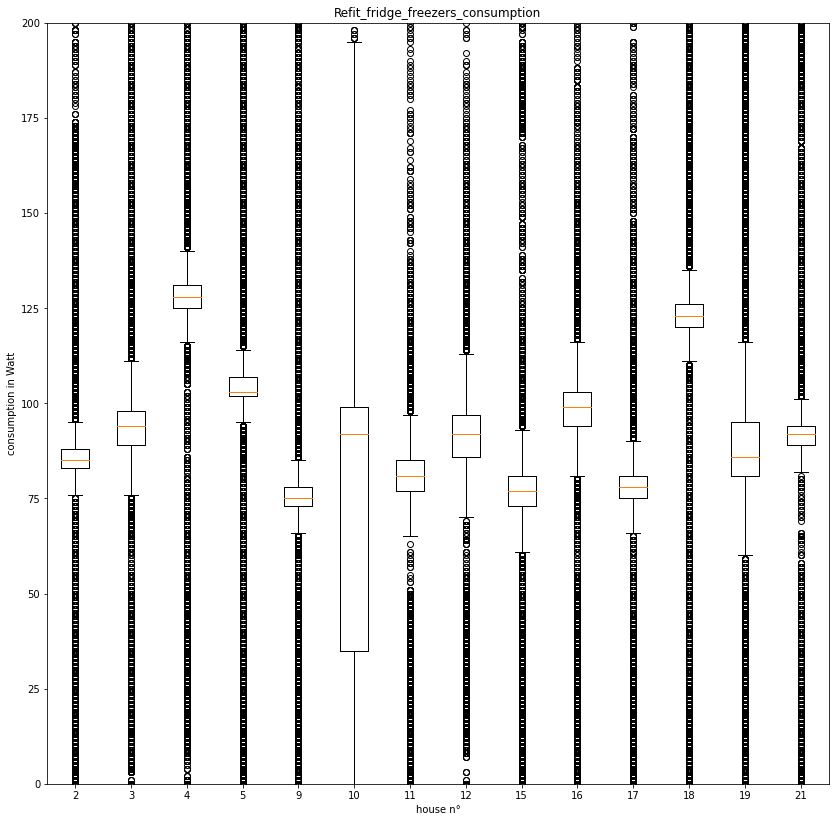

In [169]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Refit_fridge_freezers_consumption')
ax7.boxplot(activations_merged)
ax7.set_ylim(0,200)
ax7.set_xticklabels(Refit_fridge_freezers.keys())
plt.savefig('Refit_fridge_freezers_consumption.jpg',dpi=184)
plt.ylabel("consumption in Watt")
plt.xlabel("house n°")
plt.show()

<ipython-input-170-ee350ca7aece>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([2, 3, 4, 5, 9, 10, 11, 12, 15, 16, 17, 18, 19, 21],fontsize=18)


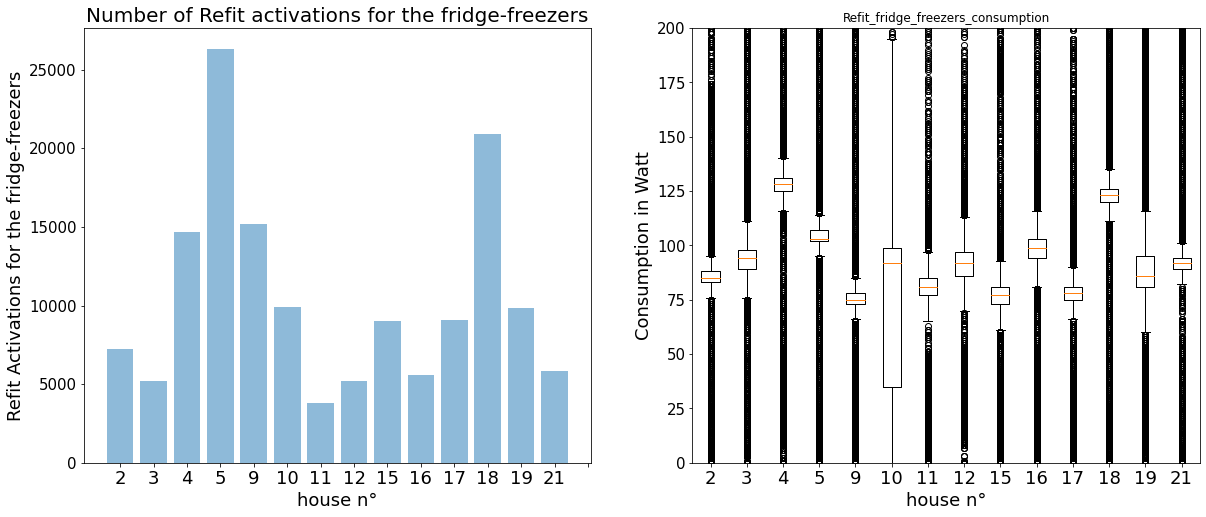

In [170]:
fig, (ax1, ax7) = plt.subplots(1,2,figsize=(20,8))

y_pos = np.arange(14)
ax1.bar(y_pos,nb_of_activations, align='center', alpha=0.5)
ax1.set_title('Number of Refit activations for the fridge-freezers',fontsize=20)
ax1.set_xlabel('house n°', fontsize=18)
ax1.set_ylabel('Refit Activations for the fridge-freezers', fontsize=18)
plt.setp(ax1.get_yticklabels(), fontsize=15)
ax1.set_xticklabels([2, 3, 4, 5, 9, 10, 11, 12, 15, 16, 17, 18, 19, 21],fontsize=18)
ax1.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]))

ax7.set_title('Refit_fridge_freezers_consumption')
ax7.boxplot(activations_merged)
ax7.set_ylim(0,200)
ax7.set_xticklabels(Refit_fridge_freezers.keys(),fontsize=18)
ax7.set_xlabel('house n°', fontsize=18)
ax7.set_ylabel('Consumption in Watt', fontsize=18)
plt.setp(ax7.get_yticklabels(), fontsize=15)


plt.savefig('Number_Consumption_fridge_freezers.jpg',dpi=184)
plt.show()